# **Введение в распределённые вычисления**

**История распределенных вычислений**

1 зеттабайт (ЗБ, англ. ZB) = 1 099 511 627 776 гигабайт (ГБ, англ. GB).

Hadoop основан на концепции MapReduce.

В апреле 2010 года Google предоставила Apache Software Foundation права на использование технологии MapReduce.

К Apache Software Foundation присоединились несколько подпроектов Hadoop: Avro, HBase, Hive, Pig, ZooKeeper. Это послужило началом формирования целой Hadoop-экосистемы для хранения, обработки больших данных и пользовательского взаимодействия.

Стали появляться технологические стартапы, такие как Cloudera, целиком ориентированные на коммерциализацию Hadoop. Они разрабатывают и развивают свои собственные сервисы на основе опенсорсной экосистемы Hadoop.

В дальнейшем при упоминании Hadoop и Spark речь будет идти о версиях, разрабатываемых и поддерживаемых Apache Software Foundation. Это организация-фонд, которая развивает ПО для свободного использования (англ. open source), то есть Apache Hadoop, Apache Spark и другие.

Что такое экосистема Apache Hadoop?

Apache Hadoop — это набор программ с открытым исходным кодом.

А Apache Software Foundation — фонд, который поддерживает и развивает ПО для свободного использования (англ. open source). Это набор программ, дополняющих друг друга, с открытым исходным кодом. Их можно подключать и отключать как модули по необходимости.

**Экосистема Hadoop**

Apache Hadoop можно назвать фреймворком, потому что он состоит из нескольких модулей, которые выполняют свои задачи.

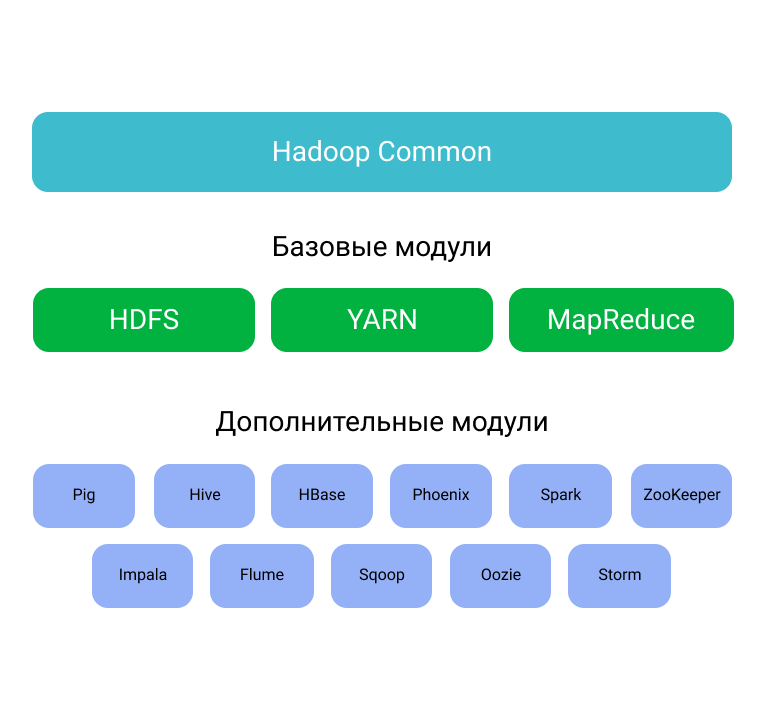

Базовый дистрибутив Apache Hadoop состоит из следующих частей:

*Hadoop Common* — низкоуровневый модуль Hadoop, который нужен другим модулям. В нём реализован специализированный интерпретатор командной строки (англ. file system shell — «оболочка файловой системы»), который позволяет работать с распределёнными файловыми системами, поддерживающими Hadoop.

*Hadoop Distributed File System (HDFS)* — распределённая файловая система, которая обеспечивает хранение данных по частям на разных серверах. Это один из главных модулей в Hadoop, так как без системы хранения данных невозможно их обработать.

*Hadoop Yet Another Resource Negotiator (YARN)* — модуль, который отвечает за распределение ресурсов запущенным приложениям пользователей. Такие модули в больших инструментах называют менеджерами ресурсов.

*Hadoop MapReduce* — модуль, который имплементирует(реализует) алгоритм MapReduce для обработки больших массивов данных.

*Hadoop Ozone* — объектное хранилище для мелких файлов, появилось в 2020 году и не является обязательным компонентом Hadoop.

 Для простоты можно представить, что модуль — это программа, выполняющая определённую роль в системе. HDFS разбивает файлы на части, хранит эти файлы и по запросу собирает, YARN отвечает за администрирование ресурсов «железа» для MapReduce-задач, а MapReduce выполняет расчёты на данных.

 Когда говорят «экосистема Hadoop», то часто имеют в виду как упомянутые выше базовые модули, так и различные подпроекты, которые образовались за годы разработки и могут быть установлены поверх базовых модулей. Самые распространённые подпроекты: Apache Pig, Apache Hive, Apache HBase, Apache Phoenix, Apache Spark, Apache ZooKeeper, Apache Impala, Apache Flume, Apache Sqoop, Apache Oozie, Apache Storm.

**Архитектура HDFS**

В профессиональном сообществе часто используют термин «узел», или нода (от англ. node — «узел»). Эти понятия идентичны и обозначают серверный компьютер с вычислительной мощностью, которую можно использовать для выполнения полезной работы.

Много узлов — нод, компьютеров — можно связать в сеть, которую называют кластер.

Классический кластер в дата-центре выглядит как высокая стойка с большим количеством серверных компьютеров — узлов.

Кластер намного мощнее одиночного компьютера. Соответственно, может выполнять более сложные задачи, например обрабатывать массивы информации и файлы, которые не помещаются в оперативную память одиночного компьютера.

В кластере (группе компьютеров, соединённых в единую сеть), на котором выполняются вычисления, есть два вида узлов, то есть серверов, компьютеров:

- Главный узел, который также называют master node или master.

- Рабочий узел, он же worker node, или просто worker.

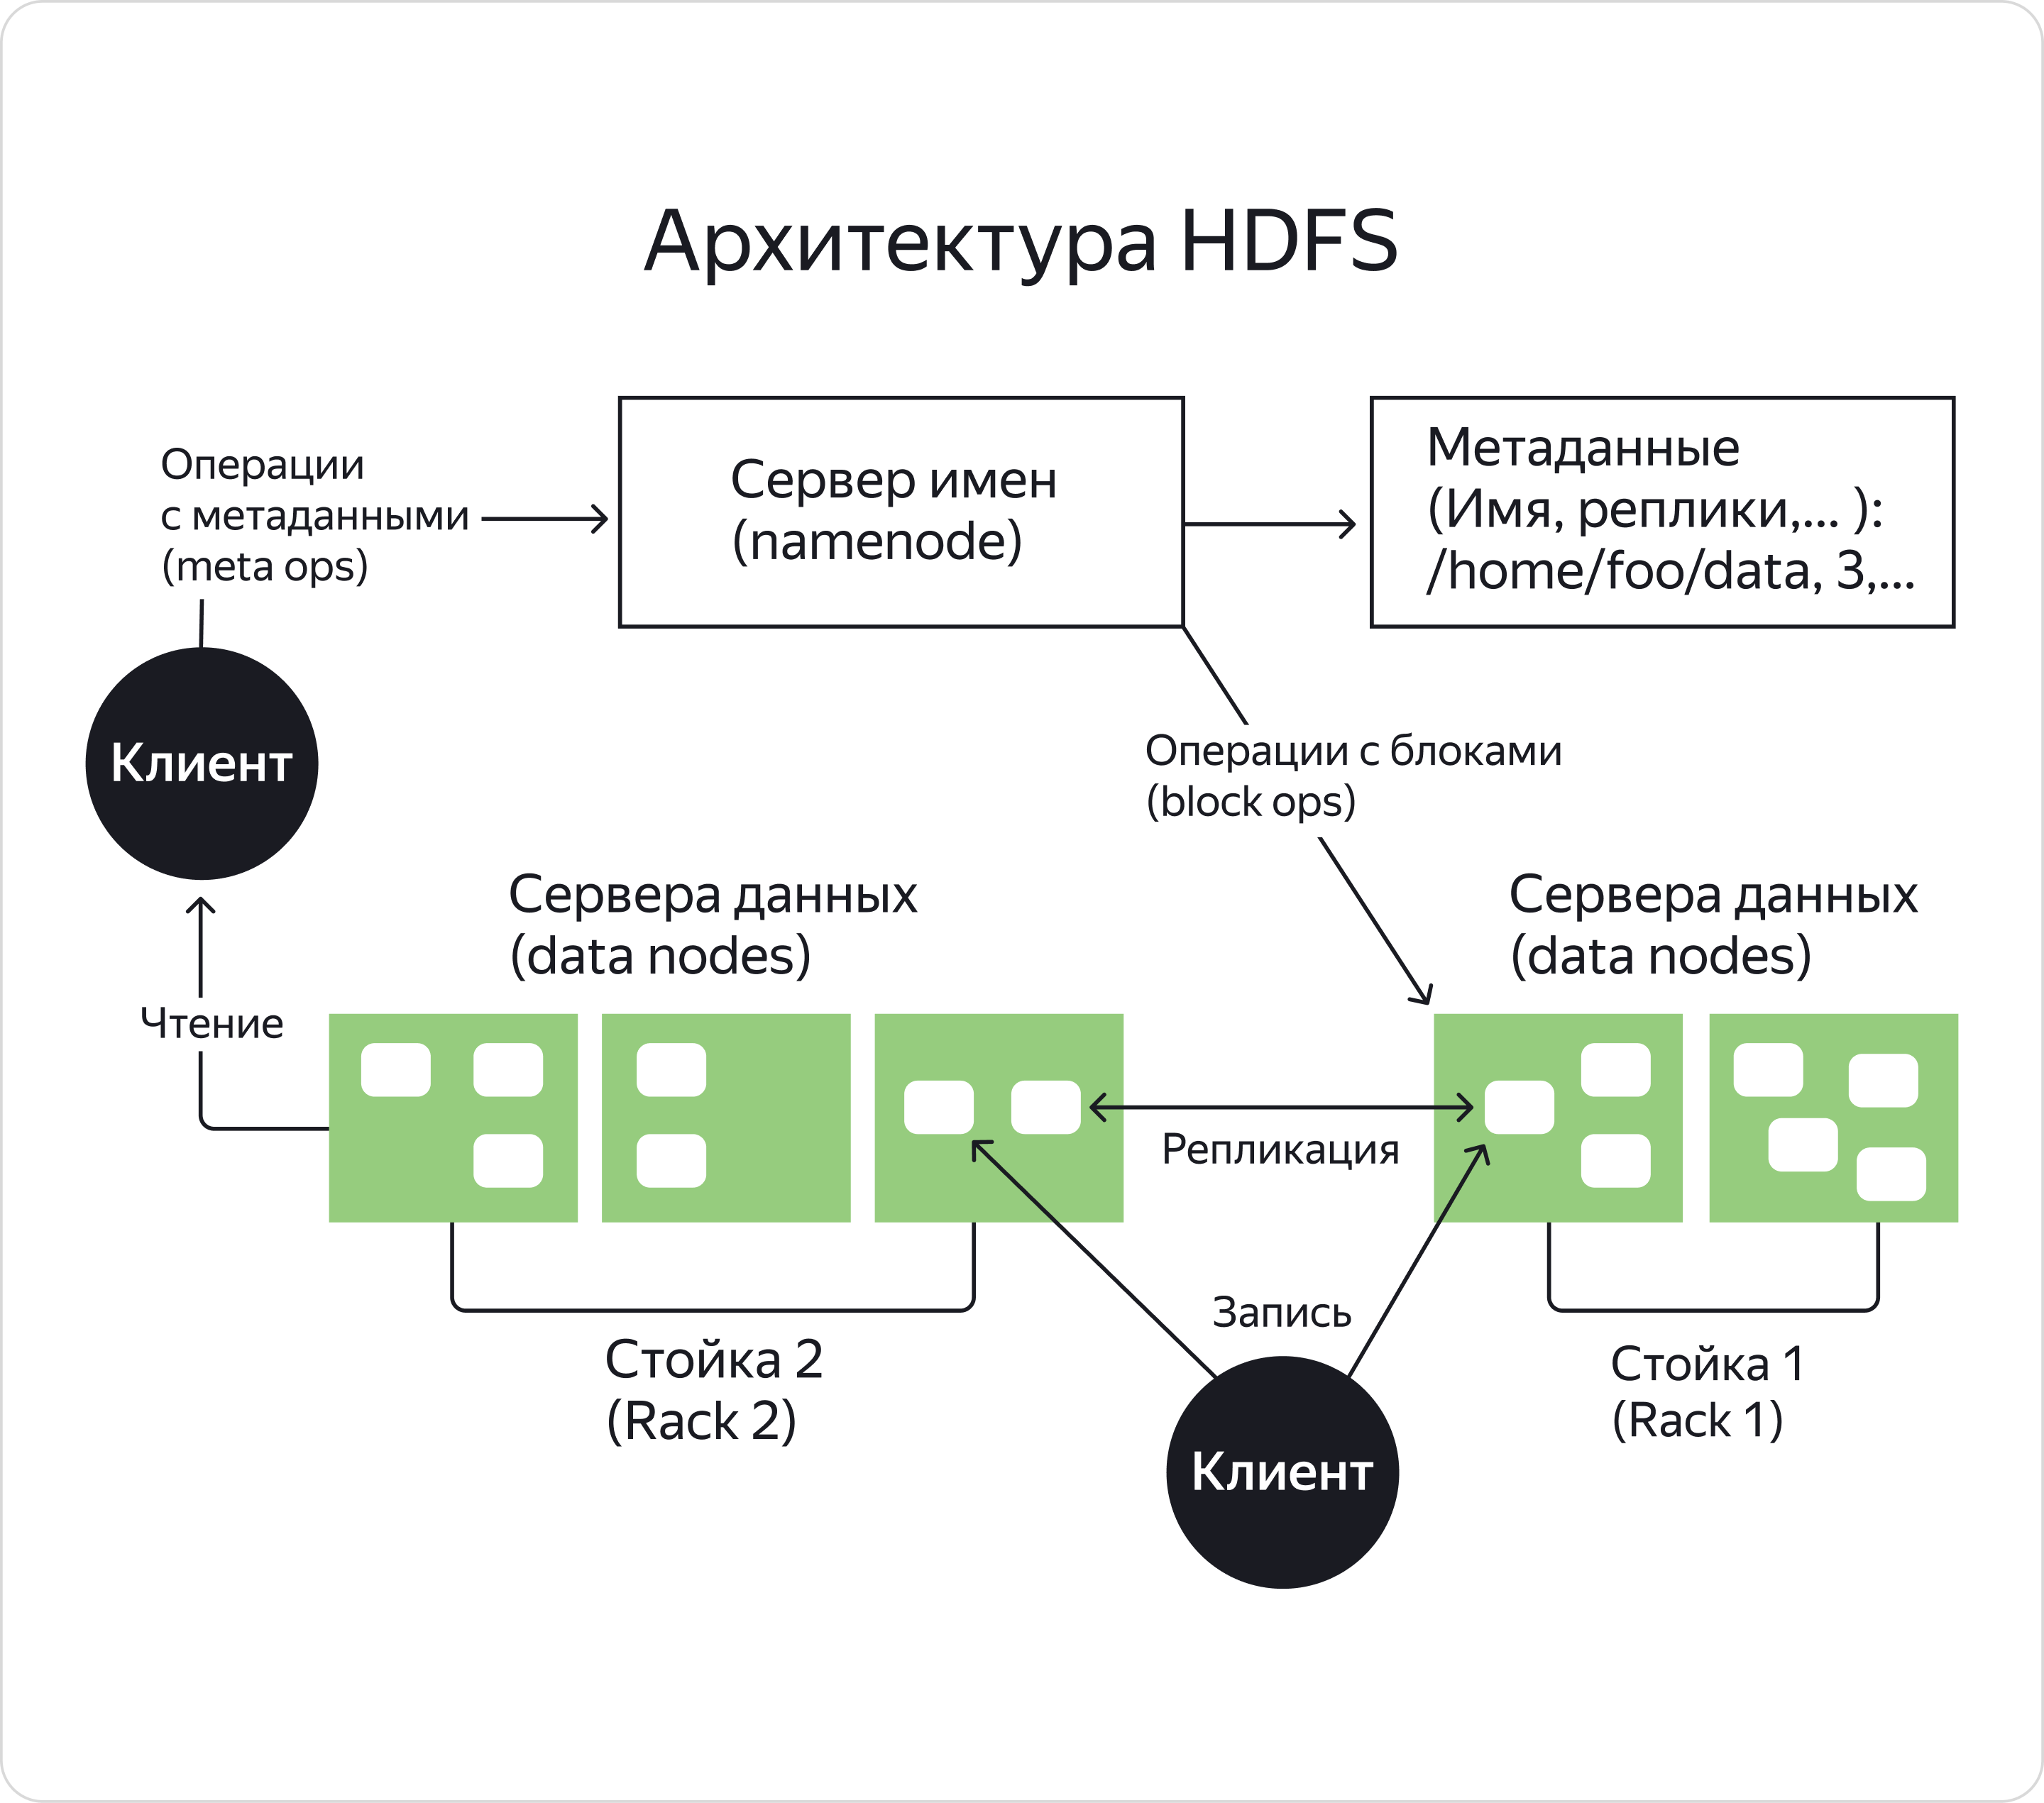

Обычно кластер HDFS состоит из следующих компонентов:

- *Управляющий узел*, узел имён или сервер имён (англ. NameNode) — отдельный, единственный в кластере сервер, который отвечает за управление пространством имён файловой системы. Он хранит дерево файлов, а также метаданные файлов и каталогов. NameNode — это компьютер, который знает «всё обо всём». К примеру, на сколько частей разбит каждый файл на кластере, а также объём, количество копий, местоположение этих частей и всю ассоциированную метаинформацию о хранимых данных. NameNode — обязательный компонент кластера HDFS, который отвечает за открытие и закрытие файлов, создание и удаление каталогов. Также отвечает за предоставление доступов к каталогам пользователям и соответствие между файлами и блоками, дублированными (реплицированными) на узлах данных. Сервер имён раскрывает для всех желающих расположение блоков данных на машинах кластера.

- *Вторичный узел* (англ. Secondary NameNode) — как и NameNode, это отдельный компьютер в кластере. Вторичный узел копирует образ HDFS и лог транзакций (операций с файловыми блоками) во временную папку, применяет изменения, накопленные в логе транзакций к образу HDFS, а также записывает его на узел NameNode и очищает лог транзакций. Secondary NameNode необходим, чтобы вручную быстро восстановить NameNode в случае его выхода из строя.

- *Узел, или сервер данных* (англ. DataNode, Node), — один из множества серверов кластера с программным кодом, выполняющих файловые операции и работу с блоками данных. DataNode — обязательный компонент кластера HDFS, который записывает и читает данные, выполняет команды от узла NameNode по созданию, удалению и репликации блоков. Кроме того, DataNode периодически отправляет сообщения о состоянии (англ. heartbeats) и обрабатывает запросы на чтение и запись, поступающие от клиентов файловой системы HDFS. Стоит отметить, что данные проходят с остальных узлов кластера к клиенту мимо узла NameNode.

- *Клиент* (англ. client) — пользователь или приложение, взаимодействующие через специальный интерфейс (API — Application Programming Interface) с распределённой файловой системой. Если у клиента есть права, то разрешены следующие операции с файлами и каталогами: создание, удаление, чтение, запись, переименование и перемещение. Создавая файл, клиент может явно указать размер блока файла (по умолчанию 64 Мб) и количество создаваемых реплик (по умолчанию три).

Кратко:

Сервер имён, или NameNode, оперирует всей метаинформацией о хранимых данных.

Secondary NameNode - Вторичный узел помогает восстановить NameNode.

DataNode - Именно этот узел создаёт, копирует и удаляет блоки, обрабатывает запросы на чтение и запись, а также сообщает NameNode о своём состоянии.

**Репликация данных и блоки в HDFS**

Фактор репликации и блок файла. На этих важных понятиях строится отказоустойчивость HDFS.

Так как HDFS — это распределённая система хранения, то с каждым файлом, который попадает на хранение, происходят два действия:

1. Файл делится на несколько частей — блоков. Вы можете задать размер блока, но его дефолтное значение — 128 Мб. Такой размер блока позволяет работать с большими файлами на десятки и сотни гигабайт, при этом быстро читать, записывать их на диск и генерировать оптимальное количество метаданных о блоках и файлах, которыми оперирует NameNode.

  При делении файла блоки будут одинаковыми по размеру, кроме последнего. Он меньше, так как хранит остаток от равного деления. Например, у вас есть файл 500 Мб. Тогда он может быть разбит на три блока по 128 Мб и один — 116 Мб.

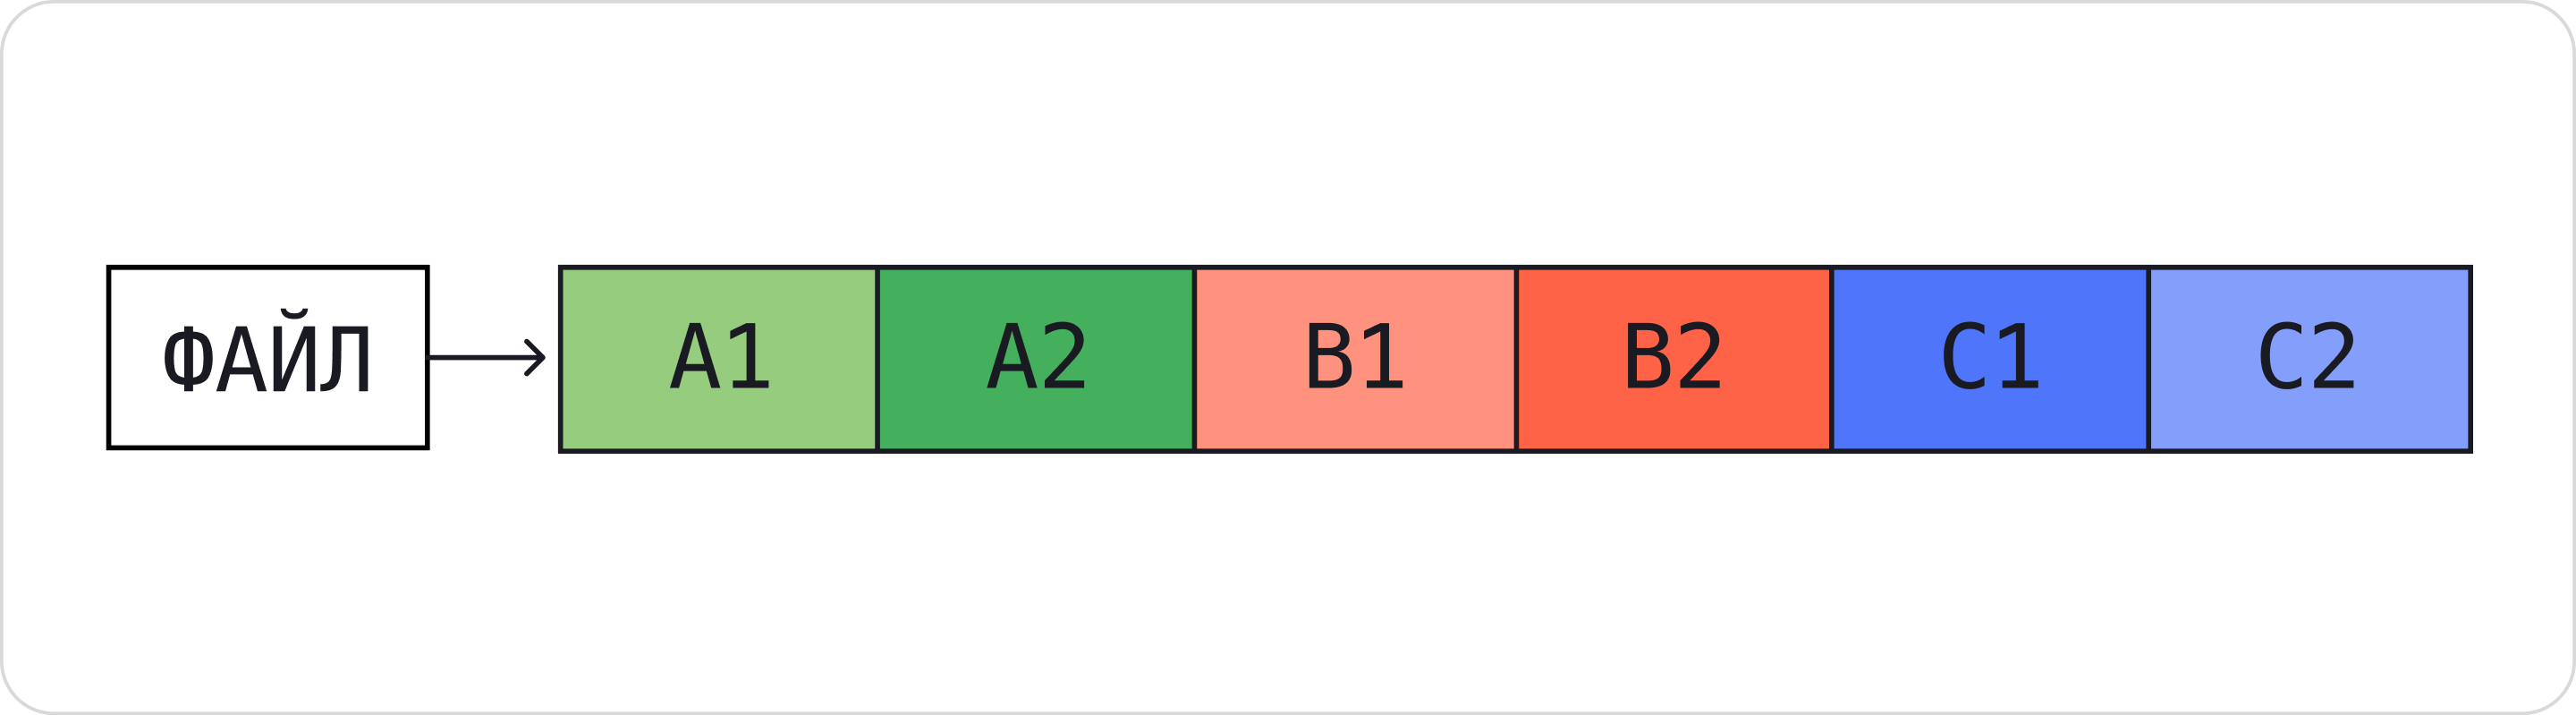

2. Эти блоки записываются в разные части кластера HDFS, то есть на разные жёсткие диски в DataNode. Каждый из блоков записывается столько раз, сколько указано в настройке, которая называется фактором репликации.

*Фактор репликации* — это количество копий файла, которое нужно сделать.

Дефолтное значение фактора репликации равно трём. Это значит, что если файл разбит на N частей, то каждая из них будет записана три раза на разные жёсткие диски DataNode. Чтобы узнать общее количество блоков, которое будет записано на HDFS, нужно количество блоков, на которые разбит файл, умножить на фактор репликации.

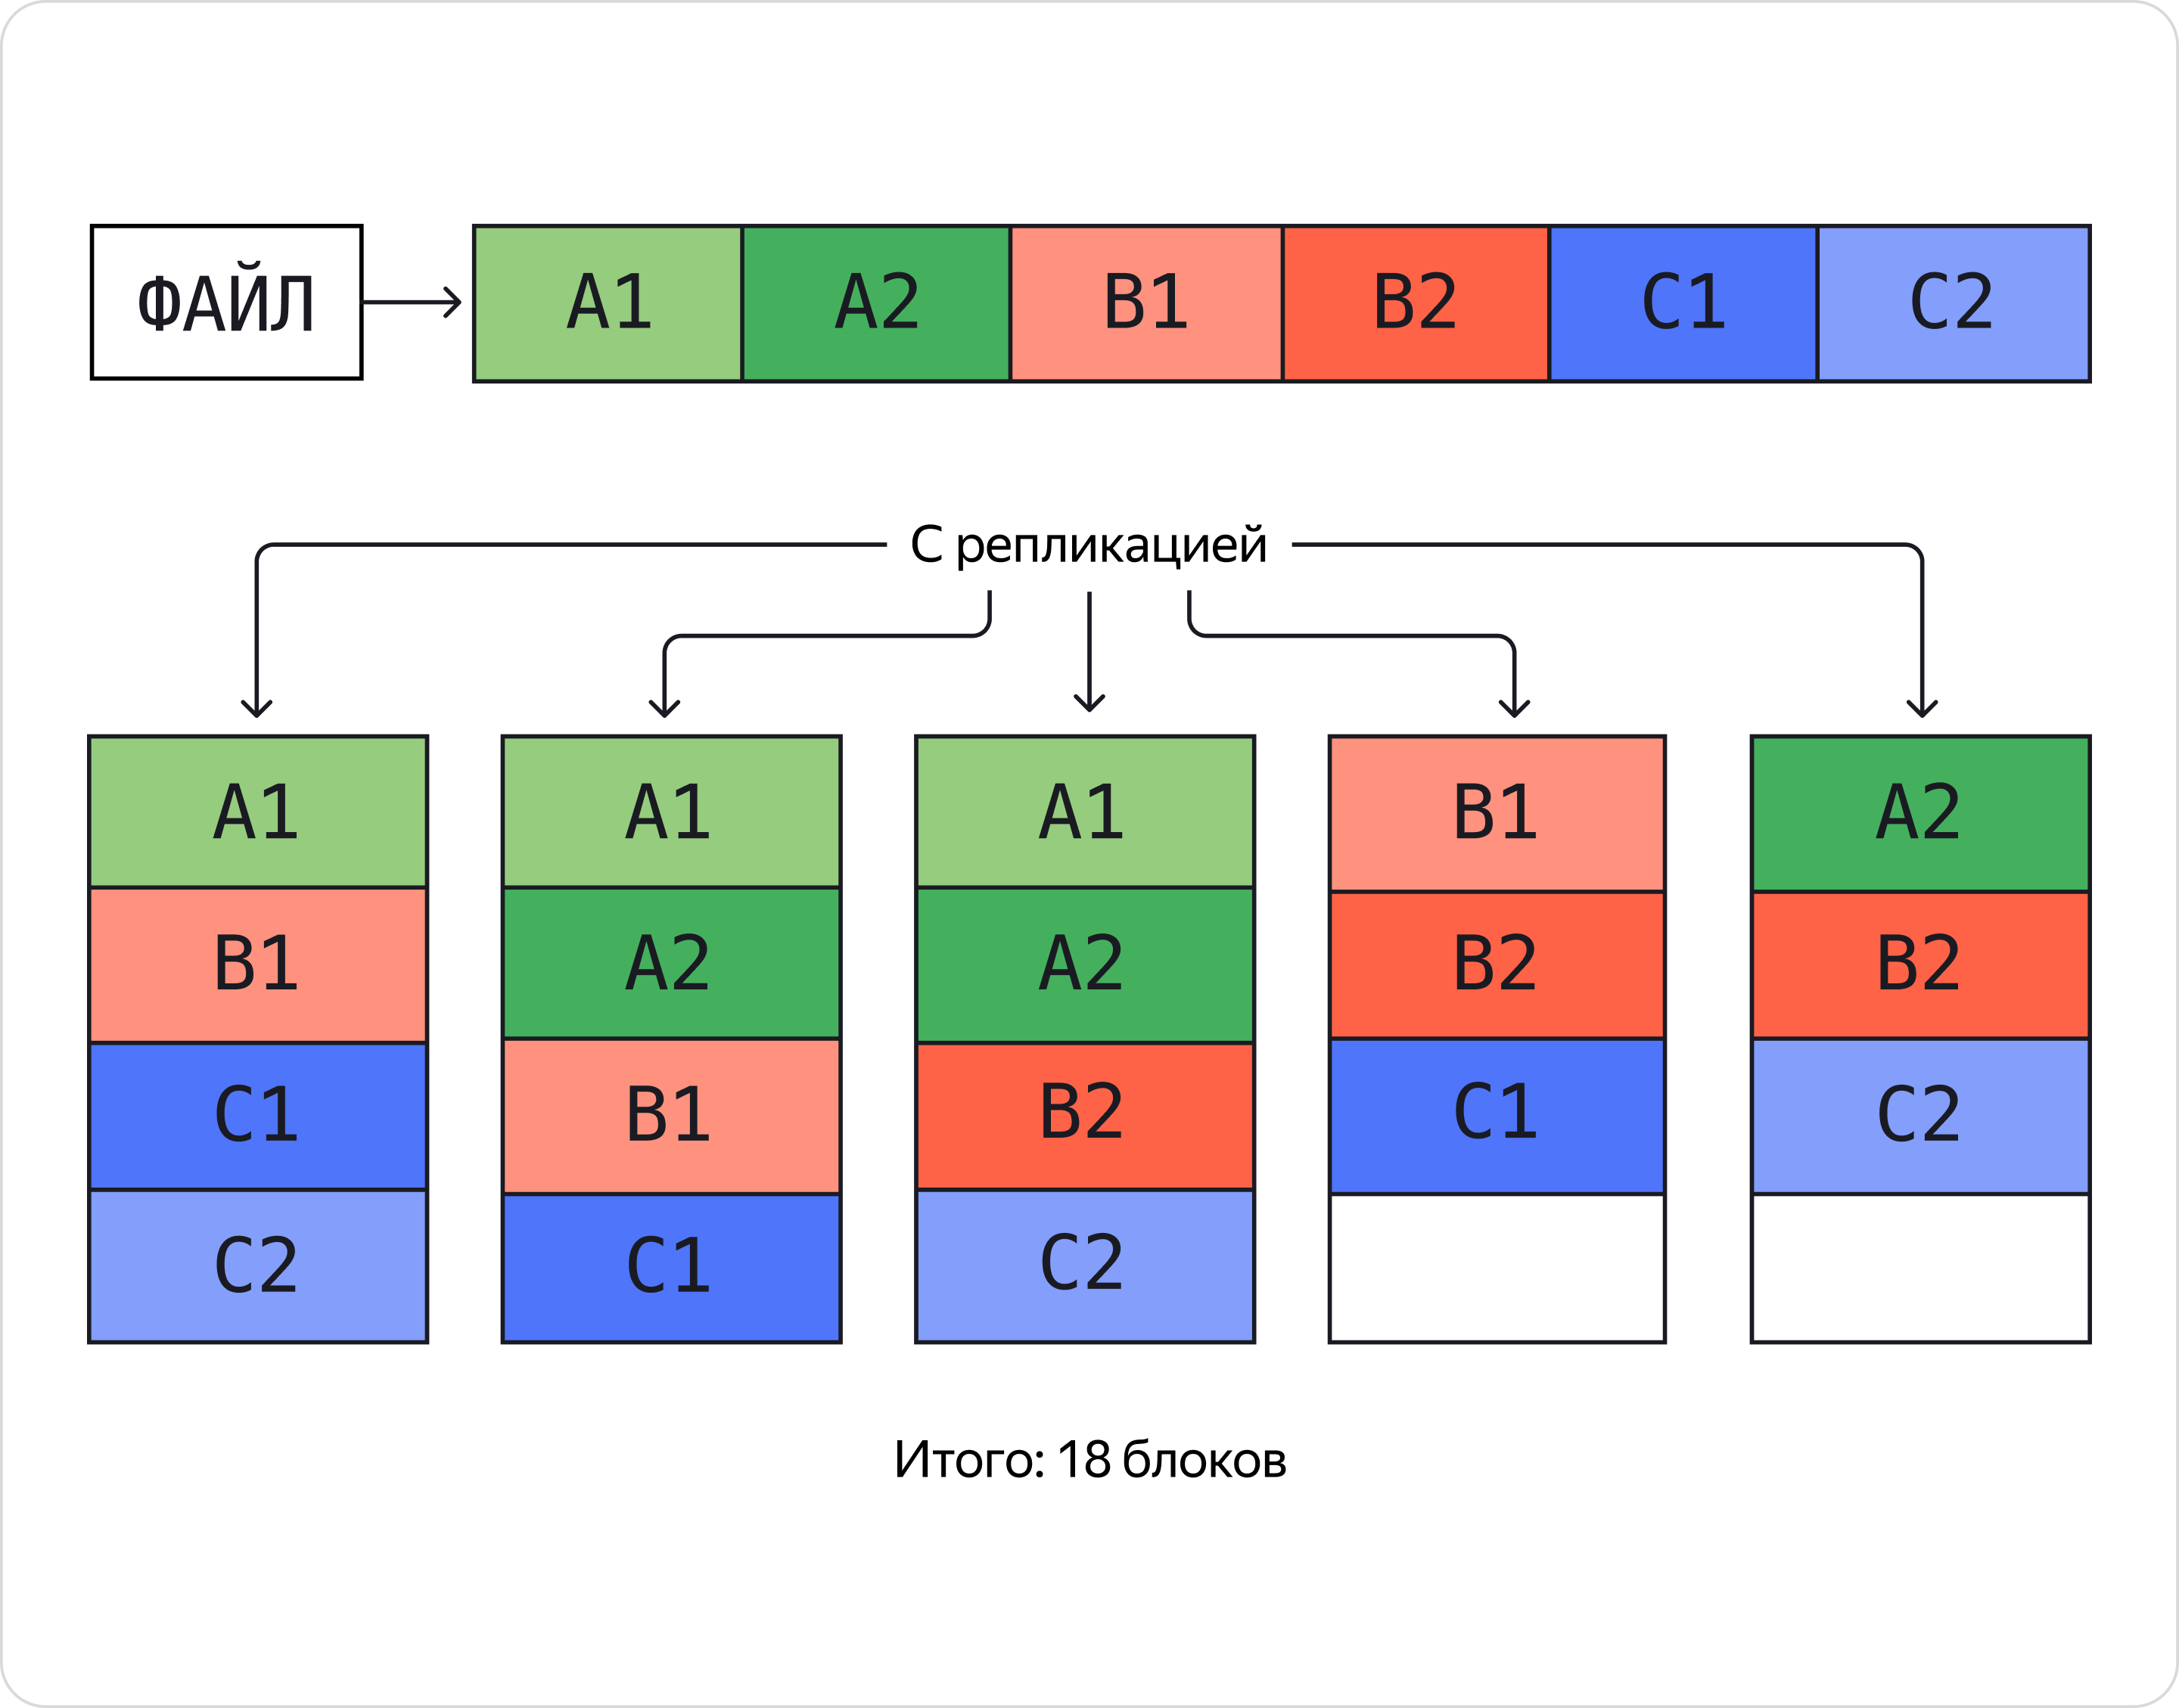

Такой механизм позволяет обезопасить систему, если 1–2 узла выйдут из строя. В этом случае резервная копия части файла найдётся на другой ноде. Файлы можно будет собрать и прочитать с других нод, пока админы разбираются с нодами, которые вышли из строя.

*Плюсы и минусы HDFS*

Благодаря репликации блоков по узлам данных распределённая файловая система Hadoop повышает надёжность хранения данных и скорость вычислений. Но HDFS, как и другие системы, имеет свои ограничения и минусы.

*Преимущества HDFS:*

- Довольно большой размер блока (>64 Мбайт), поскольку HDFS предназначена для хранения множества огромных (>10 Гб) файлов.

- Ориентация на недорогие и поэтому не самые надёжные серверы — отказоустойчивость всего кластера обеспечивает репликация данных.

- Зеркалирование и репликация осуществляются на уровне кластера, а не на уровне узлов данных.

- Репликация происходит в асинхронном режиме: информация распределяется по нескольким серверам прямо во время загрузки, поэтому если отдельные узлы выйдут из строя, то это не повлечёт за собой полную пропажу данных.
 - HDFS оптимизирована для потоковых считываний файлов, поэтому применять её для нерегулярных и произвольных считываний нецелесообразно.
Файлы пишутся однократно, что исключает внесение в них любых произвольных изменений.

- Принцип WORM (от англ. Write once, read many — «один раз записать, много раз прочитать») полностью освобождает систему от блокировок типа «чтение-запись». Запись в файл в одно время доступна только одному процессу, что исключает конфликты множественной записи.

- HDFS оптимизирована под потоковую передачу данных.

- Самодиагностика: каждый узел данных через определённые интервалы времени отправляет диагностические сообщения узлу имён, который записывает логи операций над файлами в специальный журнал.

- Все метаданные сервера имён хранятся в оперативной памяти на NameNode.

*Недостатки HDFS:*

- NameNode, или сервер имён, является центральной точкой всего кластера, и его отказ повлечёт сбой всей системы. «Положить» его не так уж сложно: достаточно начать писать много очень маленьких файлов. В определённый момент место, отведённое под хранение метаданных, кончится и NameNode начнёт сбоить и вскоре вовсе откажет.
- Отсутствие полноценной репликации Secondary NameNode.

- Принцип write once означает, что в HDFS нельзя дописывать или оставить открытыми для записи файлы, за счёт чего в классическом дистрибутиве Apache Hadoop невозможно обновлять блоки уже записанных данных.

Пример:

Даны файл 2024 Мбайт, размер блока — 128 Мбайт и фактор репликации, равный трём. Сколько блоков этого файла будет храниться в HDFS с учётом репликации?

Ответ 48 блоков: 15 блоков по 128 Мбайт плюс один остаточный блок, умноженные на фактор репликации — 3.

**Об алгоритме MapReduce**

В этом уроке вы познакомитесь с вычислительным сердцем Hadoop — алгоритмом обработки данных MapReduce.

Допустим, есть текстовый файл размером 50 гигабайт, и нужно узнать, какие слова чаще всего встречаются в этом файле, чтобы косвенно понять, о чём этот документ. В оперативную память компьютера этот файл не влезет — вы даже не сможете его открыть. Какие ещё варианты?

Этот файл можно разбить на несколько частей, так чтобы каждая из них не превышала объём оперативной памяти компьютера, и работать уже с ними. При таком подходе возникнет другая проблема: придётся долго обрабатывать каждую итеративно — друг за другом и загружая оперативную память компьютера на полную.

А что, если разбить файл на несколько частей и не обрабатывать их на единственном компьютере, а раздать нескольким, после чего собрать результаты работы на одном? Это и есть суть алгоритма MapReduce.

На MapReduce основываются почти все технологии big data. Принцип MapReduce заключается в разделении информационного массива на части, параллельной обработке каждой части на отдельном узле и финальном объединении всех результатов.

Простой и эффективный алгоритм адаптируется под разные виды задач. MapReduce может использоваться для индексации веб-контента, для подсчёта слов в большом файле, для счётчиков частоты обращений к заданному адресу, для вычисления объёма всех веб-страниц с каждого URL-адреса конкретного хост-узла, для создания списка всех адресов с необходимыми данными и для многих других задач, связанных с обработкой огромных массивов информации.

Хоть алгоритм и называется MapReduce, в действительности он состоит из трёх шагов: Map, Shuffle, Reduce.

Напомним, что в кластере есть два вида узлов: главный, который также называют master node или master, и рабочий, который называют worker node или просто worker. В следующем уроке вы узнаете, как между ними распределены операции MapReduce.

**Алгоритм MapReduce по шагам**

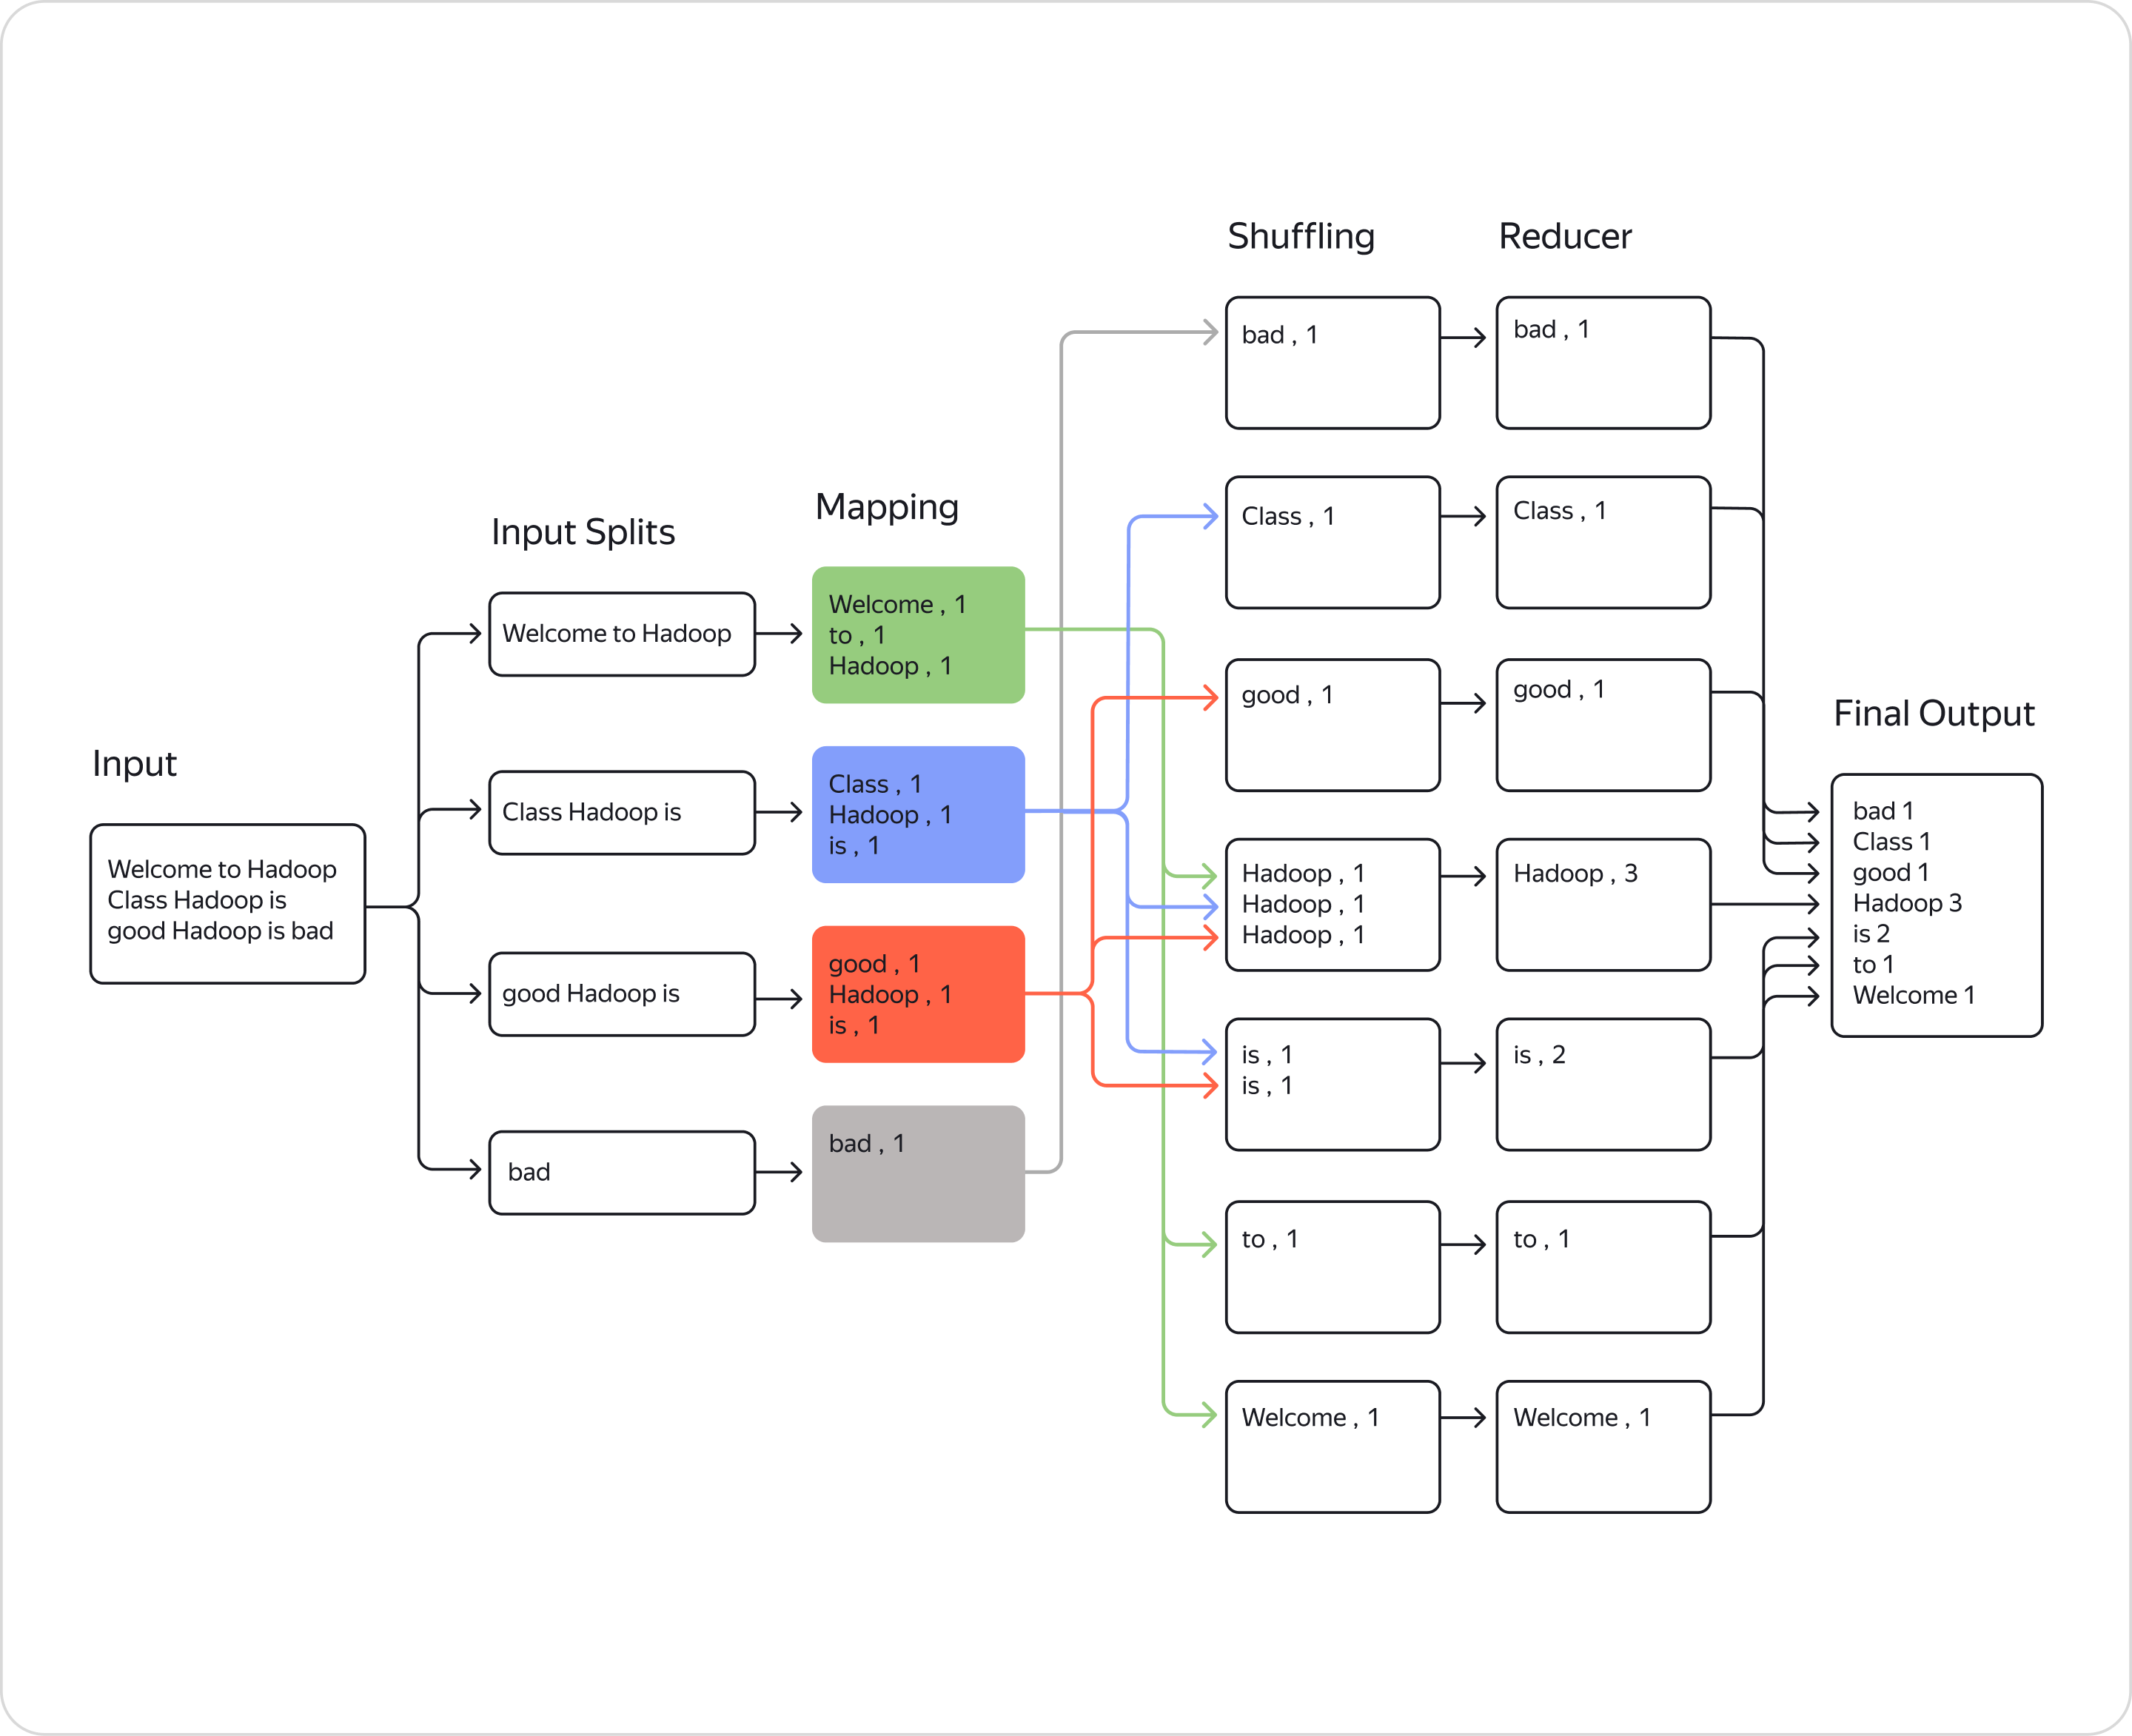

- Map — предварительная стадия обработки. На этом шаге разделяют входной массив данных: главный узел кластера (master node) получает этот список, делит его на части и передаёт рабочим узлам (worker node). Далее каждый рабочий узел применяет функцию map() к той части данных, которую он получил от главного узла. Напротив каждого слова он ставит единицу и записывает результат в формате «ключ-значение» во временное хранилище на диске, где ключ — это слово, а значение — это 1.
- Shuffle — самая тяжёлая, ресурсоёмкая и, соответственно, долгая стадия. На этом этапе рабочие узлы перераспределяют данные на основе ключей, созданных на стадии Map. В итоге, когда заканчивается работа этой стадии, все данные одного ключа лежат на одном рабочем узле. То есть, например, слово hadoop не может лежать на двух рабочих узлах — только на одном. После стадии Shuffle все ключи распределены между рабочими узлами по убыванию.
- Reduce — стадия, в которой результаты на каждом рабочем узле параллельно агрегируются и «склеиваются» на главном узле кластера (master node).
В процессе этапа Reduce главный узел получает от рабочих узлов промежуточные ответы по каждому ключу и передаёт их на свободные узлы для выполнения следующего шага. Когда все ключи пройдены, а все значения агрегированы, результаты возвращаются на главный узел. Это и есть решение задачи. При записи в файловую систему результат не отсортирован.

Итак, вы познакомились с главным алгоритмом big data, который позволяет распараллелить нагрузку и обрабатывать большие объёмы данных. Алгоритм эффективно подходит для задач разного вида и весьма отказоустойчив. При отказе рабочего узла, производящего операцию map или reduce, его работа автоматически передаётся тому, который работает и свободен.

Что происходит в алгоритме MapReduce на стадии Map?

Главный узел разделяет массив данных на части, а рабочие узлы применяют функцию map() к той части, которую получили от главного узла. Напротив каждого слова они ставят единицу и записывают результат в формате «ключ-значение» во временное хранилище.

Как распределены ключи после стадии Shuffle?

Ключи распределены так, что каждый из них находится только на одном рабочем узле. Все ключи распределены по убыванию.
Посмотрите на картинку с обработкой текста: каждый ключ находится только на одном рабочем узле, и они отсортированы по убыванию.

Что происходит на стадии Reduce?

Рабочие узлы перераспределяют между собой и сортируют пары «ключ-значение», агрегируют результат и отдают его главному узлу.

Где находится результат работы?

Только на главном узле.
Главный узел распределил задачу, а рабочие узлы её выполнили и вернули ему результат. Верно!

**Недостатки алгоритма MapReduce**

Когда есть большой объём данных, может возникнуть соблазн запустить сразу много задач на стадии Map. Но классическая реализация Apache Hadoop обрабатывает данные ациклично в пакетном режиме, и очерёдность этапов строго регламентирована, поэтому функции Reduce запустятся только после того, как закончатся все процессы Map.

💡 Пакетный сценарий обработки, или batch, — данные обрабатываются большими частями, или «пакетами». У таких задач есть явные начало и завершение обработки данных.

Классические примеры задач пакетного сценария работы:

- ежедневный расчёт метрик пользователей в приложении,
- подготовка отчёта с бизнес-результатами за месяц.

Задачи, которые являются не «пакетными», а потоковыми:

- распознавание музыки в приложении Shazam,
- появление заказов на сборку продуктов в Яндекс.Еде.

Кроме того, этап Map кончается записью промежуточных результатов на диск. А на следующем этапе Reduce происходит чтение с жёсткого диска, что влечёт сильные задержки в обработке информации (англ. latency — «задержка»).

💡 Таким образом, классическая реализация страдает от недостаточно высокой производительности.

Помимо этого, чтобы обработать данные по сложной логике, используя только MapReduce, нужно разбивать её на атомарные задачи и для каждой задачи отдельно писать программу mapper и программу reducer. Это увеличивает время разработки и усложняет её. При этом кодогенерация остаётся на стороне разработчика или аналитика.

Со временем образовался класс задач, которые не совсем вписываются в сценарий пакетной обработки данных, например:

- Потоковая обработка в режиме реального времени, так называемый streaming.

- Ad hoc аналитика или некоторое единоразовое исследование данных с помощью статистических методов.

- Работа итеративных алгоритмов на одном и том же датасете, например в задачах машинного обучения.

💡 Аd hoc задачей называют запросы или код, который пишется конкретно под задачу, как некоторое исследование. В целом сам термин ad hoc применяют, чтобы обозначить инструмент для выполнения конкретной задачи, без общей тенденции. Примеры аd hoc задач: проверить изменился ли у нас отток пользователей после внедрения новой фичи, провести A/B-тест с новой методологией, создать временную табличку.

Какой результат у стадии Map и куда он записывается?

Результат — это пара «ключ-значение», например вида “hadoop”: 1, и он записывается во временное хранилище на жёсткий диск.

**Предпосылки для появления Spark**

В прошлом уроке мы показали, что классическая реализация MapReduce в Apache Hadoop имеет недостатки. Теперь предлагаем вам узнать, как менялись сценарии использования инструментов для обработки больших данных.
Со временем возникла потребность выполнять задачи, которые не входят в пакетный сценарий обработки данных. Например, в случае Yahoo — ранжировать поисковые запросы. В таких задачах нужны были десятки сложных MapReduce-операций, описывающих бизнес-логику, которая в каждом конкретном случае могла быть разной.
Кроме того, потребовалось проводить аналитику для оценки работы бизнеса. Раньше это делали аналитики, используя SQL и скриптовые языки программирования, такие как, например, Python. Но Apache Hadoop не поддерживал функционал для выполнения итеративной аналитики и работы с табличными данными.

*Специфика машинного обучения*

Другая область, которая всегда шла рядом с развитием обработки больших данных, — это машинное обучение. Так как качество моделей и их обобщающая способность зависят от размера обучающей выборки, то эта сфера выиграла бы за счёт возможности обучаться на больших данных и за счёт реализации ML-алгоритмов (от англ. machine learning) в распределённой парадигме.

Однако классическая реализация не позволяет этого сделать по двум причинам:

- Во-первых, обучение модели — сложный итеративный процесс, задача которого — максимизировать метрику или метрики качества модели и минимизировать функцию потерь. Это происходит итеративно с помощью алгоритмов оптимизации, например градиентного спуска. Каждый раз алгоритм машинного обучения стремится улучшить функцию предсказания, основываясь на опыте прошлых итераций. Такой сценарий работы нереализуем в рамках Apache Hadoop.

- Во-вторых, реализация алгоритмов для локального обучения модели (например, на языке Python — библиотека sklearn) поддерживает обучение только на локальном компьютере. То есть возникла ещё потребность реализовывать ML-алгоритмы, которые могли бы работать с распределёнными данными и укладываться в концепцию MapReduce.

*Графы, языки и форматы хранения*

В синергии больших данных и машинного обучения можно отдельно выделить специфический класс задач — оптимизацию на графах. Например, задача о кратчайшем пути часто возникает в логистике, при построении маршрутов, чтобы курьеры вовремя развезли товары по городу. Или задача о максимальном потоке — как послать максимально возможное количество грузов из начального пункта в конечный, если пропускная способность путей между пунктами ограниченна. Эти задачи всегда были ресурсоёмкими и выиграли бы от возможности решаться в рамках распределённой системы вычислений.

Также сообществу, которое развивало и пользовалось Apache Hadoop, хотелось, чтобы инструмент был «кросс-языковым». То есть позволял описать бизнес-логику на разных языках программирования, которые бы понимали вычислительное ядро, и далее инструмент работал бы по оптимизированному плану, исходя из того, как хранятся данные в распределённой файловой системе.

Последний аспект — это форматы хранения данных. Желательно, чтобы инструмент поддерживал возможности работы как с разными источниками данных, так и с разными форматами. В идеале новый инструмент должен работать с основой Hadoop-экосистемы, которую вы уже знаете, — HDFS, а также с реализованными проектами экосистемы — Avro и Hive. Последние реализуют оптимизированные форматы хранения данных для распределённой системы и табличную абстракцию для простых SQL-запросов.

*Вывод*

Как можно заметить, у сообщества, которое развивало Apache Hadoop, было много запросов для инструмента, развивающего сценарии применения Hadoop-экосистемы. Релиз инструмента Apache Spark, который впервые исполнил все эти желания, состоялся в 2014 году. Вы познакомитесь с ним ближе в следующем модуле.

*Заключение*

В этом модуле вы познакомились с принципами построения распределённых систем и узнали о наборе инструментов, который можно считать некоторым стандартом обработки больших данных.

Разобрали, как работает вычислительная основа Hadoop — распределённая файловая система HDFS, и алгоритм MapReduce.

Кроме того, мы постарались донести, какие преимущества этих инструментов помогают обрабатывать большие данные, а какие у инструментов есть слабые стороны и точки отказа.

В следующем модуле мы продолжим начатый разговор о Spark.

# **Знакомство со Spark**

**Особенности и модули Spark**

В прошлой теме мы рассказали о недостатках алгоритма MapReduce: этапы Map и Reduce не могут происходить одновременно, поэтому алгоритм не подойдёт для задач, в которых данные поступают непрерывно.

Напомним, что алгоритм MapReduce лучше использовать в задачах, когда данные поступают пакетами, то есть частями. Такой процесс называют пакетной обработкой (англ. batch processing).

Обратите внимание на следующие особенности Spark:

- Spark обрабатывает данные в оперативной памяти, что позволяет делать сложные расчёты и ad-hoc аналитику, работать с алгоритмами машинного обучения и решать задачи на графах.

- Spark может использоваться для итеративной аналитики и потоковой обработки данных, в то время как Hadoop — нет.

- «Под капотом» Spark работают различные механизмы оптимизации вычислений: можно сохранять объекты в оперативной памяти во время вычислений и переиспользовать их в дальнейших расчётах для большей эффективности и скорости.

💡 Аd-hoc задачей называют запросы, которые пишутся под конкретную проблему, в качестве исследования. В целом термин ad-hoc применяют, чтобы обозначить инструмент для выполнения конкретной задачи, без общей тенденции.

 Примеры аd-hoc задач:

- проверить, изменился ли отток пользователей после внедрения новой фичи;

- провести AB-тест с новой методологией;

- создать временную табличку с отчётом или результатами исследования.

*Модули Spark*

Spark состоит из нескольких модулей, которые представлены на схеме.

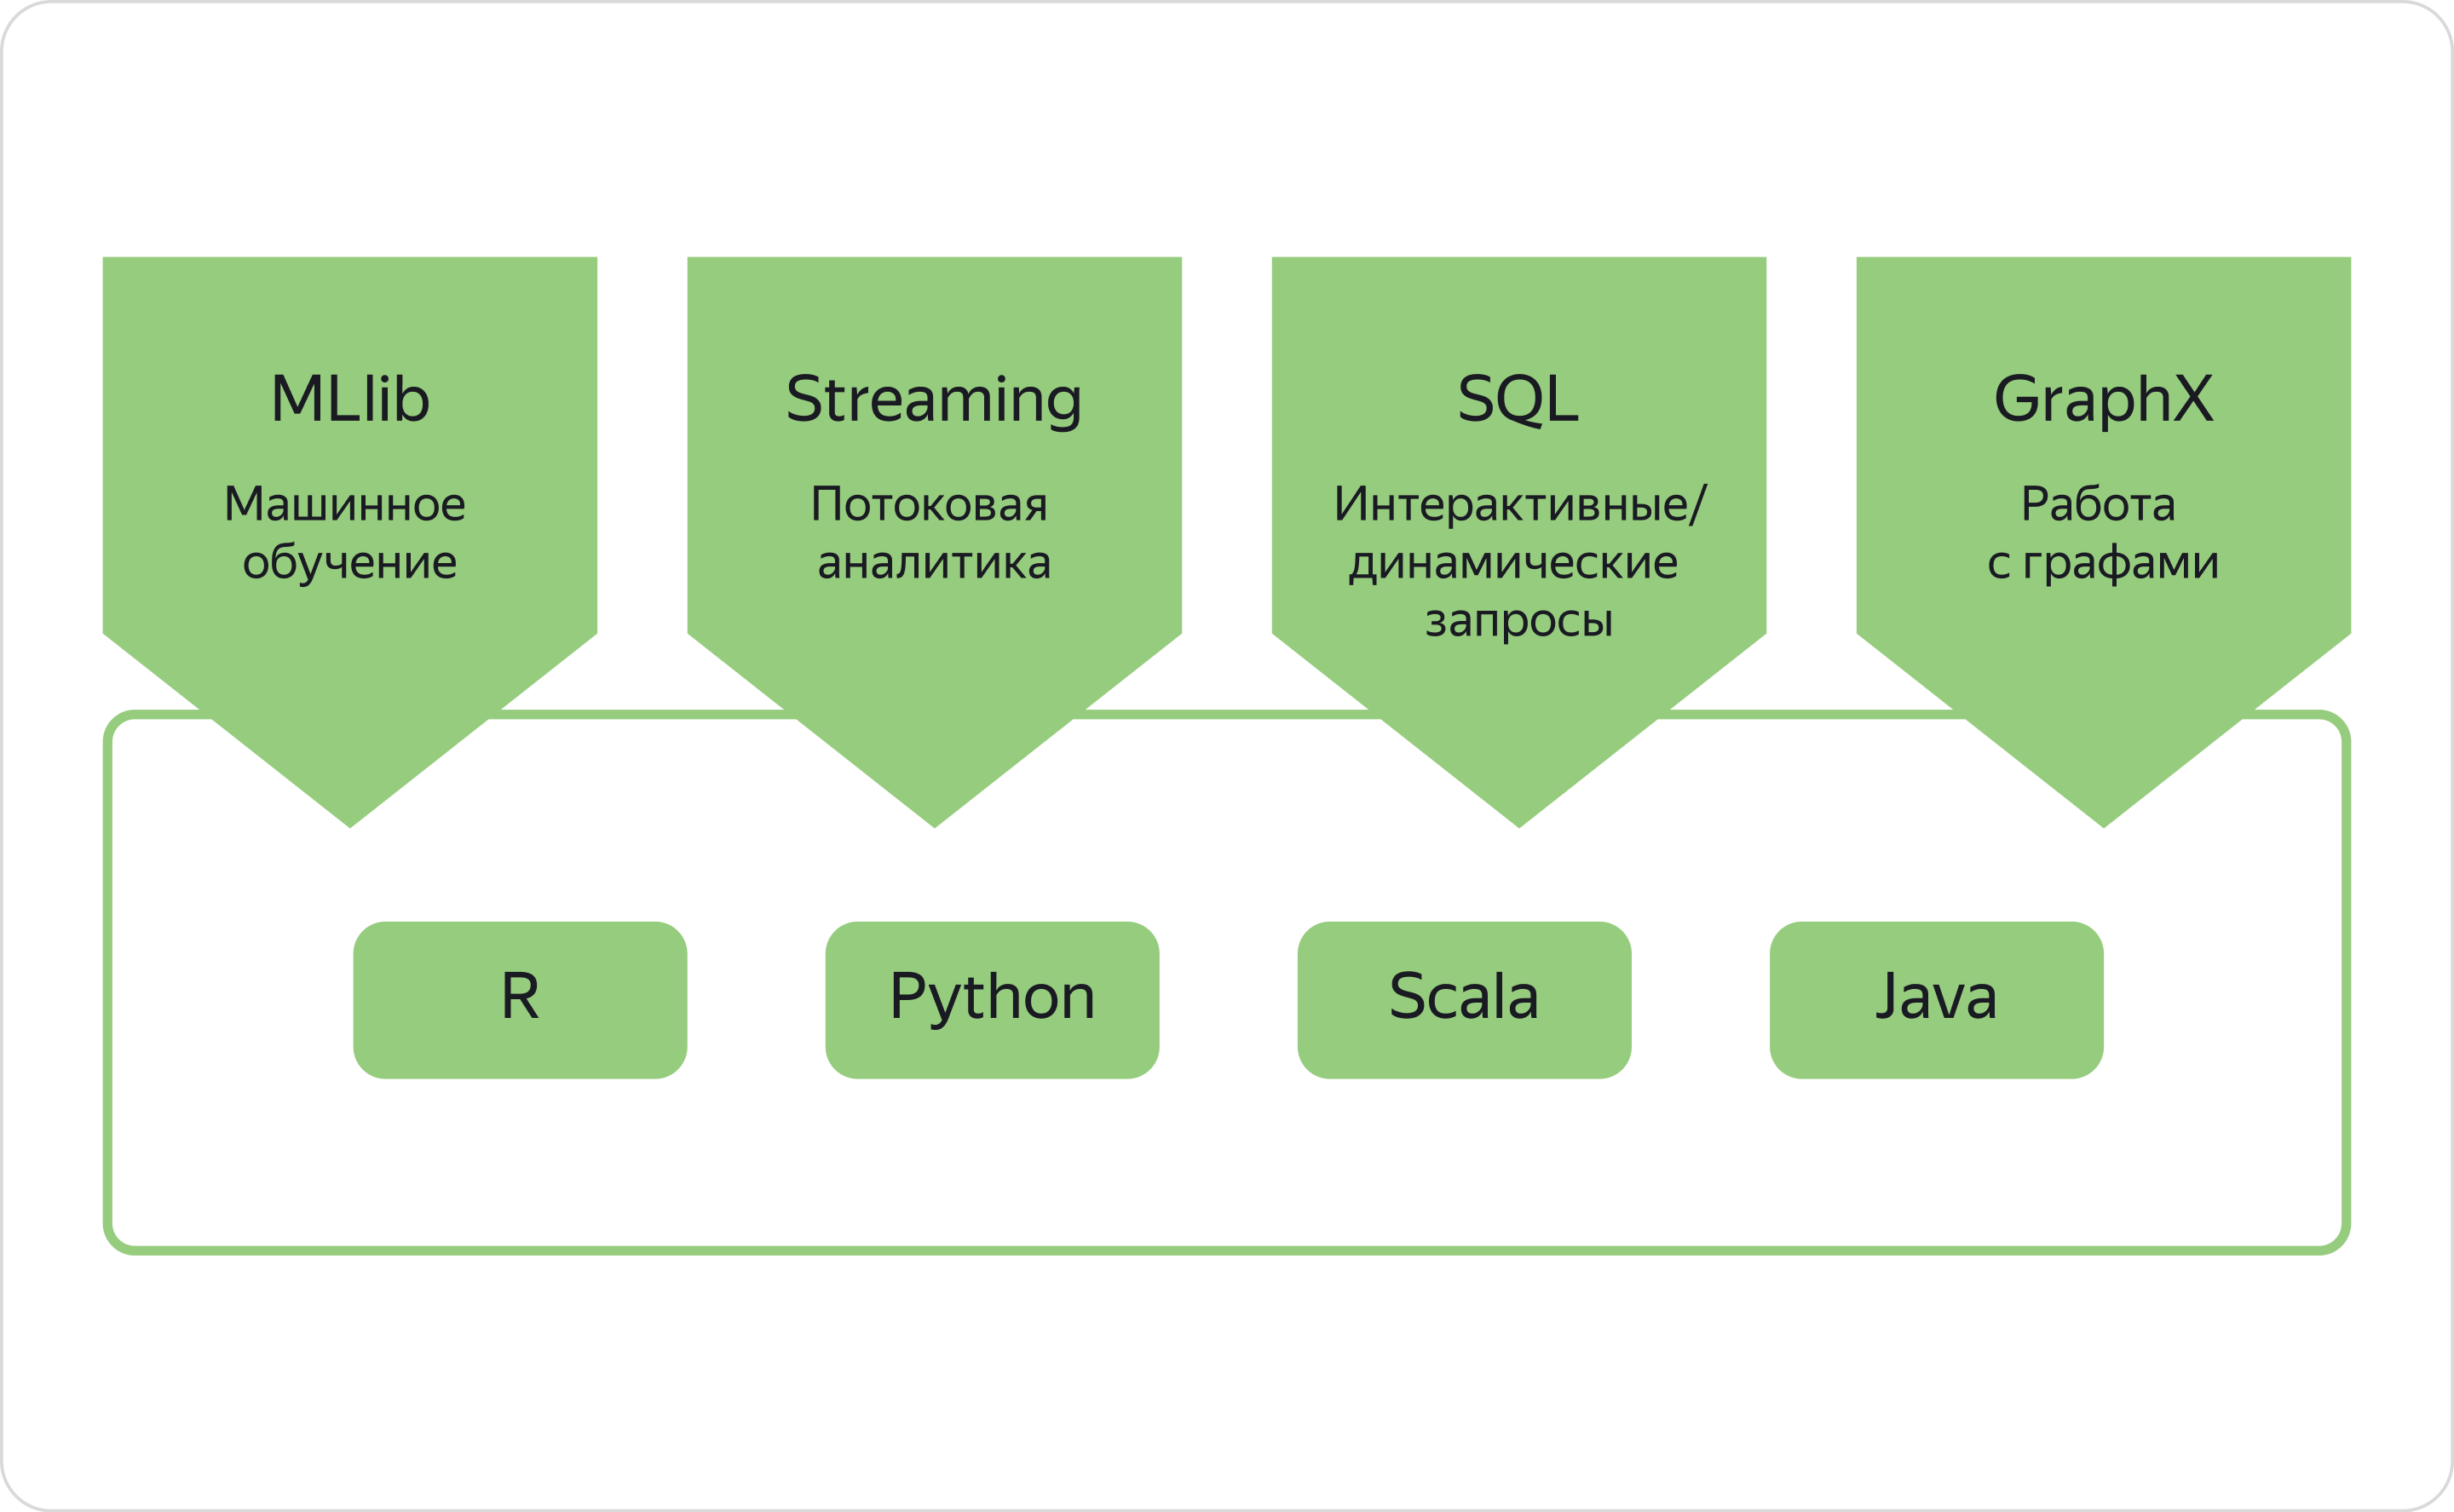

- Ядро, или Spark Core (англ. core — «ядро»), со встроенными интерфейсами для программирования на разных языках (API): R, Python, Scala, Java. Необязательно программировать на всех языках сразу — достаточно знать один. Такое разнообразие позволяет программистам, владеющим разными языками, пользоваться Spark без привязки к конкретному языку программирования. При этом сам Spark написан на языке Scala и внутри использует виртуальную машину Java для вычислений.
- Spark SQL — модуль, который позволяет писать аналитические запросы на SQL.
- Spark Streaming — модуль для обработки потоковых данных.
- MLlib — модуль, в котором реализованы алгоритмы машинного обучения, адаптированные для распределённой системы хранения и обработки данных.
- GraphX — модуль для решения задач, связанных с графами. Этот модуль также адаптирован для распределённой системы хранения и обработки данных.

Помимо этих модулей энтузиасты разрабатывают и поддерживают различные сторонние модули, которые расширяют возможности Spark.

Модули можно подключать к Spark Core по мере необходимости для той или иной задачи. Этот курс фокусируется на двух: Spark Core и Spark SQL — для задач трансформации данных. А также затрагивает Spark MLlib — его используют, чтобы строить модели машинного обучения.

**Режимы запуска Spark**

Spark можно запускать в разных режимах. Выбор режима зависит от того, на каких устройствах выполняются расчёты.

Если в вашем распоряжении находится один компьютер, Spark можно запустить в локальном (англ. local mode) режиме. В этом случае нужно импортировать библиотеку Spark, которая обработает код без распределения вычислений, используя мощности одного компьютера.

Если у вас есть кластер, запустить Spark можно в двух режимах.

В первом — автономном (англ. standalone mode) — режиме Spark сам распределяет ресурсы. Такой режим подходит для случаев, когда на кластере работает мало людей и им не приходится конкурировать за ресурсы.

В случаях, когда на кластере работает много специалистов, используют второй режим — кластерный (англ. cluster mode). В этом случае управление ресурсами отдаётся стороннему модулю. Есть несколько менеджеров ресурсов на выбор, которые интегрируются со Spark: Yarn, Mesos или Kubernetes (K8S), если в проекте есть отдельный кластер под контейнеры. Самая распространённая конфигурация — хранить данные в HDFS, использовать Spark для расчётов и трансформаций, а YARN — для управления ресурсами кластера.

Можно сделать вывод, что Spark за счёт разных режимов работы может успешно использовать вычислительные мощности как локального компьютера, так и целого кластера. Наряду с этим, Spark может сам управлять ресурсами или передавать управление специальным менеджерам ресурсов, чтобы увеличить отказоустойчивость работы Spark.

**Архитектура Spark-приложения на кластере**

В этом уроке вы узнаете, что происходит при запуске Spark-приложения на кластере. Когда в распоряжении Spark находится несколько узлов, или серверов, которые можно использовать для распределённых вычислений, большую задачу можно разбить между этими узлами. Так можно быстрее получить результат расчётов.

Итак, чтобы взаимодействовать со Spark, нужно в первую очередь создать (инициализировать) Spark-приложение с помощью Spark-сессии.

💡 Spark-сессия — это точка входа в Spark-приложение. Объект, в котором определяются параметры конфигурации: название приложения, менеджер ресурсов (то есть способ подключения — локально, к Kubernetes, YARN или Mesos), количество выделяемых ядер и памяти.

Spark-сессия подробнее рассматривается в следующем уроке. Здесь покажем, как будет работать приложение, когда инициализировали Spark-сессию и «подключились к кластеру».

Инициализированное Spark-приложение состоит из двух типов программ, или сущностей: драйвер (от англ. driver — «двигатель») и исполнитель (англ. executor). Драйвер — главная программа, в которой содержится написанный код. Исполнителей может быть несколько: они находятся в разных узлах и отвечают за вычисления.

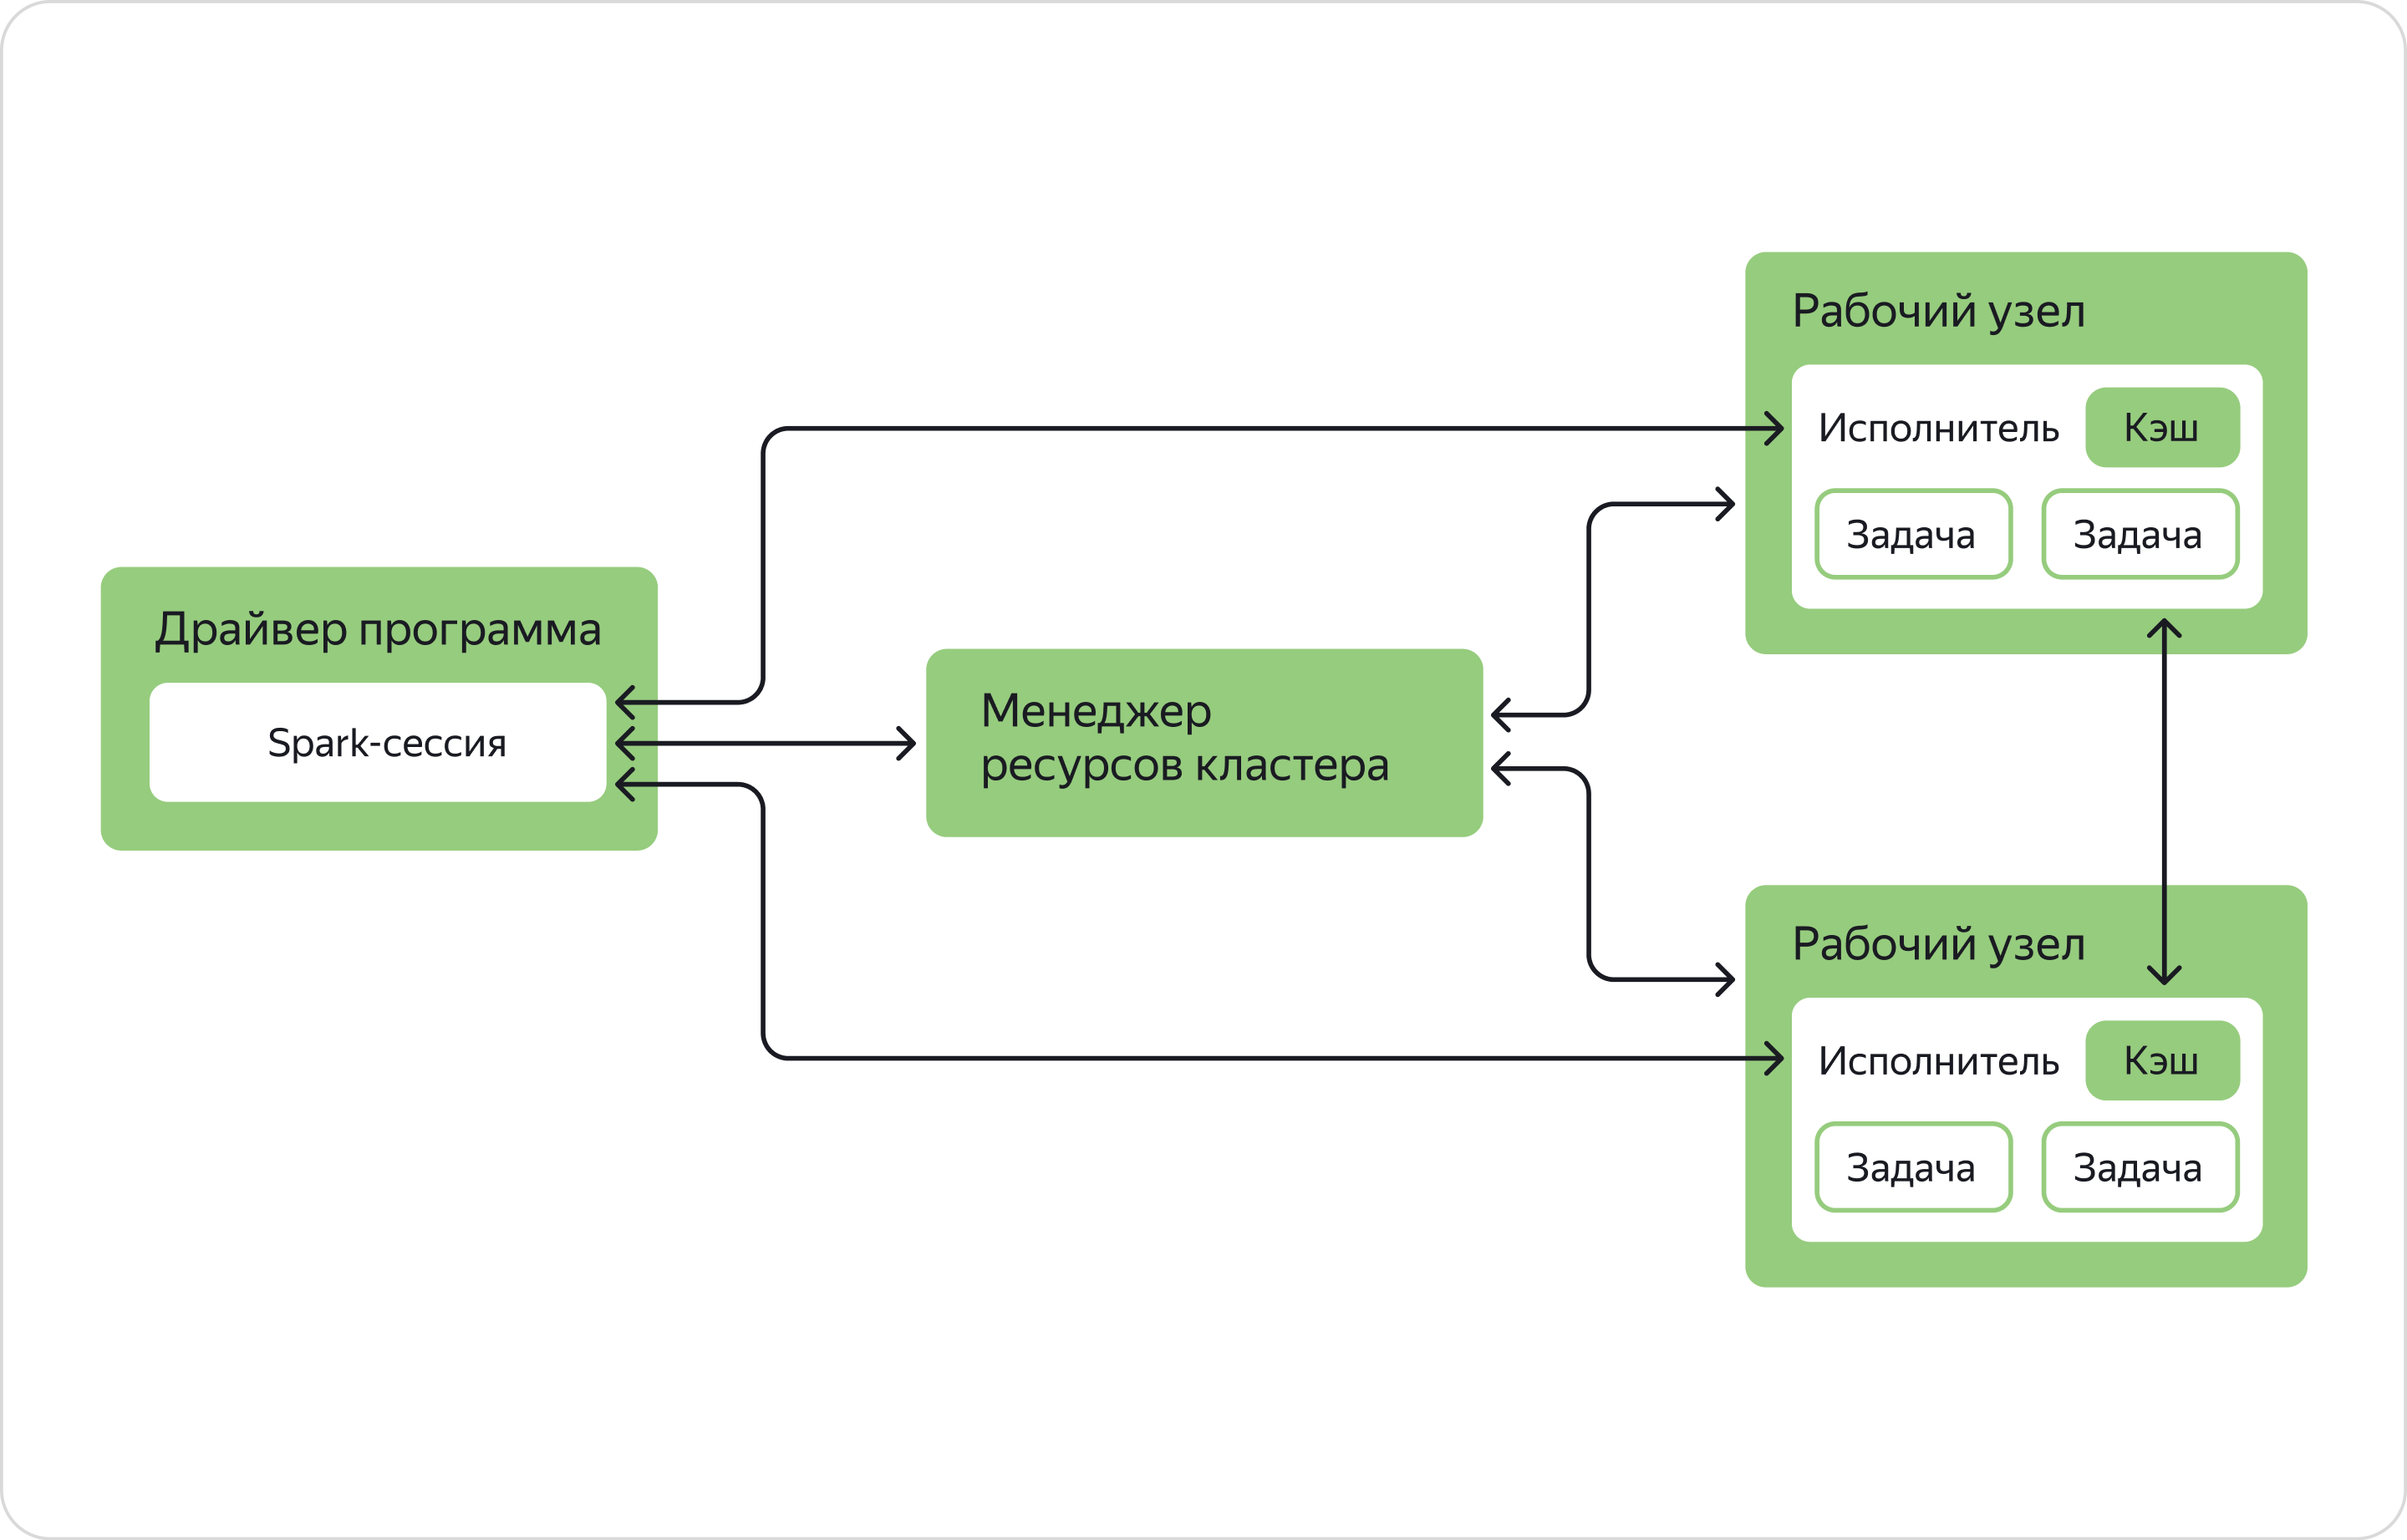

Драйвер создаёт план вычислений и разбивает его на этапы (англ. job — «задание»). Разработчики их часто называют «джоба». В этапах выделяются стадии, а в них — задачи поменьше. Драйвер назначает задачи программам-исполнителям. Чем больше исполнителей, тем быстрее завершится работа над задачей.

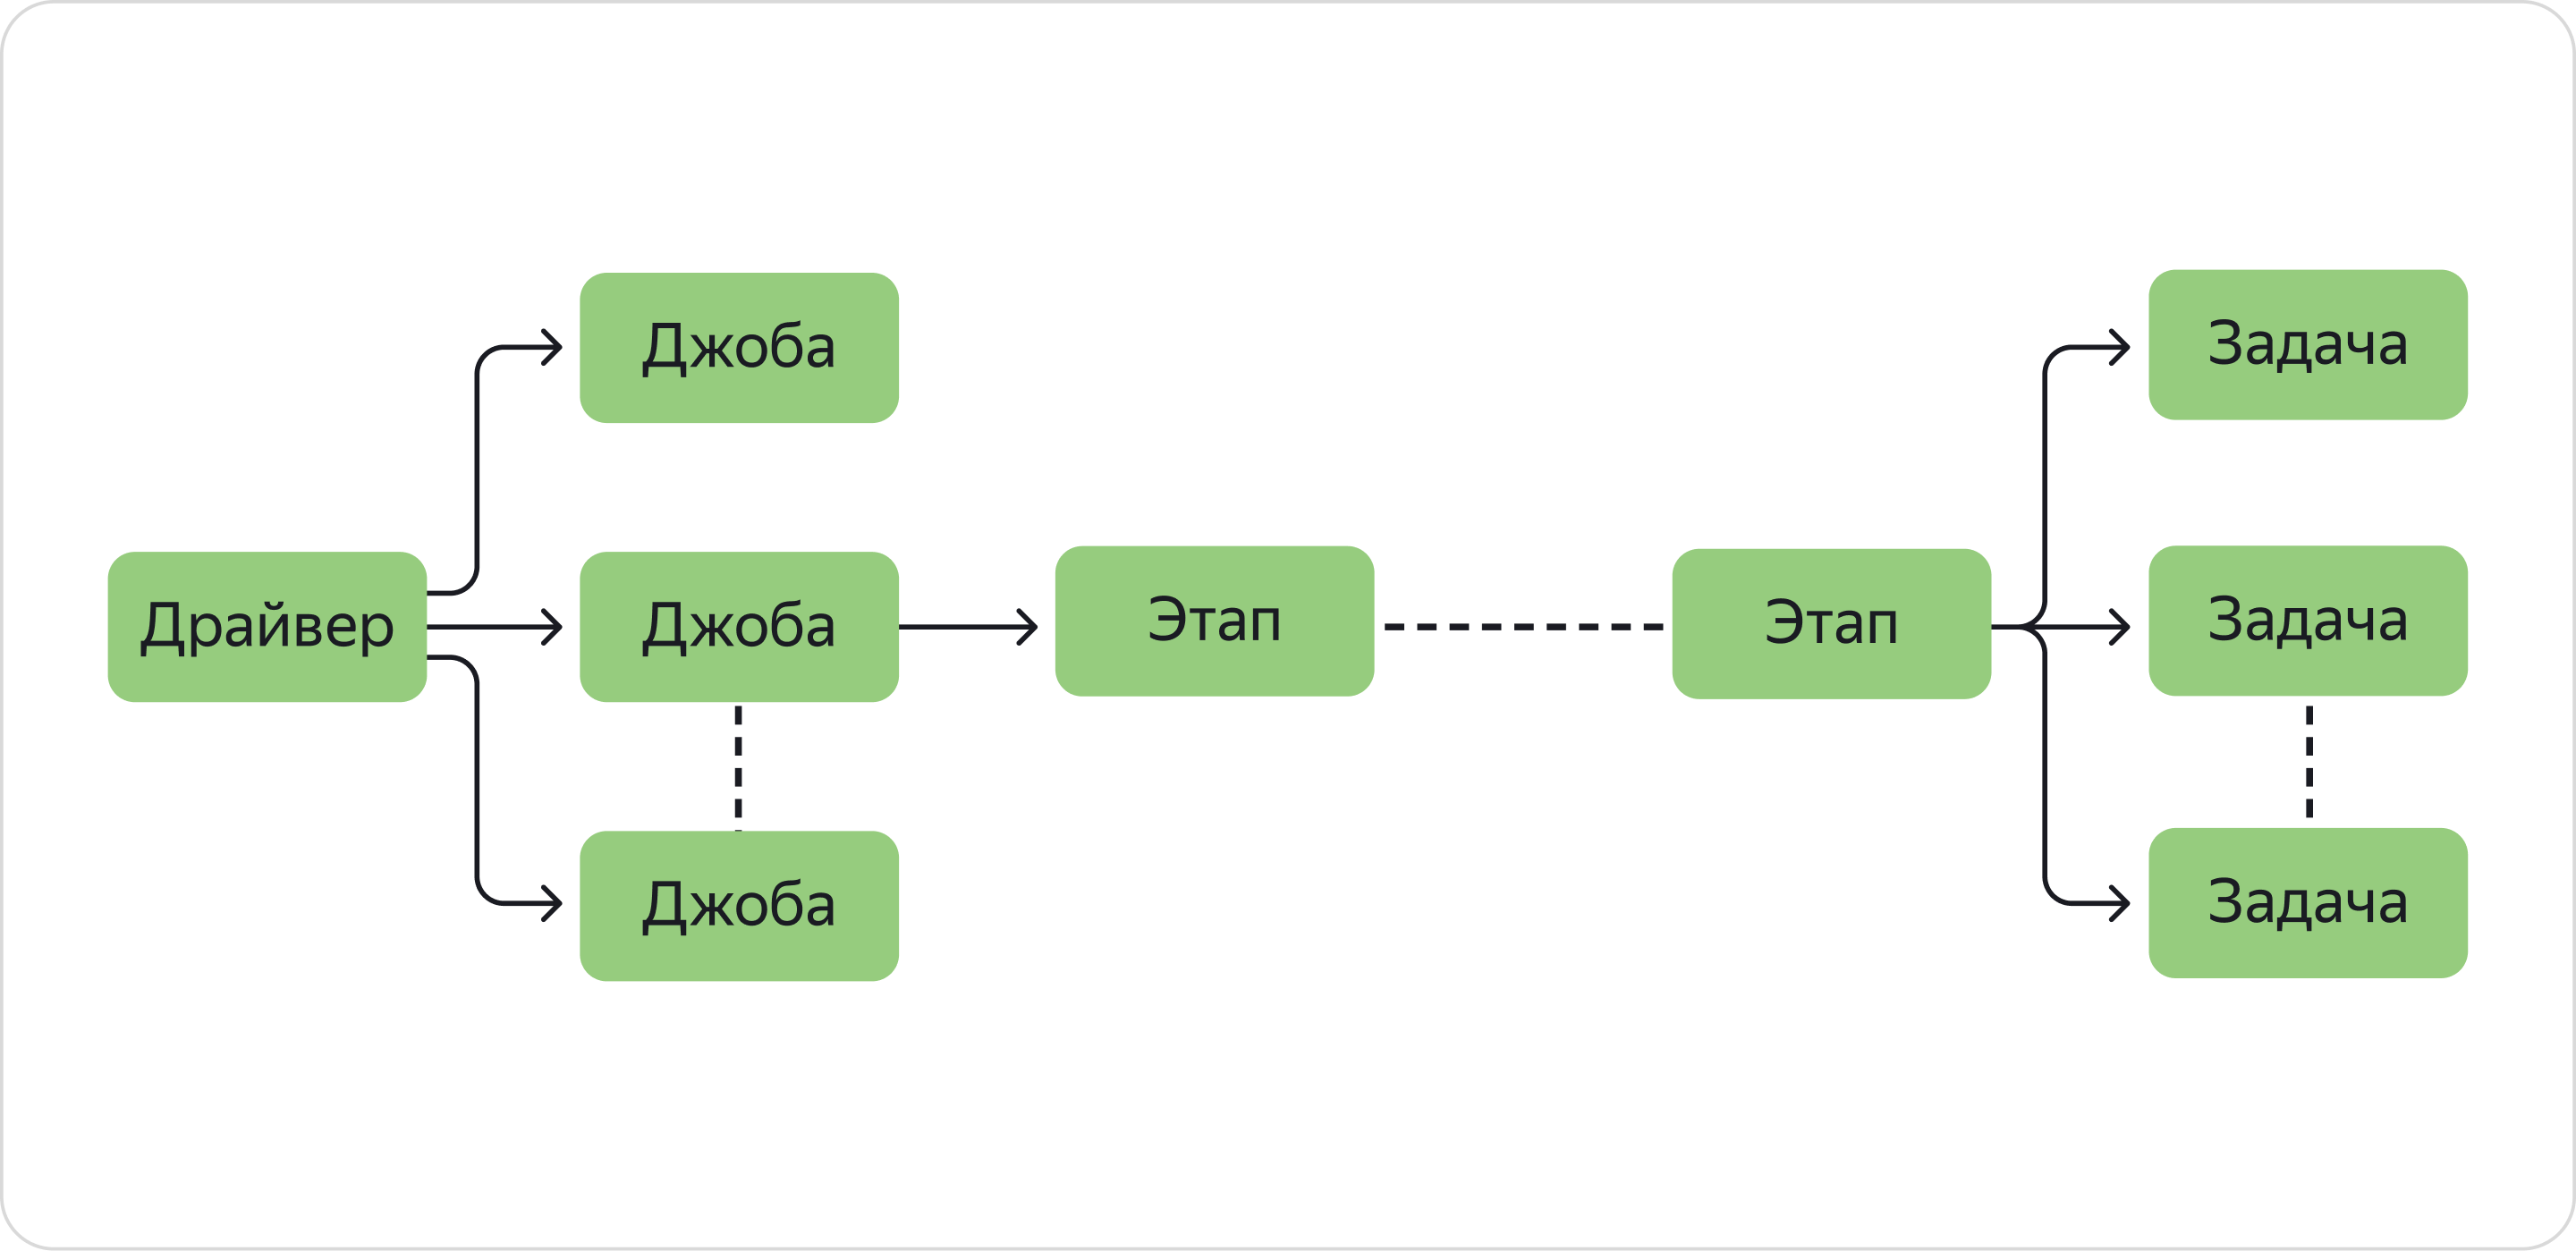

Помимо вычислительной мощности, драйверы и исполнители обладают оперативной памятью, в которой располагаются объекты, участвующие в вычислениях.

Что делает дорайвер?

Драйвер раздаёт задания на вычисления как главный узел в концепции MapReduce.

Сколько драйверов и исполнителей включено в Spark-приложение?

Один драйвер и несколько исполнителей.
Верно! Spark-приложение — это многосоставная абстракция из кода на драйвере. Этот код выполнятся на нескольких исполнителях параллельно. Spark-сессия связывает драйвер и исполнителей для отправки заданий и получения результатов.

**Spark-сессия. Инициализация и настройка**

В прошлом уроке вы узнали, как происходит запуск задач на кластере со Spark, а этот посвящён Spark-сессии, которая и является главным объектом для взаимодействия со Spark. Вы узнаете, какие параметры Spark-сессии ключевые и на какие нужно обращать особое внимание.

В старых версиях, до появления SparkSession, были другие сущности для взаимодействия с разными модулями. Например, SparkContext — для взаимодействия со Spark Core и работы с определёнными типами данных в Spark (RDD, о которых будет рассказано в третьей теме), SQLContext — для взаимодействия со Spark SQL и HiveContext — для работы с Hive.

С появлением версии Spark 2.0 появилась сущность SparkSession, которая стала «3 в 1» и объединила SparkContext, SQLContext и новые методы. В курсе вы будете работать с версией Spark 3.0, поэтому будем в основном пользоваться Spark-сессией и немного SparkContext.

💡 Spark-сессия — это точка входа в Spark-приложение. Объект, в котором определяются параметры конфигурации: название приложения, менеджер ресурсов (то есть способ подключения — локально, к Kubernetes или YARN и т. д.), количество выделяемых ядер и памяти.

Инициализировать Spark-сессию можно двумя способами:

- Локально в jupyter notebook:

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \                                   # создаём объект Spark-сессии, обращаясь к объекту builder, который создаёт сессию, учитывая параметры конфигурации
    **.master("local")\**                            # явно указываем, что хотим запустить Spark в локальном режиме
    .appName("Python Spark SQL basic example") \ # задаём название нашего Spark-приложения
    .getOrCreate()                               # функция инициализации объекта сессии

- На кластере:

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

Чтобы соблюдать обратную совместимость с более ранними версиями, функционал SparkContext оставили. Обращаться к нему можно так:

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()

spark_context = spark_session._sc
spark_context = spark_session.sparkContext

При запуске в локальном режиме, при установленной библиотеке pyspark проблем не возникает, так как нет сложной кластерной системы — всё выполняется на локальном компьютере.

**Инициализация Spark-сессии**

В большой компании чаще всего Spark развёрнут в кластерном режиме. Этот урок расскажет о настройках Spark-сессии, которые нужно знать, чтобы корректно сконфигурировать ваше Spark-приложение для работы на кластере.

In [ ]:
import os
from pyspark.sql import SparkSession

EXECUTOR_ENV = 'hdfs:///path/to/python/anaconda_2.4.4.tar.gz' # tar.gz file with python for executors
SPARK_ARCHIVE = 'hdfs:///path/to/lib/spark/sparkjars-2.4.4.zip'

os.environ["ARROW_LIBHDFS_DIR"] = "/usr/hdp/2.6.5.0-292/usr/lib"
os.environ['HADOOP_HOME'] = '/usr/hdp/current/hadoop-client/'
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64/'
os.environ['HADOOP_CONF_DIR'] = '/etc/hadoop/conf/'
os.environ['SPARK_HOME'] = '/opt/conda/lib/python3.7/site-packages/pyspark'
os.environ['PYSPARK_PYTHON'] = 'anaconda_2.4.4.tar.gz/bin/python3'


def start_spark(app_name: str,
                driver_memory='12G',
                num_executors: int,
                executor_memory='6G',
                executor_cores=2,
                queue='default',
                additional_params: Dict[str, str] = None):


    spark_driver_host = os.getenv('HOST_IP')

    spark_session = (
        SparkSession
        .builder
        .appName(app_name)
        .master('yarn')
        .config('spark.driver.memory', driver_memory)
        .config('spark.driver.maxResultSize', driver_memory)
        .config('spark.driver.allowMultipleContexts', 'True')
        .config('spark.executor.cores', executor_cores)
        .config('spark.executor.memory', executor_memory)
        .config('spark.executor.memoryOverhead', '1G')
        .config('spark.dynamicAllocation.enabled', 'true')
        .config('spark.dynamicAllocation.maxExecutors', num_executors)
        .config("spark.dynamicAllocation.minExecutors", int(num_executors * 0.2))
        .config('spark.sql.broadcastTimeout', '36000')
        .config('spark.dynamicAllocation.cachedExecutorIdleTimeout', '1200s')
        .config('spark.driver.host', spark_driver_host)
        .config('spark.driver.bindAddress', '0.0.0.0')
        .config('spark.driver.extraLibraryPath', '/usr/hdp/2.6.5.0-292/hadoop/lib/native')
        .config('spark.driver.extraJavaOptions', '-Dhdp.version=current')
        .config('spark.debug.maxToStringFields', '50')
        .config('spark.yarn.queue', queue)
        .config('spark.yarn.dist.archives', EXECUTOR_ENV)
        .config('spark.yarn.archive', SPARK_ARCHIVE)
        .config('spark.yarn.am.extraJavaOptions', '-Dhdp.version=current')
        .config('spark.rpc.message.maxSize', '1024')
        .config('spark.sql.warehouse.dir', '/apps/hive/warehouse')
        .config('spark.sql.execution.pandas.respectSessionTimeZone', 'false')
        .config('spark.sql.orc.filterPushdown', 'true')
        .config('spark.sql.hive.convertMetastoreOrc', 'true')
        .config('spark.shuffle.service.enabled', 'true')
        .config('spark.hadoop.yarn.timeline-service.enabled', 'false')
        .config('spark.hadoop.yarn.client.failover-proxy-provider',
                'org.apache.hadoop.yarn.client.ConfiguredRMFailoverProxyProvider')
        .config('spark.serializer', 'org.apache.spark.serializer.KryoSerializer')
        .config('spark.kryoserializer.buffer.max', '1024m')
        .config('spark.executor.extraLibraryPath', '/usr/hdp/2.6.5.0-292/hadoop/lib/native')
        .config("spark.sql.shuffle.partitions", "1000")
        .config('spark.sql.parquet.writeLegacyFormat', 'true')
        .config("spark.jars", "hdfs:///share/lib/jar/postgresql-42.2.12.jar,hdfs:///share/lib/jar/ojdbc7.jar")
        .config("spark.port.maxRetries", '1000')
        .config("spark.shuffle.io.maxRetries", '1000')
    )

    if additional_params:
        for key, value in additional_params.items():
            spark_session = spark_session.config(key, value)

    spark = (
        spark_session
        .enableHiveSupport()
        .getOrCreate()
    )
    sc = spark.sparkContext

    return sc, spark



sc, spark = restart_spark(app_name='test-app')
spark.stop()

Здесь довольно много параметров, но ключевых из них несколько, и с помощью функции start_spark из код-блока выше их можно настраивать. Практически всегда пример подключения к кластеру хранится в документации проекта или передаётся от опытных коллег новичкам в компании.

Дальше вы сможете пройти по параметрам в нашем примере и понять, за что они отвечают. В первую очередь задаются пути до нужных компонент на кластере.

- `os.environ["ARROW_LIBHDFS_DIR"]` — директория до библиотеки Arrow, которая помогает при трансфере таблиц из pyspark в pandas и наоборот.
- `os.environ['HADOOP_HOME']` — директория до местоположения программы hadoop-client.
- `os.environ['JAVA_HOME']` — директория до места, где лежит Java. Spark — это удобный инструмент для описания бизнес-логики на Python, Scala или Java. Он переводит задачу вычисления на язык Java, и уже она выполняется на кластере.
- `os.environ['HADOOP_CONF_DIR']` — директория до местоположения конфигурации Hadoop.
- `os.environ['SPARK_HOME']` — директория до места, где лежит программа запуска Spark.
- `os.environ['PYSPARK_PYTHON']` — путь до интерпретатора Python, который будет использоваться на драйвере (driver) и исполнителях (executor).

Теперь посмотрите на главные параметры Spark-сессии:

- `spark.app.name` — имя вашего Spark-приложения, чтобы искать приложение на кластере, смотреть логи и процесс вычислений.
- `spark.driver.memory` — количество оперативной памяти, выделенное драйверу.
- `spark.driver.maxResultSize` — максимальный объём объектов при операции действия, например таблицы или прочитанного файла на драйвере. Этот параметр обычно ставят равным `spark.driver.memory`.
-`spark.dynamicAllocation.maxExecutors` — максимальное количество исполнителей, необходимое, чтобы быстрее считать нашу задачу.
-`spark.executor.cores` — количество ядер, которые делают вычисления на исполнителях. Обычно ставят 1 или 2 — больше ядер не дают значительный прирост в скорости.
-`spark.executor.memory` — количество оперативной памяти, выделенное каждому исполнителю, количество которых указываем в `spark.dynamicAllocation.maxExecutors.`
-`spark.executor.maxResultSize` — максимальный объём объектов при операции действия, например таблицы или прочитанного файла на исполнителе. Этот параметр обычно ставят равным `spark.executor.memory`.
- `spark.executor.memoryOverhead` — некоторое количество памяти «на всякий случай», которая может понадобиться исполнителю, если он будет считать что-то тяжёлое и ему не хватит ассоциированной памяти `(spark.executor.memory)`. Обычно ставят 6–10 процентов от `spark.executor.memory`.
- `spark.sql.shuffle.partitions` — количество партиций (частей) на которые будут распараллеливаться вычисления по умолчанию, чтобы распараллелить вычисления. О партиционировании мы подробно поговорим в третьей и четвёртой темах.
- `spark.yarn.queue` — очередь, в которой будут выполняться расчёты. В большой компании на кластере работают несколько команд и проектов, под которые выделяются разные объёмы ресурсов. Корректнее запускать расчёты по очереди нужного проекта, но есть и default-очередь, в которой запускается всё подряд.
- `spark.dynamicAllocation.enabled` — настройка, которая помогает делиться с другими Spark-приложениями ресурсами, если на кластере их не хватает.
- `spark.yarn.dist.archives` — архив со Spark и нужными библиотеками для расчётов. При инициализации Spark-сессии этот архив посылается на каждый исполнитель и распаковывается, чтобы он смог запустить код, который пришлёт ему драйвер.
- `spark.yarn.archive` — архив с общими Spark-программами. Как и предыдущий архив, при инициализации Spark-сессии он посылается каждому исполнителю, чтобы он смог запустить код, который пришлёт ему драйвер.

Это главные параметры, которые нужно внимательно оценивать, и думать, что на кластере работают другие аналитики и не стоит запрашивать все ресурсы кластера. Прежде чем инициализировать сессию и создать Spark-приложение, хорошей практикой считается прикинуть количество запрашиваемых ресурсов у кластера по формуле.

Примерное общее количество запрашиваемых ресурсов вашего Spark-приложения можно рассчитать так:

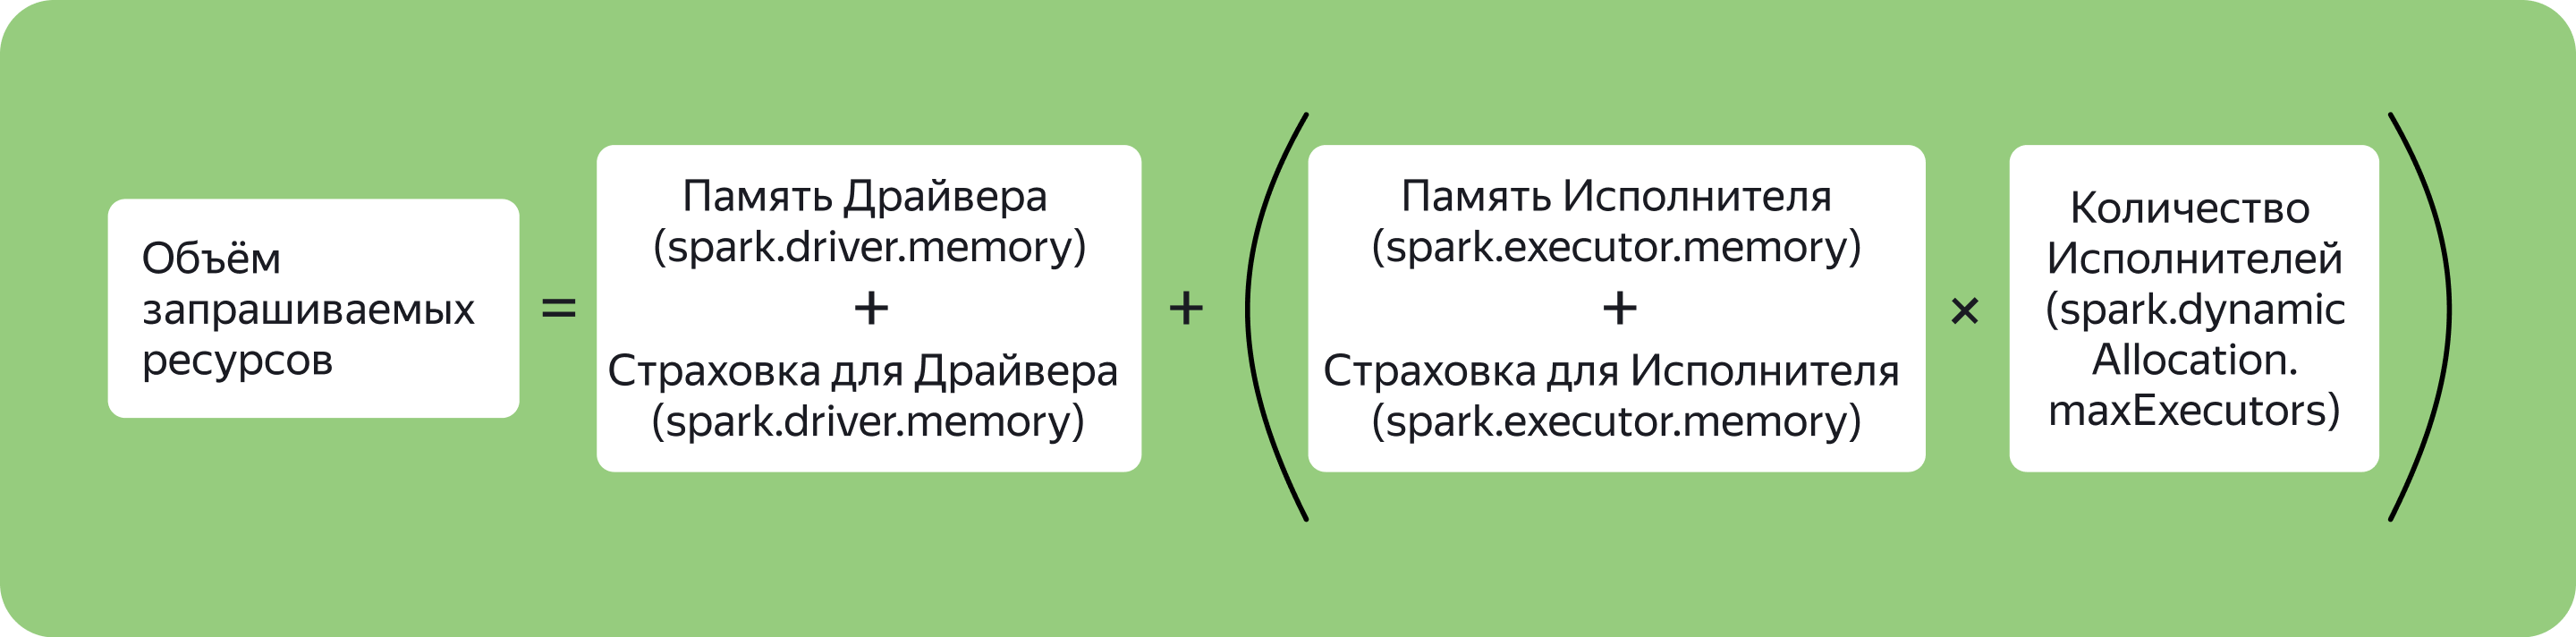

Например, если нужно инициализировать сессию со следующими параметрами:

In [ ]:
{
…
“spark.driver.memory”: “12G”,
“spark.dynamicAllocation.maxExecutors”: 100,
“spark.executor.cores” : 2
“spark.executor.memory”: “2G”,
“spark.executor.memoryOverhead”: ”1G”
…
}

...то общее количество запрашиваемых ресурсов будет равно 312 гигабайт и 200 вычислительных ядер.

**Знакомство со Spark. Практика**

*С помощью какой сущности подключаются к кластеру с Spark?*

Подключиться к кластеру можно с помощью инициализированной Spark-сессии.
Spark-сессия — точка входа в Spark-приложение. Без неё к кластеру не подключиться.

*В чём разница между Spark-сессией и Spark-приложением?*

Spark-сессия — объект подключения к кластеру, который задаёт конфигурацию Spark-приложения. В Spark-приложении выполняются все вычисления.

*Что нужно сделать до создания Spark-приложения?*

Стоит посчитать примерное количество запрашиваемых ресурсов и соотнести со сложностью задачи.
Да, желательно до начала работы оценить состояние на кластере и объём ресурсов, необходимый кластеру для решения задачи. Если задача — посчитать простую аналитику или прочитать таблицу, то не нужно инициализировать Spark-приложение с большим количеством ресурсов. А если задача сложная и непонятно, сколько может потребоваться времени и ресурсов для её решения, то лучше постепенно (по 50–100 за шаг) подбирать количество исполнителей, которые выполняют вычисления.

*Что нужно сделать в конце рабочего дня, когда выполнили все нужные вычисления и записали результаты в базу данных?*

Нужно отключиться от кластера и освободить все используемые ресурсы с помощью команды spark.stop().
Точно! Освобождение ресурсов снижает вероятность того, что кластер будет перегружен запросами. Тогда ваши коллеги смогут делать вычисления и выполнять свои задачи.

Руководитель оценил ваши успехи и передал задание. Вам нужно подключиться к кластеру и инициализировать Spark-сессию со следующими параметрами:

память драйвера: 12 Гбайт;

количество исполнителей: 200;

количество ядер: 2;

память исполнителей: 4 Гбайт;

память для страховки: 1 Гбайт;

количество партиций: 1000.

Получилась такая конфигурация Spark-сессии — можно запускать!

In [ ]:
import os
from pyspark.sql import SparkSession

EXECUTOR_ENV = 'hdfs:///path/to/python/anaconda_2.4.4.tar.gz' # tar.gz file with python for executors
SPARK_ARCHIVE = 'hdfs:///path/to/lib/spark/sparkjars-2.4.4.zip'

os.environ['ARROW_LIBHDFS_DIR'] = '/usr/hdp/2.6.5.0-292/usr/lib'
os.environ['HADOOP_HOME'] = '/usr/hdp/current/hadoop-client/'
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64/'
os.environ['HADOOP_CONF_DIR'] = '/etc/hadoop/conf/'
os.environ['SPARK_HOME'] = '/opt/conda/lib/python3.7/site-packages/pyspark'
os.environ['PYSPARK_PYTHON'] = 'anaconda_2.4.4.tar.gz/bin/python3'


def start_spark(app_name: str,
                driver_memory='12G',
                num_executors: int,
                executor_memory='6G',
                executor_cores=2,
                queue='default',
                additional_params: Dict[str, str] = None):


    spark_driver_host = os.getenv('HOST_IP')

    spark_session = (
        SparkSession
        .builder
        .appName(app_name)
        .master('yarn')
        .config('spark.driver.memory', driver_memory)
        .config('spark.driver.maxResultSize', driver_memory)
        .config('spark.driver.allowMultipleContexts', 'True')
        .config('spark.executor.cores', executor_cores)
        .config('spark.executor.memory', executor_memory)
        .config('spark.executor.memoryOverhead', '1G')
        .config('spark.dynamicAllocation.enabled', 'true')
        .config('spark.dynamicAllocation.maxExecutors', num_executors)
        .config('spark.dynamicAllocation.minExecutors', int(num_executors * 0.2))
        .config('spark.sql.broadcastTimeout', '36000')
        .config('spark.dynamicAllocation.cachedExecutorIdleTimeout', '1200s')
        .config('spark.driver.host', spark_driver_host)
        .config('spark.driver.bindAddress', '0.0.0.0')
        .config('spark.driver.extraLibraryPath', '/usr/hdp/2.6.5.0-292/hadoop/lib/native')
        .config('spark.driver.extraJavaOptions', '-Dhdp.version=current')
        .config('spark.debug.maxToStringFields', '50')
        .config('spark.yarn.queue', queue)
        .config('spark.yarn.dist.archives', EXECUTOR_ENV)
        .config('spark.yarn.archive', SPARK_ARCHIVE)
        .config('spark.yarn.am.extraJavaOptions', '-Dhdp.version=current')
        .config('spark.rpc.message.maxSize', '1024')
        .config('spark.sql.warehouse.dir', '/apps/hive/warehouse')
        .config('spark.sql.execution.pandas.respectSessionTimeZone', 'false')
        .config('spark.sql.orc.filterPushdown', 'true')
        .config('spark.sql.hive.convertMetastoreOrc', 'true')
        .config('spark.shuffle.service.enabled', 'true')
        .config('spark.hadoop.yarn.timeline-service.enabled', 'false')
        .config('spark.hadoop.yarn.client.failover-proxy-provider',
                'org.apache.hadoop.yarn.client.ConfiguredRMFailoverProxyProvider')
        .config('spark.serializer', 'org.apache.spark.serializer.KryoSerializer')
        .config('spark.kryoserializer.buffer.max', '1024m')
        .config('spark.executor.extraLibraryPath', '/usr/hdp/2.6.5.0-292/hadoop/lib/native')
        .config("spark.sql.shuffle.partitions", "1000")
        .config('spark.sql.parquet.writeLegacyFormat', 'true')
        .config("spark.jars", "hdfs:///share/lib/jar/postgresql-42.2.12.jar,hdfs:///share/lib/jar/ojdbc7.jar")
        .config("spark.port.maxRetries", '1000')
        .config("spark.shuffle.io.maxRetries", '1000')
    )

    if additional_params:
        for key, value in additional_params.items():
            spark_session = spark_session.config(key, value)

    spark = (
        spark_session
        .enableHiveSupport()
        .getOrCreate()
    )
    sc = spark.sparkContext

    return sc, spark


# инициализируем сессию, передав параметры функции ниже
sc, spark = \
    start_spark(app_name='test-app')
                      driver_memory='12G',
                      num_executors=200,
                      executor_memory='2G',
                        executor_cores=2,
                        additional_params={'spark.sql.shuffle.partitions', '1000',
                                                                 'spark.executor.memoryOverhead', '1G'}
    )

# spark.stop() # не забудьте отключиться от кластера в конце рабочего дня

*Заключение*

В этом модуле мы показали, как устроен Spark, в каких режимах он может запускаться, что происходит, когда Spark application запущен на кластере с другими проектами.

Вы узнали, что такое Spark-сессия, рассмотрели её параметры. Научились инициализировать её и оценивать количество ресурсов, которое запрашиваете при создании Spark-приложения (англ. Spark application).

Эти знания помогут вам в следующем модуле, где мы научимся работать с объектами RDD в Spark. Движемся дальше!

# **RDD API**

**О чём этот модуль**

В этой теме мы рассмотрим ключевой тип данных Spark — RDD — и работу с ним методами RDD API. Разберём внутренние концепции Spark, например, «ленивые» вычисления и партиционирование.

Чему вы научитесь

Вы научитесь создавать объекты RDD в Spark и трансформировать их с помощью методов RDD API. Также узнаете, какие типы операций есть в Spark, и сможете решить хрестоматийную задачу подсчёта слов на Spark RDD API.

Для комфортного прохождения модуля вам потребуется:

- знать, что такое Spark-сессия и способы её инициализации, уметь выбирать код для верной инициализации;
- знать основные параметры Spark-сессии и их назначение.

**О RDD**

В прошлой теме вы узнали, что на верхнем уровне каждое Spark-приложение состоит из программы драйвера (driver), которая выполняет код пользователя с помощью исполнителей (executors), производящих параллельные операции на кластере.

Основной тип хранения данных в Spark — это RDD (англ. resilient distributed dataset). Если переводить дословно, это отказоустойчивый распределённый набор данных, или, как его ещё называют, «коллекция». RDD представляет собой набор элементов, разделённых по узлам кластера, с которыми можно работать параллельно.

💡 Отказоустойчивость в определении RDD означает, что в случае работы на кластере с распределённой файловой системой HDFS Spark соберёт полную версию источника, на котором будет строиться RDD. Если какой-то блок файла-источника будет «битым», то за счёт реплицирования данных Spark найдёт «работающий» блок файла и сможет собрать полную версию источника.

Создание RDD

RDD в Spark можно создать двумя способами:

Первый — воспользоваться методом `parallelize()` и передать в него структуры данных из Python, например, список.

💡 SparkSession.builder — это способ создания и настройки экземпляра SparkSession, который является основной точкой входа для работы со Spark. В Spark 2.0 и выше SparkSession объединяет функциональность предыдущих объектов SparkContext, SQLContext и HiveContext.

Основные моменты о SparkSession.builder:
Создание SparkSession: Используется для создания нового SparkSession или получения уже существующего. Это делается с помощью метода getOrCreate(), который проверяет, существует ли уже SparkSession, и если нет, создает новый.

Настройки конфигурации: С помощью builder можно задавать различные параметры конфигурации, такие как имя приложения, уровень логирования и параметры кластеризации.

SparkContext — это основной объект, который отвечает за управление подключением к кластеру Spark и взаимодействие с ним. Он является первой точкой входа для работы с RDD (Resilient Distributed Datasets) и другими компонентами Spark. В версиях Spark 2.0 и выше SparkContext был заменён на SparkSession, но SparkContext всё ещё используется и имеет важное значение.

Основные функции SparkContext:
Создание контекста: Он создаёт подключение к кластеру, позволяя приложению взаимодействовать с ресурсами кластера.

Создание RDD: SparkContext используется для создания RDD, которые являются основным способом работы с данными в Spark.

Настройка конфигурации: Позволяет настраивать параметры для вашего приложения, такие как уровень логирования, настройки памяти и другие параметры конфигурации.

Работа с данными: Он предоставляет методы для загрузки данных из различных источников, таких как HDFS, S3, локальные файловые системы и базы данных.

In [ ]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('spark-test').getOrCreate()
rdd = spark.sparkContext.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(rdd)

In [ ]:
ParallelCollectionRDD[6] at parallelize at PythonRDD.scala:195

Или же, что в большинстве случаев более правильно — прочитать файл и создать RDD из него.

Вот так выглядит с точки зрения Spark создание RDD из Python-списка:

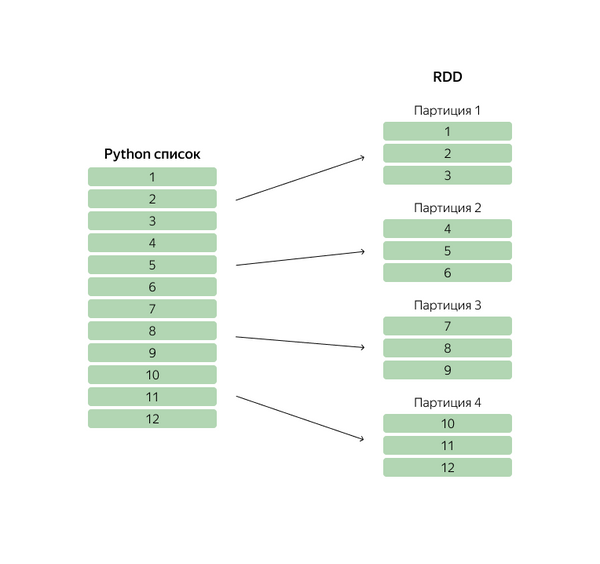

Можно создать пустую коллекцию:

In [ ]:
rdd2 = spark.sparkContext.emptyRDD()
rdd2 = spark.sparkContext.parallelize([])
print(rdd2)

In [ ]:
ParallelCollectionRDD[6] at parallelize at PythonRDD.scala:195

Второй — прочитать из файла. В аналитике и Data Science часто оперируют выборками в csv-файлах, и метод .textFile() тоже может читать csv-файлы:

In [ ]:
rdd3 = spark.sparkContext.textFile('C:/tmp/files/text01.csv')
print(rdd3)

In [ ]:
ParallelCollectionRDD[1] at parallelize at PythonRDD.scala:195

В крупных компаниях данные хранятся в распределённой файловой системе HDFS и табличной абстракции Hive, с которыми вы познакомились в первой теме. У Spark есть методы для чтения таблиц из Hive или путей HDFS:

In [ ]:
hdfs_folder = 'hdfs://<namenode>/home/user/text_data/*'

def read_data(hdfs_folder):
    data = sc.parallelize([])
    data = sc.textFile(hdfs_folder)
    return data

data = read_data(hdfs_folder)

Итак, в этом уроке вы узнали о собственном распределённом типе данных Spark — RDD. Создать RDD можно с помощью метода parallelize(), передав в него Python-типы данных, например, список, или прочитав данные из текстового файла.

**Партиционирование**

Партиции — это части, на которые разбит объект. При создании RDD или чтении из файла в локальной файловой системе, Spark сам решает, на какое количество частей оптимально разбить объект.

Партиционирование играет важную роль при обработке больших объёмов данных — если корректно разбить файл на части, то исполнители (executors) справятся с задачей быстрее.
Посмотреть количество партиций можно с помощью метода `getNumPartitions()`:

In [ ]:
print(rdd.getNumPartitions())

4

Часто методы, функции и другие объекты в языках программирования — это составные слова, то есть объединение нескольких слов вместе без пробелов.

💡 CamelCase (с англ. — «Верблюжий регистр») — это стиль, при котором каждое слово начинается с заглавной буквы, напоминая горбы верблюда.

Частный случай этого стиля — lowerCamelCase, когда с заглавной буквы пишут все слова, кроме первого.

В RDD API Spark методы, которые состоят из нескольких слов, пишутся в lowerCamelCase (например `getNumPartitions()`), а состоящие из одного слова — со строчной буквы (например `coalesce()`).

Из распределённой файловой системы, например, HDFS, Spark читает то количество партиций, на которое разбит файл. При добавлении различных фильтраций финальное количество прочитанных партиций может быть меньше.

По умолчанию Spark сам оптимизирует количество партиций исходя из размера объекта и размера блока. Но вы можете явно указать Spark изменить количество партиций с помощью методов `repartition()` и `coalesce()`.

Метод `repartition()` может увеличить количество партиций RDD:


In [ ]:
rdd = rdd.repartition(10)
print(rdd.getNumPartitions())

MapPartitionsRDD[8] at coalesce at NativeMethodAccessorImpl.java:0

и уменьшить их:

In [ ]:
rdd = rdd.repartition(1)
print(rdd.getNumpartitions())

MapPartitionsRDD[8] at coalesce at NativeMethodAccessorImpl.java:0

Метод `coalesce()` может только уменьшать количество партиций:

In [ ]:
rdd = rdd.coalesce(1)
print(rdd.getNumpartitions())

CoalescedRDD[9] at coalesce at NativeMethodAccessorImpl.java:0

Увеличивают количество партиций обычно, когда хочется ускорить процесс вычислений (чем меньше сама партиция, тем быстрее её обработает исполнитель). А сокращают — когда нужно записать в файл распределённую файловую систему. Тогда количество партиций подбирается так, чтобы каждая партиция файла была максимально близка к размеру блока в системе (по умолчанию размер блока файла в HDFS — 128 мегабайт).

**Преимущества RDD**

Распределённая реализация потребовала создания нового типа данных, чтобы не путать их с устоявшимися типами данных в Python. Для этого разработчики Spark реализовали отказоустойчивую коллекцию элементов, которая распределена по кластеру (RDD).

Какие преимущества у этой реализации относительно знакомых нам Python-типов данных?

- RDD неизменяемы как кортеж в Python: дальнейшие преобразования создают уже новый объект. Это удобно при использовании промежуточных объектов во время вычислений. Например, агрегированную информацию о чеках покупателей в интернет-магазине можно использовать для вычисления базовой аналитики и генерации признаков для моделей машинного обучения.

- RDD может обрабатываться параллельно, так как коллекция разбита на партиции — куски данных в разных локациях в распределённой файловой системе.

- Методы RDD API очень похожи функционально на MapReduce, только более удобны для описания бизнес-логики.

- Вычисления в Spark с помощью RDD и DataFrame API основаны на концепции ленивых вычислений, которая помогает эффективно утилизировать ресурсы и запускать расчёт только после того, как код проверен аналитиком и может выполниться Spark.

О концепции ленивых вычислений мы и поговорим более подробно в следующем уроке.

💡 RDD (англ. resilient distributed dataset) — отказоустойчивый распределённый набор данных, или коллекция. Тип хранения данных, представляющий собой набор элементов, разделённых по узлам кластера, с которыми можно работать параллельно.

💡 API (англ. application programming interface) — программный интерфейс приложения. Это описание способов (набор классов, процедур, функций, структур или констант), которыми одна компьютерная программа может взаимодействовать с другой программой. Например, Spark написан на Scala и имеет API на других языках программирования — Python, R, Java, чтобы можно было взаимодействовать с Spark без привязки к Scala.

💡 RDD API — это набор методов, которые можно применять к RDD, трансформируя его или вызывая вычисления. Вы указываете, что хотите сделать с RDD на Python или R, например, посчитать количество элементов, а RDD API само объясняет Spark на его родном Scala, что нужно сделать с RDD.

💡 Количество партиций ≠ количество исполнителей (executor). Количество партиций подбирается эмпирически, обычно для большинства задач это целое, кратное 100, число от 100 до 1000. Если работаете с небольшими датасетами, то 100–300 партиций должно быть достаточно. Если ваши датасеты достигают сотен гигабайт, то 500–1000 партиций оправданы.

*Что такое RDD?*

- Отдельный тип данных в Spark.
Верно. RDD — это отдельная реализация базовой структуры данных Spark.

- Абстракция, которая разбивает данные на части.
Верно. RDD — это тип хранения данных, который представляет собой набор элементов, разделенных по узлам кластера, с которыми можно работать параллельно.

*Можно ли менять RDD?*

Нет, это неизменяемый тип данных.
Верно. RDD — это неизменяемый тип данных.

*Что такое партиции и зачем они нужны?*

Партиции — это части, на которые разделяются RDD. Они нужны, чтобы распределять нагрузку между исполнителями (executor) и максимально использовать их ресурсы в Spark-приложении.
Верно. Партиции — это куски, на которые разбиты данные в RDD. Они нужны, чтобы оптимизировать и распределить нагрузку по исполнителям.

*Какая разница между coalesce() и repartition()?*

`coalesce()` может только уменьшать количество партиций.
Верно. Метод `coalesce()` работает только на уменьшение количества партиций.

**Концепция ленивых вычислений**

Python — это интерпретируемый язык программирования. При запуске программы интерпретатор проходит по каждой строчке и исполняет программу — поэтому вы привыкли к тому, что при выполнении кода вы получите результат после завершения работы скрипта или ячейки в Jupyter Notebook. А ещё мы привыкли, что результат вычислений помещается в оперативную память, а значит, его можно вывести на экран или записать в файл на локальном компьютере.

Для примера возьмём простое возведение в квадрат чётных чисел. На вход подаём список некоторых чисел.

In [ ]:
arr = [1, 2, 3, 4, 7, 12, 35, 36, 100]
for i in arr:
    print(i)

1
2
3
4
7
12
35
36
100


Далее возводим в квадрат только чётные числа (те, чей остаток от деления на два равен нулю).

In [ ]:
for i in arr:
    if i % 2 == 0:
        print(i**2)

4
16
144
1296
10000


Так как объём данных небольшой, то всё ожидаемо отработает. Но если наша задача — прочитать файл, который весит 100 гигабайт, например, логи передвижения машины с автопилотом за квартал или транзакций покупок в магазинах?

В таких случаях один из подходов — это использование генераторов. При передаче нашего объекта в генератор не происходит никаких вычислений, указатель просто встаёт на первый элемент объекта с данными.

In [ ]:
retrieve = map(lambda x: x**2, arr)
print(retrieve)

💡 Генератор — это объект в Python, который сразу при создании не производит вычисления для всех элементов, переданных ему на вход, а хранит в памяти (1) последний вычисленный элемент, (2) правило перехода к следующему и (3) условие, при котором выполнение прерывается. Переход к следующему элементу и вычисления происходят при выполнении метода next(). Предыдущее значение при этом стирается из памяти.

💡 map() — это функция в Python, которая принимает на вход 2 параметра: функцию, которую нужно применить к каждому объекту структуры данных, и сам объект (например, список), к каждому из элементов которого требуется применить переданную ранее функцию. Это должен быть объект, по которому можно итерироваться (перебирать, проходить итеративно, например, в цикле). map() возвращает генератор. В данном случае это объект особого типа map: он не делает никаких вычислений до тех пор, пока не будет явной инструкции.

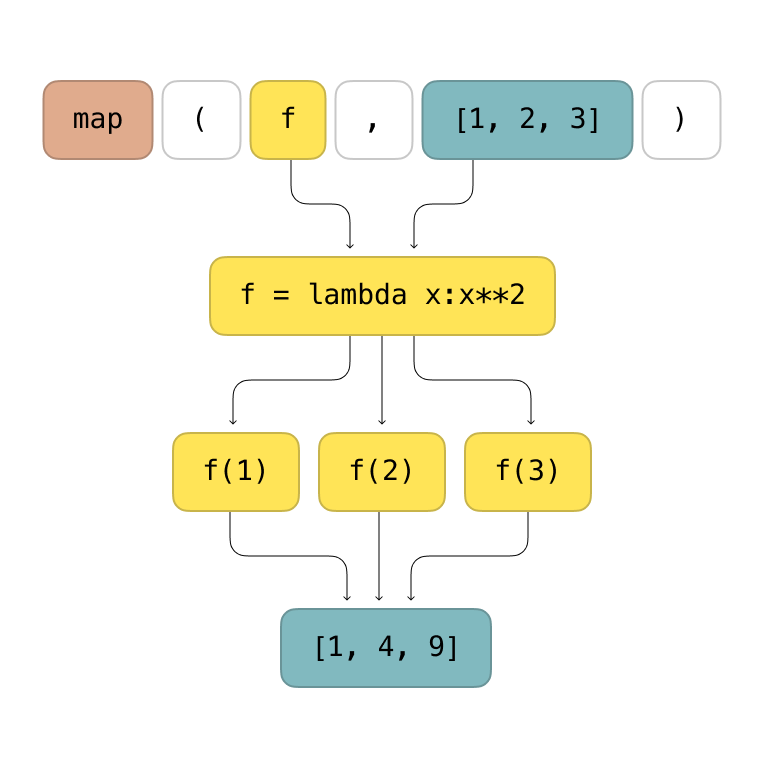

Итеративная обработка осуществляется с помощью функции next(), которая обращается к объекту и «дёргает» функцию вычислений map().

In [ ]:
retrieve = map(lambda x: x**2, arr)
print(retrieve)

In [ ]:
print(next(retrieve))
print(next(retrieve))
print(next(retrieve))

1
4
9


In [ ]:
for i in retrieve:
    print(i)

16
49
144
1225
1296
10000


Такой подход к вычислениям называется ленивым (англ. lazy evaluations): то есть для того, чтобы исполнить код, нужна явная команда, чтобы это сделать.

Вычисления происходят только тогда, когда это требуется.
Такой подход позволяет экономить вычислительные ресурсы, проверять промежуточные результаты на адекватность и запускать весь план расчёта, когда финальная версия кода готова.

Но есть и некоторый подвох при таком подходе. Рассмотрим случай, когда в данных есть ошибка — как работают оба подхода в этом случае?

В случае с «активным» вычислением программа читает данные в оперативную память и выполняет код обработки. Поможет эмулировать это python-механика — list comprehension.

💡 List comprehension — это способ создания новых списков из других итерируемых объектов, таких как кортежи, строки, массивы, списки и т. д. List comprehension состоит из квадратных скобок, содержащих выражение, которое выполняется для каждого элемента вместе с циклом for для итерации по каждому элементу. Это удобный способ записать логику for цикла в одну строку, например, так:

In [ ]:
# python for loop
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
new_list = []
for n in numbers:
    if n%2 == 0:
        new_list.append(n**2)
print(new_list)

# [4, 16, 36, 64]

# python list comprehension
new_list = [n**2 for n in numbers if n%2 == 0]
print(new_list)

# [4, 16, 36, 64]


[4, 16, 36, 64, 100]
[4, 16, 36, 64, 100]


При «активном» вычислении мы получим ошибку сразу.

In [ ]:
arr = [1, 2, 3, 4, 7, 12, 35, 36, '100']

print([i**2 for i in arr if i%2 == 0])


TypeError: not all arguments converted during string formatting

А в случае с ленивым вычислением — получим ошибку только, когда дойдём до этого элемента.

In [ ]:
retrieve = map(lambda x: x**2, arr)
for i in retrieve:
    print(i)

1
4
9
16
49
144
1225
1296


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

В случае с обычным паттерном выполнения код не выполнится и интерпретатор сразу выдаст ошибку. А в случае с ленивым вычислением мы узнаем об ошибке, только когда прочитаем «побитые» данные.

В следующем уроке мы узнаем, какими методами в Spark можно трансформировать объекты, а какими — запускать вычисления.

**Типы операций – трансформации и действия**

В Spark все вычисления — ленивые, а операции делятся на два типа: трансформации и действия.

- Трансформации (англ. transformations) создают новые объекты, но не запускают вычисления.

- Действия (англ. actions) — явная инструкция, чтобы начать процесс расчётов.

*Трансформации*

Трансформации в Spark — это функции, которые создают новые RDD из переданного в функцию распределённого датасета (RDD). Каждый раз, когда вы применяете какую-либо трансформацию, создаётся новый объект, потому что RDD неизменны по природе.

Путь от первой RDD до последней результирующей называют графом зависимостей RDD или логическим планом выполнения (англ. logical execution plan). Визуально логический план выполнения представляет собой ациклический направленный граф (англ. Directed Acyclic Graph, DAG) или просто дерево последовательностей без циклов.

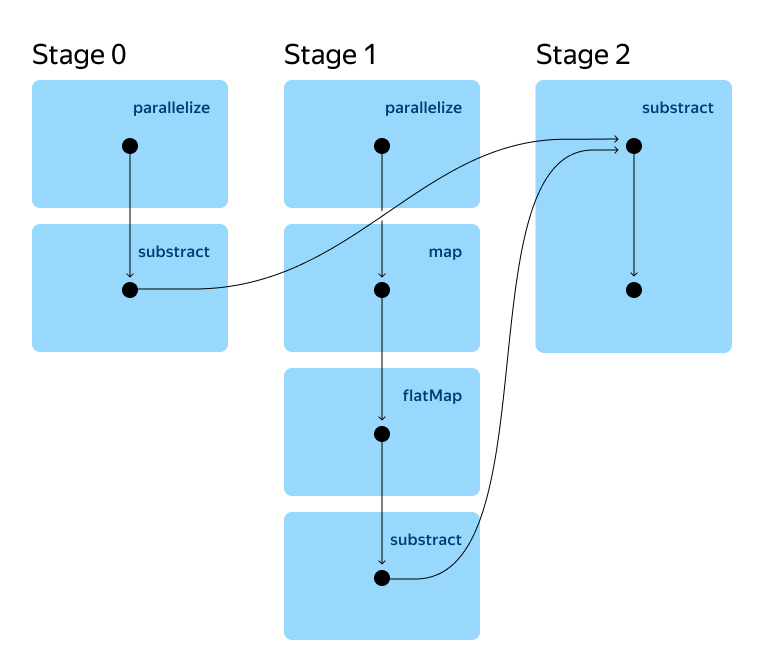

Ниже вы найдёте наиболее часто используемые трансформации в RDD API.

- `map(function)`

  Метод `map()` итерируется по каждому объекту из RDD и применяет функцию, которая была передана.

In [ ]:
rdd = sc.parallelize([1, 2, 3, 4, 5])
rdd2 = rdd.map(lambda x: x+2)
print(rdd2.collect())

[3, 4, 5, 6, 7]

- `flatMap()`

 Этот метод похож на `map()`: оба берут на вход RDD и применяют функцию. Но разница в том, что `map()` возвращает лишь один элемент, а `flatMap()` может вернуть список элементов. Чаще всего `flatMap()` используют, чтобы «распрямить» текст, то есть разбить его на слова, как в примере ниже:

In [ ]:
rdd = sc.textFile("data/titanic_train.csv")
rdd2 = rdd.flatMap(lambda x: x.split(","))
for element in rdd2.collect():
    print(element)


PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked
...

- `filter(function)`

 Фильтрует RDD, применяя к каждому элементу функцию, чтобы проверить его на условие. Если элемент проходит по условию — его добавляют в новую RDD.

In [ ]:
rdd = sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
rdd2 = rdd.filter(lambda x: x%2 == 0)
print(rdd2.collect())

[2, 4, 6, 8, 10]

- `intersection()`

  Ищет пересечение между двумя RDD.

In [ ]:
ds_tools = sc.parallelize(['spark', 'sklearn', 'python'])
de_tools = sc.parallelize(['k8s', 'airflow', 'spark', 'sql'])

intersection = ds_tools.intersection(de_tools)
print(intersection.collect())

['spark']

- `distinct()`

 Метод, аналогичный одноименному оператору в SQL или методу `unique()` в библиотеке pandas. Создаёт новую RDD с уникальными объектами из родительской RDD.

In [ ]:
rdd = sc.parallelize(['spark', 'hadoop', 'hadoop', 'mapreduce', 'hadoop', 'mapreduce', 'spark', 'hadoop', 'hadoop', 'spark'])
rdd2 = rdd.distinct()
print(rdd2.collect())

['hadoop', 'spark', 'mapreduce']

- `union()`

  Создаёт новую RDD из двух других RDD. Ниже дан пример прогноза погоды на несколько дней, в котором есть дата, город, минимальная и максимальная температура за день.


In [ ]:
rdd_moscow = sc.parallelize(
    [
        ["2021-12-01", "moscow", 0, -5],
        ["2022-01-01", "moscow", -4, -13],
        ["2022-01-02", "moscow", -11, -16],
        ["2022-01-03", "moscow", -7, -12],
        ["2022-01-04", "moscow", -3, -8],
        ["2022-01-05", "moscow", -4, -9],
        ["2022-01-06", "moscow", -7, -9],
    ]
)
rdd_spb = sc.parallelize(
    [
        ["2021-12-01", "spb", -2, -10],
        ["2022-01-01", "spb", -9, -12],
        ["2022-01-02", "spb", -8, -11],
        ["2022-01-03", "spb", -3, -9],
        ["2022-01-04", "spb", -3, -7],
        ["2022-01-05", "spb", -6, -10],
        ["2022-01-06", "spb", -3, -11],
    ]
)
rdd_total = rdd_moscow.union(rdd_spb)
print(rdd_total.collect())


[['2021-12-01', 'moscow', 0, -5],
 ['2022-01-01', 'moscow', -4, -13],
 ['2022-01-02', 'moscow', -11, -16],
 ['2022-01-03', 'moscow', -7, -12],
 ['2022-01-04', 'moscow', -3, -8],
 ['2022-01-05', 'moscow', -4, -9],
 ['2022-01-06', 'moscow', -7, -9],
 ['2021-12-01', 'spb', -2, -10],
 ['2022-01-01', 'spb', -9, -12],
 ['2022-01-02', 'spb', -8, -11],
 ['2022-01-03', 'spb', -3, -9],
 ['2022-01-04', 'spb', -3, -7],
 ['2022-01-05', 'spb', -6, -10],
 ['2022-01-06', 'spb', -3, -11]]

- `reduceByKey(func)`

  Метод аналогичен groupby() в pandas. Когда эту трансформацию применяют к RDD, происходит агрегация по ключу нулевого индекса.

In [ ]:
rdd = sc.parallelize(
[
("milk", 1),
("apples", 1),
("beer", 2),
("popcorn", 1),
("marshmellow", 2),
("marshmellow", 1),
("beer", 1),
("cheese", 2),
("eggs", 1),
("popcorn", 2),
]
)
rdd2 = rdd.reduceByKey(lambda x, y: x + y)
print(rdd2.collect())


[('popcorn', 3), ('cheese', 2), ('milk', 1), ('marshmellow', 3), ('apples', 1), ('eggs', 1), ('beer', 3)]

- `groupByKey()`

  Метод похож на `reduceByKey()`, но при агрегировании по ключу вместо суммы он возвращает объект, по которому можно итерироваться. Это делает метод более гибким: можно делать более сложные агрегации, чем сумма, например, собирать списки значений по ключу:

In [ ]:
rdd = sc.parallelize(
    [
        ('milk', 1),
        ('apples', 1),
        ('beer', 2),
        ('popcorn', 1),
        ('marshmellow', 2),
        ('marshmellow', 1),
        ('beer', 1),
        ('cheese', 2),
        ('eggs', 1),
        ('popcorn', 2),
    ]
)

rdd2 = rdd.groupByKey()
rdd3 = rdd2.map(lambda x: (x[0], list(x[1]))).collect()
print(rdd3)

[('popcorn', [1, 2]),
 ('cheese', [2]),
 ('milk', [1]),
 ('marshmellow', [2, 1]),
 ('apples', [1]),
 ('eggs', [1]),
 ('beer', [2, 1])]

- `sortByKey()`

 Аналогичен python-функции `sorted()`, которая возвращает отсортированную структуру данных. Метод `sortByKey()` сортирует RDD по ключу:

In [ ]:
rdd = sc.parallelize(
    [
        ("popcorn", [1, 2]),
        ("cheese", [2]),
        ("milk", [1]),
        ("marshmellow", [2, 1]),
        ("apples", [1]),
        ("eggs", [1]),
        ("beer", [2, 1]),
    ]
)
rdd2 = rdd.sortByKey()
rdd3 = rdd2.collect()
print(rdd3)

[('apples', [1]),
 ('beer', [2, 1]),
 ('cheese', [2]),
 ('eggs', [1]),
 ('marshmellow', [2, 1]),
 ('milk', [1]),
 ('popcorn', [1, 2])]

- `sortBy(function)`

Этот метод более абстрактный, так как принимает на вход функцию и может отсортировать RDD по любому порядковому элементу.

In [ ]:
data = [('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5)]
rdd = sc.parallelize(data)

# сортируем по элементу с индексом 0 (по ключу)
print(rdd.sortBy(lambda x: x[0]).collect())
# [('1', 3), ('2', 5), ('a', 1), ('b', 2), ('с', 4)]

# сортируем по элементу с индексом 1 (по значению)
print(rdd.sortBy(lambda x: x[1]).collect())
# [('a', 1), ('b', 2), ('1', 3), ('с', 4), ('2', 5)]

# сортируем по значению по убыванию
print(rdd.sortBy(lambda x: x[1], ascending=False).collect())
# [('2', 5), ('d', 4), ('1', 3), ('b', 2), ('a', 1)]

- `join()`

  Метод, аналогичный `merge()` или `join()` в pandas. Он cоздаёт новую RDD, соединяя две RDD на основании ключа в нулевом индексе.

In [ ]:
rdd_quantity = sc.parallelize([('apples', 1),
                               ('popcorn', 2),
                               ('marshmellow', 3)])

rdd_prices = sc.parallelize([('apples', 100),
                             ('popcorn', 45),
                             ('marshmellow', 75)])

rdd_total = rdd_quantity.join(rdd_prices).collect()
print(rdd_total)


[('popcorn', (2, 45)),
 ('marshmellow', (3, 75)),
 ('apples', (1, 100))]

 Метод работает как inner join, но при этом в RDD API есть вариации других видов джойнов: `leftOuterJoin()`, `rightOuterJoin()`, `fullOuterJoin()`, `cartesian()`, `coalesce()` и `repartition()`

Методы для изменения количества партиций у RDD. Напомним, что `coalesce()` может только уменьшать количество партиций, а `repartition()` — и уменьшать, и увеличивать.

*Узкие и широкие трансформации*

Операции трансформации бывают двух видов.

- Узкая (англ. narrow)
Все элементы, необходимые дочерней RDD для выполнения операции, находятся в одной родительской партиции RDD. Таким образом, при узкой трансформации не происходит перемешивания (англ. shuffle) данных. Методы` map()`, `flatMap()`, `filter()`, `union()`, `sample()` — это методы узкой трансформации.
- Широкая (англ. wide)
Все элементы, необходимые для вычисления дочерней партиции, находятся во множестве родительских партиций, поэтому требуется перемешивание (shuffle) данных. К методам широкой трансформации относятся: `intersection()`, `distinct()`, `reduceByKey()`, `groupByKey()`, `join()`, `cartesian()`, `coalesce()` и `repartition()`.

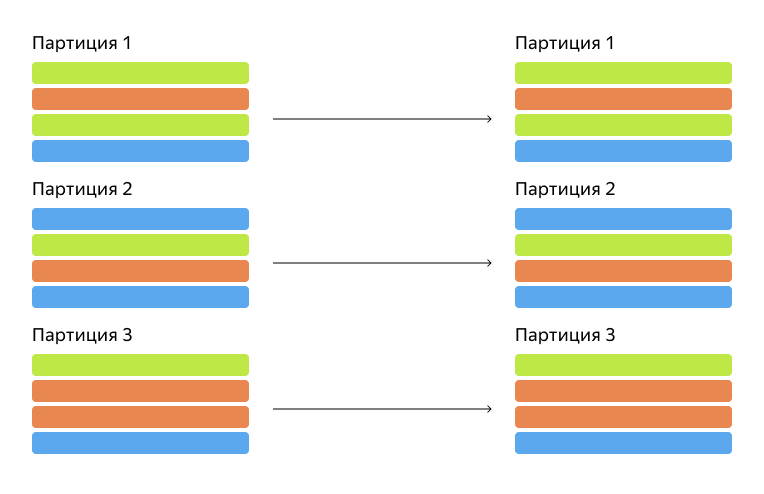

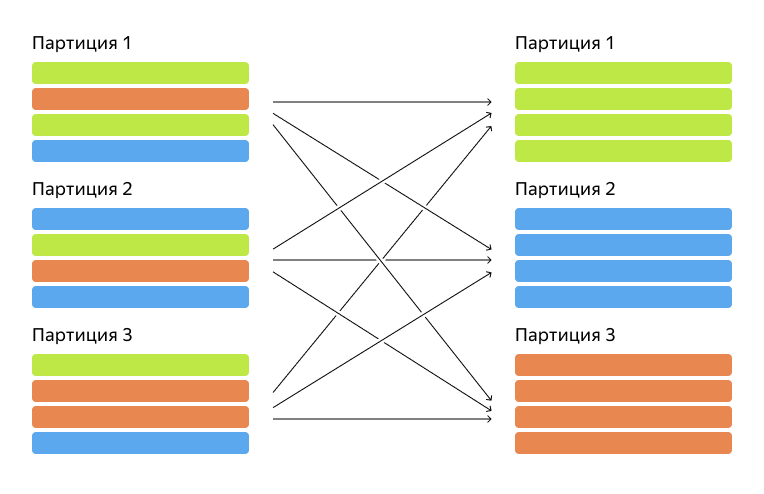

*Действия (actions)*

Заметьте, в задачах этого урока использовался метод `collect()`. Это самое простое действие, которое даёт явную инструкцию собрать RDD из частей в одно целое и вывести на экран.

Ознакомьтесь с другими действиями, которые запускают логический план выполнения:

- `collect()`

 Явно указывает собрать все части RDD.

In [ ]:
rdd = sc.parallelize([1, 2, 3, 4, 5])
rdd2 = rdd.collect()
print(rdd2)

[1, 2, 3, 4, 5]

- `count()`

 Считает количество элементов в дочерней RDD.



In [ ]:
rdd = sc.parallelize([1, 2, 3, 4, 5])
rdd2 = rdd.count()
print(rdd2)

5

- `take(n)`

 Метод, аналогичный head() в pandas, — явная инструкция собрать все части RDD вместе и вывести N элементов. Полезен при итеративной разработке и проверке данных на здравый смысл.

In [ ]:
rdd = sc.parallelize([1, 2, 3, 4, 5])
rdd2 = rdd.take(3)
print(rdd2)

[1, 2, 3]

- `countByValue()`

 Метод похож на reduceByKey(), но применяется, когда RDD состоит только из значений, которые нужно посчитать. Метод аналогичен value_counts()в библиотеке pandas.

In [ ]:
rdd = sc.parallelize([1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3])
rdd2 = rdd.countByValue()
print(sorted(rdd2.items()))

[(1, 8), (2, 9), (3, 1)]

- `countByKey()`

 Это действие аналогично методу reduceByKey(), так как суммирует по ключу. Отличие в том, что reduceByKey() — это трансформация, которая создаёт новую RDD, а countByKey() — это действие, которое запускает выполнение логического плана.

In [ ]:
rdd = sc.parallelize([('one', 1), ('two', 1), ('one', 1)])
rdd2 = rdd.countByKey()
print(sorted(rdd2.items()))

[('one', 2), ('two', 1)]

- reduce(function)

 Метод reduce() — это явная инструкция на совершение агрегации. Он принимает агрегирующую функцию и применяет её ко всей RDD целиком.


In [ ]:
from operator import add
sc.parallelize([1, 2, 3, 4, 5]).reduce(add)
15

В этом уроке вы узнали самые часто используемые действия и методы трансформации, но их в RDD API целое множество. Полный список можно найти в документации.

Далее смотри ноутбук @RDD практика@

**Заключение**

В этом модуле вы узнали, на каких типах данных построены вычисления в Spark, а также познакомились с методами RDD API, которые помогают описывать бизнес-логику близко к стадиям MapReduce.
Из четвёртого урока вы вынесли «ленивую» модель выполнения кода в Spark, а из пятого — специальные команды, которые запускают выполнение плана расчётов. Эти команды называются действиями (actions). Если помните, в Spark есть второй вид операций — трансформации (transformations), которые после применения к RDD создают новую, дочернюю RDD.
Вы также познакомились с механизмом партиционирования и научились увеличивать и уменьшать количество партиций — частей, которые могут параллельно обрабатываться исполнителями (executors), ускоряя вычисления.
Вы отлично потрудились в этом модуле, и значит — время двигаться вперёд. В завершающем модуле курса вы познакомитесь со вторым API в Spark — DataFrame API и поймёте, почему его используют чаще, чем RDD API.
Желаем успехов в изучении нового!

# **DataFrame API**

**О чём этот модуль**

В этом модуле мы разберём ещё один API в Spark — DataFrame API. Вы узнаете, зачем в Spark появилось второе API и почему его используют чаще, чем RDD API. Познакомитесь с особенностями типа данных DataFrame и узнаете, чем он отличается от типа RDD, а чем они похожи.

Чему вы научитесь
Вы научитесь писать трансформации данных, используя и базовые методы DataFrame API, и более продвинутые — например, оконные функции. Оконные функции часто используют в Data Science: они помогают генерировать более сложные признаки для моделей машинного обучения.
В конце модуля вы узнаете, чем отличаются механизмы партиционирования в DataFrame и RDD, познакомитесь с новыми методами записи результатов и распределёнными форматами файлов.
Для комфортного прохождения модуля вам потребуется:

- знать, что такое Spark-сессия и способы её инициализации, уметь выбирать код для верной инициализации;
- знать основные параметры Spark-сессии и их назначение;
- уметь работать с пакетом pandas, создавать объекты DataFrame/Series;
- знать, что такое RDD;
- знать, что такое трансформации и действия в RDD;
- знать, что такое концепция ленивых вычислений.

**О DataFrame API**

В прошлой теме вы познакомились с RDD API, который позволяет Spark обрабатывать данные в распределённой манере и тем самым производить вычисления на больших объёмах данных. У RDD API есть несколько ограничений, а именно:

- У RDD API нет механизмов оптимизации процесса вычислений. Ответственность за оптимальность выполнения кода лежит на программисте. Код, написанный неоптимально, будет выполняться долго.
- Структура кода в RDD API напоминает MapReduce и будет непонятна пользователям, которые не взаимодействовали со Spark. Некоторые операции довольно технические, например методы map() и reduceByKey(). Эти операции не отражают бизнес-логику трансформации данных.
- RDD API хорошо работает со слабоструктурированными данными, например с текстами, но со структурированными данными, как таблицы, работать не умеет. В этом заключается главный недостаток RDD API, ведь компании чаще всего собирают данные в виде таблиц.

В 2015 году появилась новая абстракция, которая помогла справиться с ограничениями RDD, — DataFrame. DataFrame — это распределённая коллекция данных, организованная в табличном виде и напоминающая таблицы в реляционной базе данных. Другими словами, тип данных DataFrame — распределённый аналог типа Dataframe из библиотеки pandas.


💡 DataFrame — тип данных в Spark. Этот тип данных используется для распределённой реализации табличной структуры данных.

Dataframe — тип данных в pandas. Этот тип данных используется для реализации табличной структуры данных в качестве единого объекта.

DataFrame в Spark и Dataframe в pandas — разные типы данных. Не путайте их.

От RDD DataFrame унаследовал много полезных функций, например:

- Процесс вычисления конечного DataFrame происходит прямо в оперативной памяти.
- Как и RDD, DataFrame обрабатывается в распределённой манере за счёт механизма партиционирования.
- Вычисления в DataFrame API тоже основаны на концепции ленивых вычислений, а методы также делятся на трансформации и действия.
- DataFrame как структура данных основана на RDD, наследуя возможность параллельного хранения и обработки данных.

Из уникальных особенностей DataFrame можно отметить следующие:

- DataFrame API обладает богатым набором методов, как и RDD API. Отличие DataFrame API — в глубокой интеграции с модулем Spark SQL. Это означает, что трансформации данных можно описывать методами самого API или на SQL.
- В DataFrame API появился оптимизатор вычислений Catalyst, который помогает ускорить вычисления за счёт внутренних оптимизаций. Стало возможным следить за тем, как вычисления будут оптимизированы. Это бывает полезно при разборе работы кода.
- За счёт ленивых вычислений у DataFrame практически нет ограничений по размеру: от нескольких килобайт до петабайт (1 петабайт = 1 миллион гигабайт).
- DataFrame поддерживает разные форматы данных в качестве источников, например уже знакомые csv и excel , а также распределённые форматы: avro, parquet, orc. Ещё поддерживается возможность чтения из распределённых файловых систем, например HDFS, из модуля табличной абстракции HIVE и реляционных баз данных, например PostgreSQL.

Благодаря DataFrame API улучшилось взаимодействие программистов со Spark. Теперь Spark отвечает за оптимизацию кода и следит за тем, чтобы он выполнялся быстрее и с использованием достаточного количества ресурсов.

Для обработки больших данных DataFrame API является фактически главным инструментом. Его методы похожи на привычную для аналитиков библиотеку pandas за счёт оптимизации и большого количества функций.

Что общего у RDD API и DataFrame API? Выберите все правильные варианты.

Правильный ответ
Вычисления происходят в оперативной памяти Spark-приложения.
RDD API и DataFrame API — модули Spark, а Spark производит вычисления в оперативной памяти.

Правильный ответ
DataFrame API унаследовал некоторые методы RDD API.
У RDD API и DataFrame API есть несколько общих методов, например collect(), repartition(), coalesce() и не только.

Неправильный ответ
Процессы оптимизации запроса одинаковы как в RDD API, так и в DataFrame API.
В RDD API нет оптимизации вычислений, и это стало причиной появления DataFrame API.

Правильный ответ
Методы RDD API и DataFrame API делятся на трансформации и действия и работают согласно концепции ленивых вычислений.
В RDD API и в DataFrame API один подход к вычислениям — ленивый.

Выберите два главных преимущества DataFrame API.

Правильный ответ
Появился оптимизатор вычислений Catalyst, который помогает ускорить вычисления за счёт внутренних оптимизаций.
О том, как Catalyst оптимизирует процесс вычислений, мы расскажем далее.

Не правильный ответ
Благодаря оптимизациям в DataFrame API больше не нужен механизм партиционирования.
DataFrame API часто работает оптимальнее RDD API, но механизм партиционирования — неотъемлемая механика распределённых систем, которая помогает распределить нагрузку между серверными компьютерами.

Не правильный ответ
Из DataFrame API убрали концепцию ленивых вычислений. Синтаксис Spark стал максимально похож на синтаксис Python.
В RDD API и в DataFrame API один подход к вычислениям — ленивый.

Правильный ответ
DataFrame API позволил работать со структурированными данными, например с таблицами.
В бизнесе чаще используют структурированные данные, поэтому основное преимущество DataFrame API — работа с таблицами.

**Методы трансформаций и действий в DataFrame API**

Напомним, что вычисления в Spark — ленивые, то есть для их выполнения нужна явная команда. Как и в случае с RDD API, операции в DataFrame API делятся на два типа:

- Трансформации (англ. transformations) создают объекты DataFrame из источника, но не запускают вычисления.
- Действия (англ. actions) — явная инструкция, чтобы начать процесс вычислений финальной таблицы.

*Создание датафрейма в Spark*

Создать DataFrame, как и RDD, можно двумя способами: прочитать из источника (файла или базы данных) или создать методом `createDataFrame()`.

При создании или чтении DataFrame Spark может сам подобрать типы данных для каждого столбца. Для этого нужно передать названия колонок аргументу `schema` метода `createDataFrame()`, и Spark подберёт тип данных, проанализировав значения в столбцах.

Покажем, как создать DataFrame из истории покупок еды в приложении. Чтобы вывести схему таблицы — имена колонок с типами данных, используют метод `printSchema()`.

In [ ]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
                    .master("local") \
                    .appName("Learning DataFrames") \
                    .getOrCreate()

data = [('2021-01-04', 3744, 63, 322),
        ('2021-01-04', 2434, 21, 382),
        ('2021-01-04', 2434, 32, 159),
        ('2021-01-04', 3744, 32, 159),
        ('2021-01-04', 4342, 32, 159),
        ('2021-01-04', 4342, 12, 259),
        ('2021-01-04', 5677, 12, 259),
        ('2021-01-04', 5677, 23, 499)
]

columns = ['dt', 'user_id', 'product_id', 'purchase_amount']
df = spark.createDataFrame(data=data, schema=columns)
df.printSchema()

root
 |-- dt: string (nullable = true)
 |-- user_id: long (nullable = true)
 |-- product_id: long (nullable = true)
 |-- purchase_amount: long (nullable = true)



Параметр `nullable` в типе данных колонки показывает, содержит ли этот столбец пропущенные значения, или `null`.

По умолчанию Spark указывает, что поле может содержать `null`, но этим можно управлять, задав схему явно.

Покажем, как задать схему, на примере — используем датасет с данными о жилье в Калифорнии в 1990 году.

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder \
                    .master("local") \
                    .appName("Learning DataFrames") \
                    .getOrCreate()

schema = StructType([
    StructField("longitude", FloatType(), nullable=True),
    StructField("latitude", FloatType(), nullable=True),
    StructField("median_age", FloatType(), nullable=True),
    StructField("total_rooms", FloatType(), nullable=True),
    StructField("total_bdrms", FloatType(), nullable=True),
    StructField("population", FloatType(), nullable=True),
    StructField("households", FloatType(), nullable=True),
    StructField("median_income", FloatType(), nullable=True),
    StructField("median_house_value", FloatType(), nullable=True)]
)

data = spark.read.csv('datasets/cal_housing_data.csv', schema=schema)
data.printSchema()

root
 |-- longitude: float (nullable = true)
 |-- latitude: float (nullable = true)
 |-- median_age: float (nullable = true)
 |-- total_rooms: float (nullable = true)
 |-- total_bdrms: float (nullable = true)
 |-- population: float (nullable = true)
 |-- households: float (nullable = true)
 |-- median_income: float (nullable = true)
 |-- median_house_value: float (nullable = true)

DataFrame в Spark можно создать из датафрейма в pandas, передав его методу `createDataFrame()`:

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession

data = [['Max', 55], ['Yan', 53], ['Dmitry', 54], ['Ann', 25]]

pandas_df = pd.DataFrame(data, columns = ['Name', 'Age'])

print(pandas_df)

     Name  Age
0     Max   55
1     Yan   53
2  Dmitry   54
3     Ann   25


In [ ]:
spark = SparkSession.builder \
                    .master("local") \
                    .appName("Learning DataFrames") \
                    .getOrCreate()

sparkDF = spark.createDataFrame(pandas_df)
sparkDF.printSchema()
sparkDF.show()

root
 |-- Name: string (nullable = true)
 |-- Age: long (nullable = true)

+------+---+
|  Name|Age|
+------+---+
|   Max| 55|
|   Yan| 53|
|Dmitry| 54|
|   Ann| 25|
+------+---+



Spark — отдельный фреймворк, поэтому в нём реализованы собственные типы данных, аналогичные по конфигурации типам данных в Python. Их описание можно найти в официальной документации Spark.

По умолчанию Spark хорошо распознаёт типы данных, и это позволяет не уделять их настройке большого внимания. Оптимизация типов данных играет важную роль при работе с таблицами размером в десятки терабайт. В этом случае замена столбцов с `LongType()` на `IntegerType()` поможет сэкономить сотни гигабайт памяти.

Альтернативный способ создать DataFrame — использовать более абстрактный метод чтения источника `spark.read.load()`. Метод обладает богатым функционалом, как и метод `read_csv()` из библиотеки pandas.

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder \
                    .master("local") \
                    .appName("Learning DataFrames") \
                    .getOrCreate()

cases = spark.read.load('datasets/covid19_dataset/cases.csv', format="csv", sep=",", inferSchema=True, header="true")
cases.printSchema()

root
 |-- case_id: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- group: boolean (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)

Прочитанный DataFrame содержит данные о начале эпидемии коронавируса в Южной Корее. На его примере покажем, как применять методы DataFrame API.

*Действия*

Напомним, что действия — это операции, которые запускают процесс вычислений плана трансформаций. Ниже представлены самые используемые действия:

- `show(n)`

 Как и метод `head()` в pandas, `show()` выводит нужное количество строк в виде таблицы. Количество строк указывают в аргументе.

In [ ]:
cases.show(5)

+-------+--------+-------------+-----+--------------------+---------+---------+----------+
|case_id|province|         city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|   Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|      Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|      Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul| Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+
only showing top 5 rows

- `take(n)`

  Метод, который запускает вычисление всех трансформаций с DataFrame и возвращает n-ое количество строк.

In [ ]:
cases.take(5)

[Row(case_id=1000001, province='Seoul', city='Yongsan-gu', group=True, infection_case='Itaewon Clubs', confirmed=72, latitude='37.538621', longitude='126.992652'),
 Row(case_id=1000002, province='Seoul', city='Guro-gu', group=True, infection_case='Guro-gu Call Center', confirmed=98, latitude='37.508163', longitude='126.884387'),
 Row(case_id=1000003, province='Seoul', city='Dongdaemun-gu', group=True, infection_case='Dongan Church', confirmed=20, latitude='37.592888', longitude='127.056766'),
 Row(case_id=1000004, province='Seoul', city='Guro-gu', group=True, infection_case='Manmin Central Church', confirmed=41, latitude='37.481059', longitude='126.894343'),
 Row(case_id=1000005, province='Seoul', city='Eunpyeong-gu', group=True, infection_case="Eunpyeong St. Mary's Hospital", confirmed=14, latitude='37.63369', longitude='126.9165')]


- `toPandas()`

  Метод `toPandas()` позволяет перевести DataFrame из Spark в pandas. Метод запускает вычисление всего плана трансформаций и собирает результат в одну таблицу на драйвере. В результате создаётся датафрейм в pandas.

In [ ]:
cases_df = cases.toPandas()
cases_df.head()

    case_id	  province	    city	        group	infection_case	                confirmed	  latitude	longitude
0	  1000001	  Seoul	        Yongsan-gu	  True	Itaewon Clubs	                  72	        37.538621	126.992652
1	  1000002	  Seoul	        Guro_gu	      True	Guro-gu Call Center	            98	        37.508163	126.884387
2	  1000003	  Seoul	        Dongdaemun-gu	True	Dongan Church	                  20	        37.592888	127.056766
3	  1000004	  Seoul	        Guro-gu	      True	Manmin Central Church	          41	        37.481059	126.894343
4	  1000005	  Seoul	        Eunpyeong-gu	True	Eunpyeong St. Mary’s Hospital	  14	        37.63369	126.9165

 Обратите внимание, что пользоваться методом `toPandas()` нужно осторожно. Он запускает вычисление всего плана трансформаций, и если попробовать вычислить результат, который весит больше, чем позволяют настройки Spark-сессии spark.`driver.maxResultSize` и `spark.driver.memory`, то Spark-приложение завершится по причине нехватки памяти. Так можно потерять результаты предыдущих расчётов, которые хранятся в оперативной памяти.

- `collect()`

  Этот метод, унаследованный от RDD API, запускает вычисление всего плана трансформаций и собирает результат в одну таблицу на драйвере. В результате создаётся Python-список с объектами типа Row — внутренним типом данных Spark, который хранит значения строк.

In [ ]:
cases.collect()

[Row(case_id=1000001, province='Seoul', city='Yongsan-gu', group=True, infection_case='Itaewon Clubs', confirmed=72, latitude='37.538621', longitude='126.992652'),
Row(case_id=1000002, province='Seoul', city='Guro-gu', group=True, infection_case='Guro-gu Call Center', confirmed=98, latitude='37.508163', longitude='126.884387'),
Row(case_id=1000003, province='Seoul', city='Dongdaemun-gu', group=True, infection_case='Dongan Church', confirmed=20, latitude='37.592888', longitude='127.056766'),
Row(case_id=1000004, province='Seoul', city='Guro-gu', group=True, infection_case='Manmin Central Church', confirmed=41, latitude='37.481059', longitude='126.894343'),
Row(case_id=1000005, province='Seoul', city='Eunpyeong-gu', group=True, infection_case="Eunpyeong St. Mary's Hospital", confirmed=14, latitude='37.63369', longitude='126.9165'),
Row(case_id=1000006, province='Seoul', city='Seongdong-gu', group=True, infection_case='Seongdong-gu APT', confirmed=13, latitude='37.55713', longitude='127.0403')
...

- `count()`

  Этот метод, унаследованный от RDD API, запускает вычисление всего плана трансформаций и считает количество строк в таблице на драйвере.

In [ ]:
cases.count()

115

*Трансформации*

Напомним, что трансформации — это операции, которые изменяют таблицу-источник, но не запускают процесс вычислений. После применения трансформации операция появится в планах запроса. Подробнее о планах запроса вы узнаете в пятом уроке темы.

Многие методы трансформации DataFrame аналогичны операторам в SQL, но с некоторыми из них вы познакомитесь впервые. Ниже перечислены самые используемые методы трансформации:

- `select()`

  Базовый метод трансформации, аналогичный оператору SELECT в SQL. Метод позволяет выбирать определённые колонки из DataFrame. Чаще всего в аргументе перечисляют названия нужных колонок, но иногда их передают списком.

In [ ]:
cases = cases.select('case_id', 'latitude', 'longitude')
print(cases)

DataFrame[case_id: int, latitude: string, longitude: string]

- `distinct()`

  Базовый метод трансформации, аналогичный оператору DISTINCT в SQL. Метод позволяет найти уникальные значения в колонке. Чтобы получить уникальные значения, нужно добавить операцию действия `collect()` или `toPandas()`. Выбор зависит от того, в каком инструменте вы будете работать — в Spark или pandas.

In [ ]:
casesDist = cases.select('province').distinct()
print(casesDist.collect())

[Row(province='Sejong'),
Row(province='Ulsan'),
Row(province='Chungcheongbuk-do'),
Row(province='Gangwon-do'),
Row(province='Gwangju'),
Row(province='Gyeongsangbuk-do'),
Row(province='Daegu'),
Row(province='Gyeongsangnam-do'),
Row(province='Incheon'),
Row(province='Jeju-do'),
Row(province='Gyeonggi-do'),
Row(province='Busan'),
Row(province='Daejeon'),
Row(province='Seoul'),
Row(province='Chungcheongnam-do'),
Row(province='Jeollabuk-do'),
Row(province='Jeollanam-do')]

cases.select('province').distinct().toPandas()

	  province
0	  Sejong
1	  Ulsan
2	  Chungcheongbuk-do
3	  Gangwon-do
4	  Gwangju
5	  Gyeongsangbuk-do
6	  Daegu
7	  Gyeongsangnam-do
8	  Incheon
9	  Jeju-do
10	Gyeonggi-do
11	Busan
12	Daejeon
13	Seoul
14	Chungcheongnam-do
15	Jeollabuk-do
16	Jeollanam-do

- `withColumn()`

  Метод, который создаёт новую колонку. В таблице-примере появится новый столбец confirmedNew.

In [ ]:
casesNew = cases.withColumn('confirmedNew', F.col('confirmed') + 99)
casesNew.show(5)

+-------+--------+-------------+-----+--------------------+---------+---------+----------+------------+
|case_id|province|         city|group|      infection_case|confirmed| latitude| longitude|confirmedNew|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+------------+
|1000001|   Seoul|   Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|         171|
|1000002|   Seoul|      Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|         197|
|1000003|   Seoul|Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|         119|
|1000004|   Seoul|      Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|         140|
|1000005|   Seoul| Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|         113|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+------------+
only showing top 5 rows

Для более продвинутых трансформаций с колонками в Spark SQL есть отдельный модуль — Spark Functions. В нём реализовано много математических, строковых, логических и статистических функций для разных задач. Например, специалисту по Data Science часто приходится создавать отдельную колонку со статистикой. Покажем, как создать колонку с предсказанием константной модели, которая всегда предсказывает 1. Используем функцию `lit()` из модуля Spark Functions, которая создаёт столбец с фиксированным значением.

In [ ]:
casesPred = cases.withColumn('prediction', F.lit(1))
casesPred.show(5)

+-------+--------+-------------+-----+--------------------+---------+---------+----------+----------+
|case_id|province|         city|group|      infection_case|confirmed| latitude| longitude|prediction|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+----------+
|1000001|   Seoul|   Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|         1|
|1000002|   Seoul|      Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|         1|
|1000003|   Seoul|Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|         1|
|1000004|   Seoul|      Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|         1|
|1000005|   Seoul| Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|         1|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+----------+
only showing top 5 rows

- `withColumnRenamed()`

  Метод, который используют для переименования колонки. Новое имя указывают вторым в аргументе.

In [ ]:
cases = cases.withColumnRenamed('infection_case', 'infection_source')
print(cases)

DataFrame[case_id: int, province: string, city: string, group: boolean,
infection_source: string, confirmed: int, latitude: string,
longitude: string]

- `toDF()`

  Метод, который возвращает новый объект типа DataFrame. Его часто используют в случаях, когда нужно переименовать несколько колонок сразу. Метод `withColumnRenamed()` может переименовывать только одну колонку за вызов, и это бывает неудобно. Метод `toDF()` принимает на вход названия колонок и создаёт новую таблицу с новыми названиями. На вход нужно подать полный список с названиями колонок — в том же порядке, как и в таблице-источнике.

In [ ]:
cases = cases.toDF(*['case_id', 'province', 'city', 'group',
'infection_case', 'confirmed', 'latitude', 'longitude'])
print(cases)

DataFrame[case_id: int, province: string, city: string, group: boolean,
infection_case: string, confirmed: int, latitude: string,
longitude: string]

- cast()

  Метод аналогичен оператору CAST в SQL, который меняет тип данных в выбранной колонке на указанный.

  Изначальная таблица выглядела так:

In [ ]:
root
|-- case_id: integer (nullable = true)
|-- province: string (nullable = true)
|-- city: string (nullable = true)
|-- group: boolean (nullable = true)
|-- infection_case: string (nullable = true)
|-- confirmed: integer (nullable = true)
|-- latitude: string (nullable = true)
|-- longitude: string (nullable = true)

+-------+--------+-------------+-----+--------------------+---------+---------+----------+
|case_id|province|         city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|   Yongsan-gu| true|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|      Guro-gu| true| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|Dongdaemun-gu| true|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|      Guro-gu| true|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul| Eunpyeong-gu| true|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+
only showing top 5 rows

 Сравните с таблицей, которая получилась после применения метода cast(): тип данных выбранных колонок изменился.

In [ ]:
from pyspark.sql.types import DoubleType, IntegerType, StringType

cases = cases.withColumn('group', F.col('group').cast(IntegerType()))
cases = cases.withColumn('latitude', F.col('latitude').cast(DoubleType()))
cases = cases.withColumn('longitude', F.col('longitude').cast(DoubleType()))
cases.printSchema()
cases.show(5)

root
|-- case_id: integer (nullable = true)
|-- province: string (nullable = true)
|-- city: string (nullable = true)
|-- group: integer (nullable = true)
|-- infection_case: string (nullable = true)
|-- confirmed: integer (nullable = true)
|-- latitude: double (nullable = true)
|-- longitude: double (nullable = true)

+-------+--------+-------------+-----+--------------------+---------+---------+----------+
|case_id|province|         city|group|      infection_case|confirmed| latitude| longitude|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+
|1000001|   Seoul|   Yongsan-gu|    1|       Itaewon Clubs|       72|37.538621|126.992652|
|1000002|   Seoul|      Guro-gu|    1| Guro-gu Call Center|       98|37.508163|126.884387|
|1000003|   Seoul|Dongdaemun-gu|    1|       Dongan Church|       20|37.592888|127.056766|
|1000004|   Seoul|      Guro-gu|    1|Manmin Central Ch...|       41|37.481059|126.894343|
|1000005|   Seoul| Eunpyeong-gu|    1|Eunpyeong St. Mar...|       14| 37.63369|  126.9165|
+-------+--------+-------------+-----+--------------------+---------+---------+----------+
only showing top 5 rows

- `filter()`

  Метод, который отбирает данные по условию. Его сочетают вместе с функцией `col()` из модуля Spark Functions:

In [ ]:
cases.count()

115


cases.filter(F.col('province') == 'Seoul').count()

12

Чтобы выбрать данные, не соответствующие условию, можно использовать привычный синтаксис pandas:

In [ ]:
cases.count()

115

ases.filter(F.col('province') != 'Seoul').count()

103

cases.filter(~(F.col('province') == 'Seoul')).count()

103

Фильтровать можно по нескольким условиям сразу:

In [ ]:
cases.filter((cases.province  == 'Seoul') & (cases.city  == 'Guro-gu')).toPandas()

	case_id	province	city	group	infection_case	confirmed	latitude	longitude
1	1000002	Seoul	Guro_gu	1	Guro-gu Call Center	98	37.508163	126.884387
3	1000004	Seoul	Guro-gu	1	Manmin Central Church	41	37.481059	126.894343

 Также фильтровать можно по списку значений:

In [ ]:
lst = ['Seoul','Busan', 'Daegu']

cases.filter(cases.province.isin(lst)).count()

30

  В DataFrame API также можно использовать дополнительные методы фильтрации по условию, аналогичные функциям в pandas и SQL, например `like()`, `rlike()`, `startswith()`, `endswith()` и `contains()`. Подробнее о них можно прочитать в документации методов DataFrame API.

- `orderBy()`

  Метод, аналогичный оператору ORDER BY в SQL. Метод сортирует таблицу по указанному полю. По умолчанию метод сортирует строки по возрастанию.

In [ ]:
casesSorted = cases.orderBy('confirmed').toPandas()
casesSorted.head()

province	      city	case_id	group	infection_case	confirmed	latitude	longitude	elementary_school_count	kindergarten_count
0	Gwangju	        -	1300004	0	etc	0	NaN	NaN	NaN	NaN
1	Gangwon-do	    -	3000005	0	contact with patient	0	NaN	NaN	NaN	NaN
2	Jeju-do	        -	7000002	0	contact with patient	0	NaN	NaN	NaN	NaN
3	Busan	          from other city	1100006	1	Cheongdo Daenam Hospital	1	NaN	NaN	NaN	NaN
4	Gwangju	        -	1300003	0	contact with patient	1	NaN	NaN	NaN	NaN

Передав аргумент `ascending=False`, можно отсортировать данные по убыванию:

In [ ]:
casesSorted = cases.orderBy('confirmed', ascending=False).toPandas()
casesSorted.head()

	province	city	case_id	group	infection_case	confirmed	latitude	longitude	code	latitude	longitude	elementary_school_count
0	Daegu	Namgu	1200001	1	Shincheonji Church	4510	35.84008	128.5667	12010.0	35.8463	128.597723	11.0
1	Daegu	-	1200008	0	contact with patient	929	NaN	NaN	NaN	NaN	NaN	NaN
2	Daegu	-	1200009	0	etc	724	NaN	NaN	NaN	NaN	NaN	NaN
3	Gyeongsangbuk-do	from other city	6000001	1	Shincheonji Church	566	NaN	NaN	NaN	NaN	NaN	NaN
4	Seoul	-	1000010	0	overseas inflow	321	NaN	NaN	NaN	NaN	NaN	NaN

Также можно использовать функции `asc()` и `desc()` из модуля Spark Functions:

In [ ]:
casesSorted = cases.orderBy(F.desc('confirmed')).toPandas()
casesSorted.head()

	province	city	case_id	group	infection_case	confirmed	latitude	longitude	code	latitude	longitude	elementary_school_count
0	Daegu	Namgu	1200001	1	Shincheonji Church	4510	35.84008	128.5667	12010.0	35.8463	128.597723	11.0
1	Daegu	-	1200008	0	contact with patient	929	NaN	NaN	NaN	NaN	NaN	NaN
2	Daegu	-	1200009	0	etc	724	NaN	NaN	NaN	NaN	NaN	NaN
3	Gyeongsangbuk-do	from other city	6000001	1	Shincheonji Church	566	NaN	NaN	NaN	NaN	NaN	NaN
4	Seoul	-	1000010	0	overseas inflow	321	NaN	NaN	NaN	NaN	NaN	NaN

- `groupBy()`
  Метод, аналогичный `groupby()` в pandas или оператору GROUP BY в SQL. Метод группирует таблицу по колонке или набору колонок.
  Как и в pandas, метод для группировки можно сочетать со встроенными агрегирующими функциями:

In [ ]:
cases.groupBy('province').sum('confirmed').toPandas()

	province	sum(confirmed)
0	Sejong	46
1	Ulsan	42
2	Chungcheongbuk-do	38
3	Gangwon-do	51
4	Gwangju	30
5	Gyeongsangbuk-do	1314
6	Daegu	6650
7	Gyeongsangnam-do	115
8	Incheon	79
9	Jeju-do	14
10	Gyeonggi-do	564
11	Busan	139
12	Daejeon	34
13	Seoul	646
14	Chungcheongnam-do	137
15	Jeollabuk-do	15
16	Jeollanam-do	16

Также можно пользоваться агрегирующими функциями из модуля Spark Functions:

In [ ]:
cases.groupBy('province').agg(F.count('confirmed'),
                                F.sum('confirmed'),
                                F.avg('confirmed')).toPandas()


	province	count(confirmed)	sum(confirmed)	avg(confirmed)
0	Sejong	6	46	7.666667
1	Ulsan	4	42	10.500000
2	Chungcheongbuk-do	5	38	7.600000
3	Gangwon-do	6	51	8.500000
4	Gwangju	4	30	7.500000
5	Gyeongsangbuk-do	12	1314	109.500000
6	Daegu	9	6650	738.888889
7	Gyeongsangnam-do	10	115	11.500000
8	Incheon	5	79	15.800000
9	Jeju-do	4	14	3.500000
10	Gyeonggi-do	10	564	56.400000
11	Busan	9	139	15.444444
12	Daejeon	6	34	5.666667
13	Seoul	12	646	53.833333
14	Chungcheongnam-do	5	137	27.400000
15	Jeollabuk-do	3	15	5.000000
16	Jeollanam-do	5	16	3.200000

- `join()`

  Метод аналогичен `join()` в pandas, который используют для объединения таблиц.

  Добавим к таблице с зарегистрированными случаями заболеваний данные второй таблицы, которая содержит демографическую информацию о регионах. Объединим таблицы по столбцам province и city.

In [ ]:
import pyspark.sql.functions as F

casses = spark.read.load('data/covid19_dataset/cases.csv', format="csv", sep=",", inferSchema=True, header="true")
regions = spark.read.load('data/covid19_dataset/region_info.csv', format="csv", sep=",", inferSchema=True, header="true")

joined = cases.join(regions, ['province','city'], how='left')
joined.printSchema()

root
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- case_id: integer (nullable = true)
 |-- group: integer (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- code: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- elementary_school_count: integer (nullable = true)
 |-- kindergarten_count: integer (nullable = true)
 |-- university_count: integer (nullable = true)
 |-- academy_ratio: double (nullable = true)
 |-- elderly_population_ratio: double (nullable = true)
 |-- elderly_alone_ratio: double (nullable = true)
 |-- nursing_home_count: integer (nullable = true)
 |-- code: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- elementary_school_count: integer (nullable = true)
 |-- kindergarten_count: integer (nullable = true)
 |-- university_count: integer (nullable = true)
 |-- academy_ratio: double (nullable = true)
 |-- elderly_population_ratio: double (nullable = true)
 |-- elderly_alone_ratio: double (nullable = true)
 |-- nursing_home_count: integer (nullable = true)



 Метод  `join()` поддерживает все привычные типы объединений таблицы (inner (англ. «внутренний»), outer (англ. «внешний»), left, right) и даже больше — о них можно узнать в документации метода.

- `broadcast()`

  Представьте, что вам нужно соединить две таблицы. Размер первой — несколько миллионов строк, а второй — всего 100–200 строк. Такая задача потребует дополнительных ресурсов, которых вы могли не закладывать при инициализации Spark-приложения. Потребуется перемещать много данных из обеих таблиц по сети на исполнителей, и это может привести к ошибке в Spark-приложении и потере результатов вычислений.

  Метод `broadcast()` действует так: копирует таблицу меньшего размера на всех исполнителей в Spark-приложении. Это помогает оптимизировать процесс вычисления.

In [ ]:
import pyspark.sql.functions as F


casses = spark.read.load('data/covid19_dataset/cases.csv', format="csv", sep=",", inferSchema=True, header="true")
regions = spark.read.load('data/covid19_dataset/region_info.csv', format="csv", sep=",", inferSchema=True, header="true")

joined = cases.join(F.broadcast(regions), ['province','city'], how='left')
joined.printSchema()

root
 |-- province: string (nullable = true)
 |-- city: string (nullable = true)
 |-- case_id: integer (nullable = true)
 |-- group: integer (nullable = true)
 |-- infection_case: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- code: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- elementary_school_count: integer (nullable = true)
 |-- kindergarten_count: integer (nullable = true)
 |-- university_count: integer (nullable = true)
 |-- academy_ratio: double (nullable = true)
 |-- elderly_population_ratio: double (nullable = true)
 |-- elderly_alone_ratio: double (nullable = true)
 |-- nursing_home_count: integer (nullable = true)
 |-- code: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- elementary_school_count: integer (nullable = true)
 |-- kindergarten_count: integer (nullable = true)
 |-- university_count: integer (nullable = true)
 |-- academy_ratio: double (nullable = true)
 |-- elderly_population_ratio: double (nullable = true)
 |-- elderly_alone_ratio: double (nullable = true)
 |-- nursing_home_count: integer (nullable = true)


- `dropDuplicates()`

  Метод, аналогичный `drop_duplicates()` в pandas. Он удаляет дубликаты в одном или нескольких столбцах.

In [ ]:
cases.count()

115

cases.select('province', 'city').dropDuplicates(['province', 'city']).count()

67

DataFrame API неслучайно сравнивают с библиотекой pandas — разработчики этого API специально сделали так, чтобы аналитики смогли быстро освоить новый инструмент и оценить его преимущества. Методы DataFrame API хорошо описаны в документации.

В чём преимущество DataFrame над RDD? Отметьте все правильные варианты.

Правильный ответ
С появлением DataFrame API стало возможно обрабатывать структурированные данные, например таблицы.
Работа со структурированными данными всегда быстрее и оптимальнее.
Неправильный ответ

Не правильный ответ
В случае DataFrame API все вычисления происходят в оперативной памяти Spark-приложения. Так вычисления можно хранить и переиспользовать.
Spark производит вычисления в оперативной памяти, и это свойственно RDD API и DataFrame API. Вычисления в оперативной памяти действительно можно хранить и переиспользовать — это потребуется для обучения моделей и ad hoc аналитики.

Не правильный ответ
Особых изменений нет, всего лишь увеличилась скорость обработки данных.
Скорость обработки действительно увеличилась, но благодаря существенным изменениям, например за счёт оптимизатора Catalyst.

Тоже правильный ответ
У Spark нет механизмов оптимизации вычислений на RDD, а для вычислений на DataFrame — есть.
Процесс вычислений на DataFrame оптимизируется с помощью Catalyst, о котором вы узнаете подробнее в пятом уроке.

Чем отличается DataFrame API в Spark от библиотеки pandas?

DataFrame API предназначен для работы в распределённом режиме на кластере. Библиотека pandas используется для общих задач.
DataFrame API — удобный инструмент для работы с табличными данными в Spark, который создавался для распределённых вычислений.

Для чего используют модуль Spark Functions?

Модуль содержит математические, строковые функции и не только. Их можно сочетать с методом withColumn(), для того чтобы преобразовывать существующие колонки DataFrame.
Spark Functions — самостоятельный модуль, в котором реализованы методы для трансформации DataFrame.

Какая проблема может произойти при использовании метода toPandas()?

Тоже правильный ответ
Если итоговая таблица будет слишком большой, она не поместится в память драйвера. Spark-приложение закроется, и данные из оперативной памяти пропадут.
Метод toPandas() — операция действия, которая собирает результат вычислений на драйвере. Если результат окажется больше, чем память драйвера, произойдёт ошибка из-за недостатка оперативной памяти.

**Оконные функции в DataFrame API**

В этом уроке вы узнаете, что такое оконные функции и как ими пользоваться в Spark.
И начнём сразу с конкретного кейса: загрузим новый датасет, который содержит данные о почасовой регистрации случаев заболевания коронавирусом в Южной Корее.

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder \
                    .master("local") \
                    .appName("Learning DataFrame Window Functions") \
                    .getOrCreate()

time_province = spark.read.load('datasets/covid19_dataset/time_province.csv', format="csv", sep=",", inferSchema=True, header="true")
time_province.printSchema()
time_province.show(10)

In [ ]:
root
 |-- date: string (nullable = true)
 |-- time: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- released: integer (nullable = true)
 |-- deceased: integer (nullable = true)

+----------+----+-----------+---------+--------+--------+
|      date|time|   province|confirmed|released|deceased|
+----------+----+-----------+---------+--------+--------+
|2020-01-20|  16|      Seoul|        0|       0|       0|
|2020-01-20|  16|      Busan|        0|       0|       0|
|2020-01-20|  16|      Daegu|        0|       0|       0|
|2020-01-20|  16|    Incheon|        1|       0|       0|
|2020-01-20|  16|    Gwangju|        0|       0|       0|
|2020-01-20|  16|    Daejeon|        0|       0|       0|
|2020-01-20|  16|      Ulsan|        0|       0|       0|
|2020-01-20|  16|     Sejong|        0|       0|       0|
|2020-01-20|  16|Gyeonggi-do|        0|       0|       0|
|2020-01-20|  16| Gangwon-do|        0|       0|       0|
+----------+----+-----------+---------+--------+--------+
only showing top 10 rows

Особенность оконных функций в том, что они выполняют вычисления для набора строк, объединённых по какому-либо признаку. Такой набор называют окном — отсюда и название функции.

Вспомните SQL, когда вы пишете запросы с агрегирующими функциями, группируя данные по одному или нескольким столбцам. В таком случае для каждой группы выводится одно число, например, со средним значением:

In [ ]:
SELECT поле_1,
           AVG(поле_2)
FROM таблица
GROUP BY поле_1;

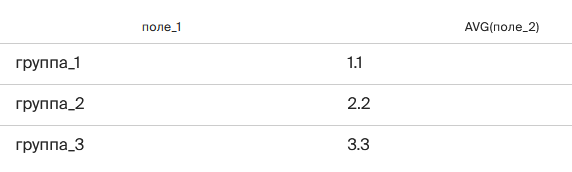

Оконные функции устроены немного иначе: для каждой строки, которую обработает функция, будет выведено одно число, однако при этом функция обработает и другие строки в окне вместе с текущей.

На схеме ниже оконная функция AVG() рассчитает среднее внутри каждого из окон. Окна выделяются в зависимости от значения в поле user_id — в одно окно попадут строки с совпадающим идентификатором.

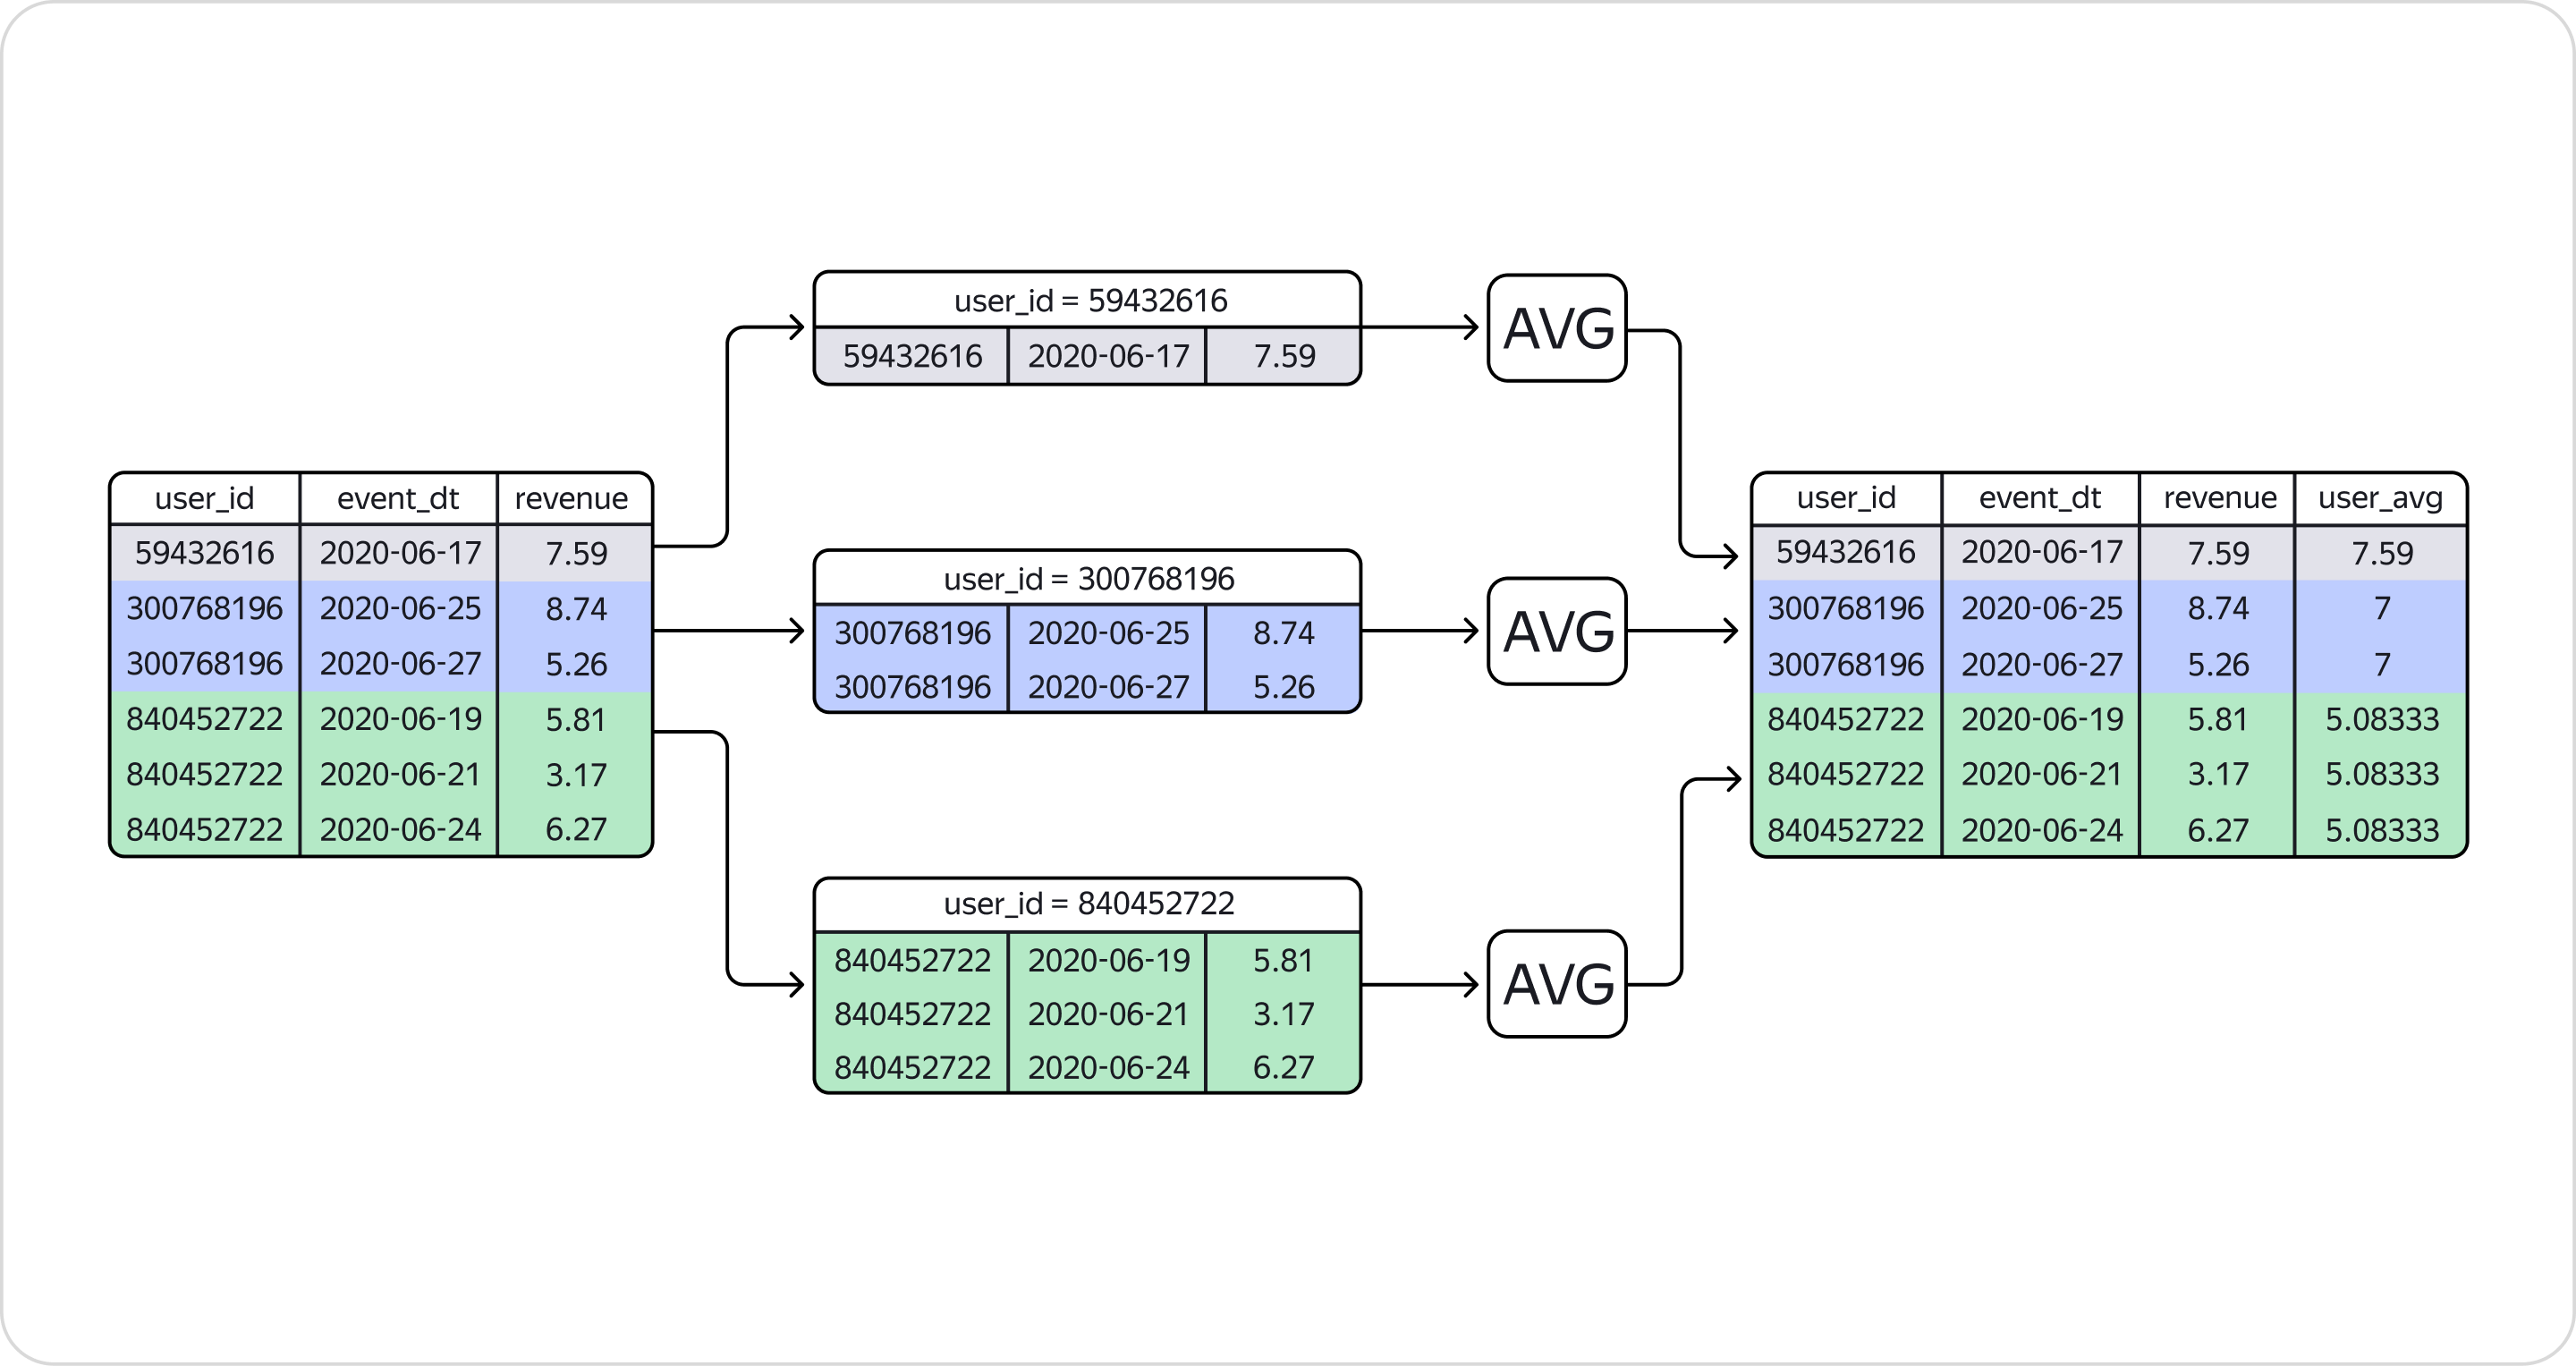

*Ранжирование*

Самая базовая задача, которую можно выполнить с помощью оконных функций, — отсортировать элементы по убыванию или возрастанию внутри окна и назначить им соответствующие порядковые номера, или ранги.

In [ ]:
# импортируем оконную функцию и модуль Spark Functions
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# создаём объект оконной функции
window = Window().partitionBy(['province']).orderBy(F.asc('date'))

# создаём колонку с рассчитанной статистикой по оконной функции
time_province = time_province.withColumn("rank", F.rank().over(window)

# выводим нужные колонки
time_province.select('date', 'province', 'rank').show()

Разберём код из примера по шагам. Первый — создать объект оконной функции. Окна сформированы по столбцу province с названиями провинций. Нужный столбец передали методу `partitionBy()` — он объединяет строки в разделы. Затем строки нужно отсортировать по возрастанию даты, чтобы назначить ранги в правильном порядке.

Второй шаг — создать колонку с рангами, пользуясь функций `rank()` из модуля Spark Functions. Метод `over()` используют, чтобы передать функции `rank()` окна, внутри которых нужно отранжировать строки.  

Посмотрите на результат: даты отсортированы по возрастанию для каждой провинции, и всем строкам внутри окна назначены ранги.

In [ ]:
+----------+--------+----+
|      date|province|rank|
+----------+--------+----+
|2020-01-20|  Sejong|   1|
|2020-01-21|  Sejong|   2|
|2020-01-22|  Sejong|   3|
|2020-01-23|  Sejong|   4|
|2020-01-24|  Sejong|   5|
|2020-01-25|  Sejong|   6|
|2020-01-26|  Sejong|   7|
|2020-01-27|  Sejong|   8|
|2020-01-28|  Sejong|   9|
|2020-01-29|  Sejong|  10|
...
|2020-05-12|  Sejong| 114|
|2020-05-13|  Sejong| 115|
|2020-05-14|  Sejong| 116|
|2020-01-20|   Ulsan|   1|
|2020-01-21|   Ulsan|   2|
|2020-01-22|   Ulsan|   3|
|2020-01-23|   Ulsan|   4|
|2020-01-24|   Ulsan|   5|
|2020-01-25|   Ulsan|   6|
|2020-01-26|   Ulsan|   7|
|2020-01-27|   Ulsan|   8|
|2020-01-28|   Ulsan|   9|
|2020-01-29|   Ulsan|  10|
....

Таким образом, базовый синтаксис оконных функций в Spark состоит из методов:

- `partitionBy()` — метод, принимающий на вход колонку или несколько колонок для формирования раздела, внутри которого происходят вычисления.
- `orderBy()` — метод сортировки, который применяется к каждому окну. Принимает на вход колонку и порядок, по которому сортировать строки: по убыванию или возрастанию.
- `over()` — метод, который уточняет, по каким окнам нужно рассчитать статистику. Принимает на вход объект оконной функции.

*Значения со смещением*

Иногда для расчётов необходимо получить предыдущее значение, например сумму продаж за вчерашний день или цену товара за прошлый период. Найти такое значение можно с помощью функции `lag()`.

Объясним на примере таблицы с данными о заказах. Столбец `previous_order_dt` хранит даты предыдущих заказов пользователей. Из таблицы видно, что пользователь с идентификатором 59432616 сделал всего один заказ, поэтому в поле `previous_order_dt` вернулось пустое значение.  Пользователь с идентификатором 300768196 сделал два заказа, поэтому в поле `previous_order_dt` в первой записи указано пустое значение, а в следующей записи — дата предыдущего заказа.

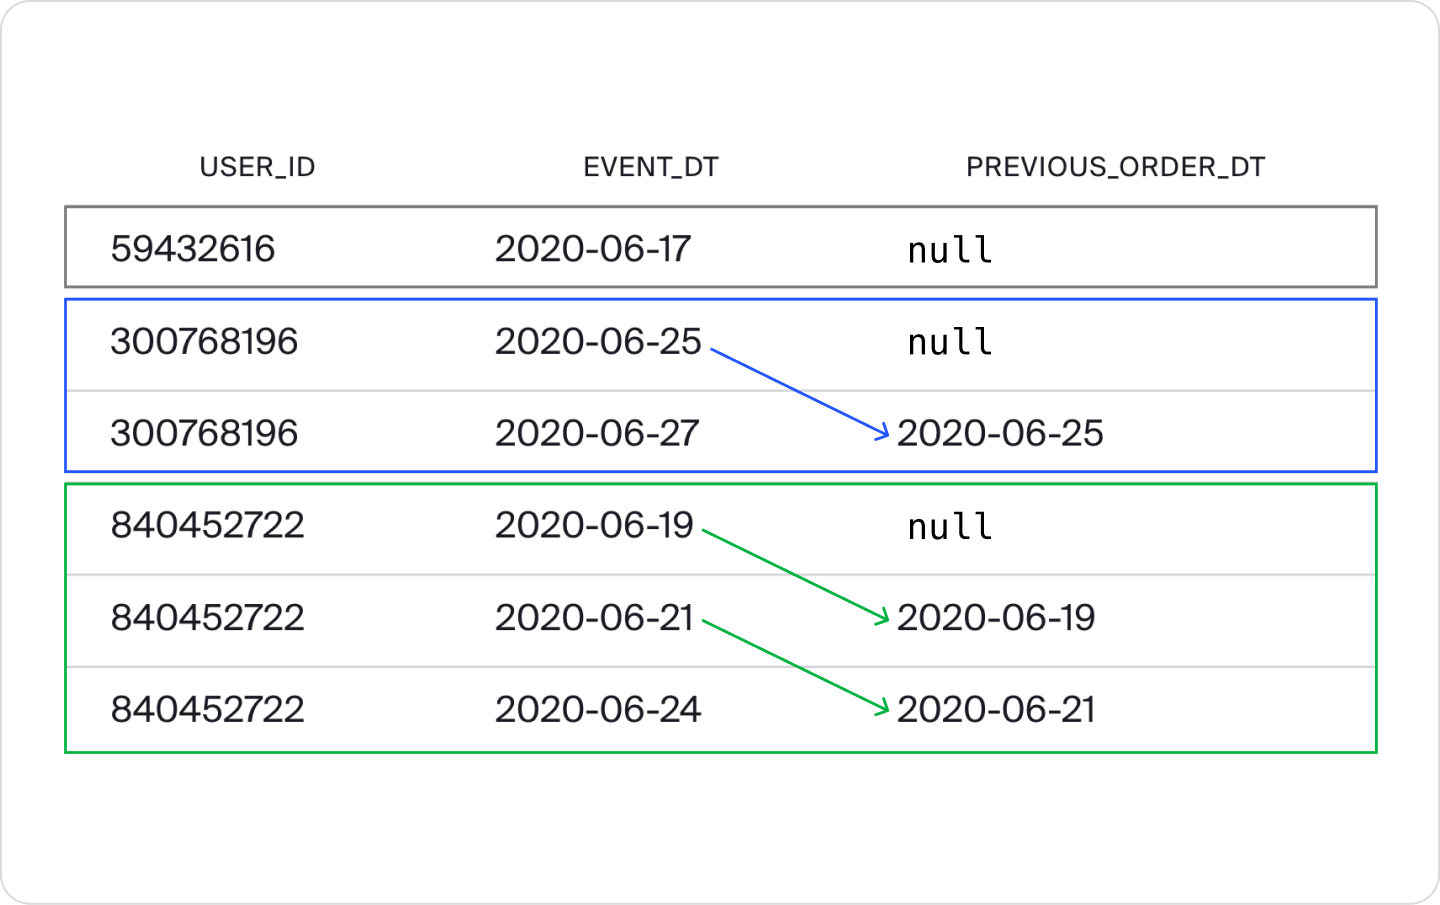

С помощью функции `lag()` можно «сместить» строки не только на одно значение, но и на несколько. Вернёмся к данным о заболеваниях: для каждого дня можно вывести количество заболевших, подтверждённое неделю назад.

Эту задачу можно решить так:

In [ ]:
# импортируем оконную функцию и модуль Spark Functions
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# создаём объект оконной функции
window = Window().partitionBy(['province']).orderBy('date')

# создаём колонку с рассчитанной статистикой по оконной функции
timeprovinceWithLag = time_province.withColumn("confirmed_lag_7",F.lag("confirmed", 7).over(window))

# фильтруем данные
timeprovinceWithLag.filter(timeprovinceWithLag.date > '2020-03-01').show()

Как и в задаче с ранжированием, первый шаг — создать объект оконной функции. Нужно сформировать окна по колонке с названием провинций и отсортировать по возрастанию даты. Даты будут отсортированы для каждой провинции.

Второй шаг — создать колонку с количеством заболеваний, зарегистрированных неделю назад. Для этого понадобится функция lag() из модуля Spark Functions. Метод over() используют, чтобы передать функции lag() окна, внутри которых нужно выполнить вычисления.  

Обратите внимание, что вместе со столбцом для вычисления функции lag() нужно передать значение смещения — 7.

In [ ]:
+----------+----+--------+---------+--------+--------+---------------+
|      date|time|province|confirmed|released|deceased|confirmed_lag_7|
+----------+----+--------+---------+--------+--------+---------------+
|2020-03-02|   0|  Sejong|        1|       0|       0|              1|
|2020-03-03|   0|  Sejong|        1|       0|       0|              1|
|2020-03-04|   0|  Sejong|        1|       0|       0|              1|
|2020-03-05|   0|  Sejong|        1|       0|       0|              1|
|2020-03-06|   0|  Sejong|        1|       0|       0|              1|
|2020-03-07|   0|  Sejong|        2|       0|       0|              1|
|2020-03-08|   0|  Sejong|        3|       0|       0|              1|
|2020-03-09|   0|  Sejong|        6|       0|       0|              1|
|2020-03-10|   0|  Sejong|        8|       0|       0|              1|
|2020-03-11|   0|  Sejong|       10|       0|       0|              1|
|2020-03-12|   0|  Sejong|       15|       0|       0|              1|
|2020-03-13|   0|  Sejong|       32|       0|       0|              1|
|2020-03-14|   0|  Sejong|       38|       0|       0|              2|
|2020-03-15|   0|  Sejong|       39|       0|       0|              3|
|2020-03-16|   0|  Sejong|       40|       0|       0|              6|
|2020-03-17|   0|  Sejong|       40|       0|       0|              8|
|2020-03-18|   0|  Sejong|       41|       0|       0|             10|
|2020-03-19|   0|  Sejong|       41|       0|       0|             15|
|2020-03-20|   0|  Sejong|       41|       0|       0|             32|
|2020-03-21|   0|  Sejong|       41|       2|       0|             38|
+----------+----+--------+---------+--------+--------+---------------+
only showing top 20 rows

*Скользящее среднее и сумма с накоплением*

Скользящие статистики часто используют для описания тренда явлений с большой изменчивостью: например, в финансовой сфере скользящее среднее могут использовать на графиках с ценами акций.

Покажем, как рассчитывается скользящее среднее, на примере набора чисел от 1 до 8. У скользящего среднего есть «рамка», которая показывает, сколько чисел участвует в расчёте среднего. Посмотрите на схеме ниже, как рамка шириной в четыре числа «скользит» по ряду чисел.

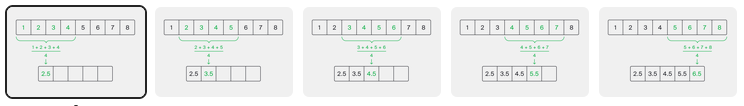

Скользящее среднее можно рассчитать и для данных о заболеваниях, чтобы получить такую кривую:

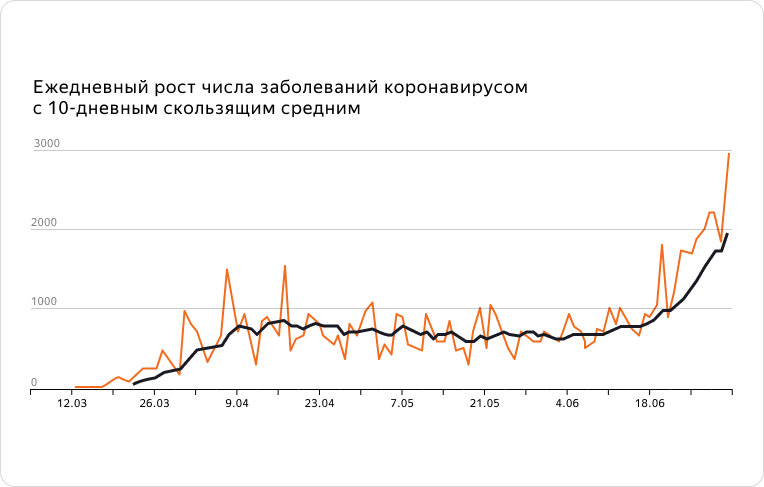

Данные ежедневной заболеваемости в штате Джорджия (с марта по июнь 2020 года) и кривая скользящего среднего для сглаживания пиковых значений

Код для расчёта скользящего среднего на основе данных датасета приведён ниже:

In [ ]:
# импортируем оконную функцию и модуль Spark Functions
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# создаём объект оконной функции
window = Window().partitionBy(['province']).orderBy('date').rowsBetween(-6, 0)

# создаём колонку с рассчитанной статистикой по оконной функции
timeprovinceWithRoll = time_province.withColumn("confirmed_roll_7", F.mean("confirmed").over(window))

# фильтруем данные
timeprovinceWithRoll.filter(timeprovinceWithLag.date > '2020-03-01').show()

In [ ]:
+----------+----+--------+---------+--------+--------+------------------+
|      date|time|province|confirmed|released|deceased|  confirmed_roll_7|
+----------+----+--------+---------+--------+--------+------------------+
|2020-03-02|   0|  Sejong|        1|       0|       0|               1.0|
|2020-03-03|   0|  Sejong|        1|       0|       0|               1.0|
|2020-03-04|   0|  Sejong|        1|       0|       0|               1.0|
|2020-03-05|   0|  Sejong|        1|       0|       0|               1.0|
|2020-03-06|   0|  Sejong|        1|       0|       0|               1.0|
|2020-03-07|   0|  Sejong|        2|       0|       0|1.1428571428571428|
|2020-03-08|   0|  Sejong|        3|       0|       0|1.4285714285714286|
|2020-03-09|   0|  Sejong|        6|       0|       0| 2.142857142857143|
|2020-03-10|   0|  Sejong|        8|       0|       0| 3.142857142857143|
|2020-03-11|   0|  Sejong|       10|       0|       0| 4.428571428571429|
|2020-03-12|   0|  Sejong|       15|       0|       0| 6.428571428571429|
|2020-03-13|   0|  Sejong|       32|       0|       0|10.857142857142858|
|2020-03-14|   0|  Sejong|       38|       0|       0|              16.0|
|2020-03-15|   0|  Sejong|       39|       0|       0|21.142857142857142|
|2020-03-16|   0|  Sejong|       40|       0|       0|              26.0|
|2020-03-17|   0|  Sejong|       40|       0|       0|30.571428571428573|
|2020-03-18|   0|  Sejong|       41|       0|       0|              35.0|
|2020-03-19|   0|  Sejong|       41|       0|       0|38.714285714285715|
|2020-03-20|   0|  Sejong|       41|       0|       0|              40.0|
|2020-03-21|   0|  Sejong|       41|       2|       0| 40.42857142857143|
+----------+----+--------+---------+--------+--------+------------------+
only showing top 20 rows

Для расчёта скользящего среднего нужно добавить метод rowsBetween(start, end), который ограничивает рамку относительно текущей строки. Чтобы посчитать скользящее среднее за неделю, нужно отобрать шесть строк до текущей. Для этого методу нужно передать аргументы -6 и 0.

Другая распространённая задача, для которой понадобятся оконные функции, — расчёт суммы с накоплением. Напомним, что сумма с накоплением считается так: к значению предыдущей строки прибавляется значение текущей — и так с каждой строкой до конца таблицы.

In [ ]:
# импортируем оконную функцию
from pyspark.sql.window import Window

# создаём объект оконной функции
window = Window().partitionBy(['province']).orderBy('date').rowsBetween(Window.unboundedPreceding,Window.currentRow)

# создаём колонку с рассчитаной статистикой по оконной функции
timeprovinceWithRoll = time_province.withColumn("cumulative_confirmed", F.mean("confirmed").over(window))

# фильтруем данные
timeprovinceWithRoll.filter(timeprovinceWithLag.date > '2020-03-01').show()

Для расчёта суммы с накоплением тоже нужно определить рамку методом rowsBetween(start, end). Синтаксис немного изменился: методу передаются аргументы unboundedPreceding и currentRow. Аргументы показывают, что верхней границей рамки будут строки начала окна, а нижней — текущая строка. Окно осталось прежним — данные одной провинции, а рамка от строки к строке будет меняться. Так получится рассчитать сумму с накоплением внутри каждого окна.

In [ ]:
+----------+----+--------+---------+--------+--------+--------------------+
|      date|time|province|confirmed|released|deceased|cumulative_confirmed|
+----------+----+--------+---------+--------+--------+--------------------+
|2020-03-11|   0|  Sejong|       10|       0|       0|                  31|
|2020-03-12|   0|  Sejong|       15|       0|       0|                  45|
|2020-03-13|   0|  Sejong|       32|       0|       0|                  76|
|2020-03-14|   0|  Sejong|       38|       0|       0|                 112|
|2020-03-15|   0|  Sejong|       39|       0|       0|                 148|
|2020-03-16|   0|  Sejong|       40|       0|       0|                 182|
|2020-03-17|   0|  Sejong|       40|       0|       0|                 214|
|2020-03-18|   0|  Sejong|       41|       0|       0|                 245|
|2020-03-19|   0|  Sejong|       41|       0|       0|                 271|
|2020-03-20|   0|  Sejong|       41|       0|       0|                 280|
|2020-03-21|   0|  Sejong|       41|       2|       0|                 283|
|2020-03-22|   0|  Sejong|       41|       3|       0|                 285|
|2020-03-23|   0|  Sejong|       42|       3|       0|                 287|
|2020-03-24|   0|  Sejong|       42|       3|       0|                 289|
|2020-03-25|   0|  Sejong|       44|       3|       0|                 292|
|2020-03-26|   0|  Sejong|       44|       8|       0|                 295|
|2020-03-27|   0|  Sejong|       44|       9|       0|                 298|
|2020-03-28|   0|  Sejong|       44|       9|       0|                 301|
|2020-03-29|   0|  Sejong|       46|      11|       0|                 306|
|2020-03-30|   0|  Sejong|       46|      12|       0|                 310|
+----------+----+--------+---------+--------+--------+--------------------+
only showing top 20 rows

В этом уроке вы познакомились с тремя наиболее часто используемыми механиками оконных функций. Их применяют в когортном анализе, маркетинге, игровой аналитике, а также для генерации признаков для моделей машинного обучения.
Синтаксис DataFrame API максимально приближен к синтаксису SQL, поэтому большинство методов и функций, с которыми вы познакомились в этом уроке, соответствуют операторам SQL. В модуле Spark Functions представлено много других аналитических и ранжирующих функций, с которыми можно познакомиться в документации.

**Виды записи и форматы файлов в распределённой файловой системе**

Возможно, вы помните, что в HDFS нельзя дописать или оставить открытыми для записи файлы, за счёт чего в классическом дистрибутиве Apache Hadoop невозможно обновлять блоки уже записанных данных.

Невозможность добавлять записи в конец файла или обновлять уже записанные данные приносила неудобства, а с увеличением количества данных стало критическим требованием для новых инструментов.

В этом уроке вы узнаете о методах записи в DataFrame API. Для простоты здесь рассмотрены варианты записи и вставки в файл, но те же самые методы работают и для записи в распределённую файловую систему HDFS и в распределённую базу данных Hive. А в конце даны форматы файлов, которые используются в распределённых файловых системах. Узнайте их сходства и отличия, чтобы понять, каким оптимально пользоваться в Spark.

Операции записи и добавления
С появлением Spark стало возможно не только перезаписывать ранее созданный файл, но и добавлять данные в конец него.

Рассмотрите метод write() на примере таблицы (https://www.kaggle.com/kimjihoo/coronavirusdataset) с зарегистрированными случаями заболевания COVID-19 в Южной Корее.

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder \
                    .master("local") \
                    .appName("Learning DataFrame Window Functions") \
                    .getOrCreate()

time_province = spark.read.load('datasets/covid19_dataset/time_province.csv', format="csv", sep=",", inferSchema=True, header="true")
time_province.printSchema()
time_province.show()

In [ ]:
root
 |-- date: string (nullable = true)
 |-- time: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- released: integer (nullable = true)
 |-- deceased: integer (nullable = true)

+----------+----+-----------------+---------+--------+--------+
|      date|time|         province|confirmed|released|deceased|
+----------+----+-----------------+---------+--------+--------+
|2020-01-20|  16|            Seoul|        0|       0|       0|
|2020-01-20|  16|            Busan|        0|       0|       0|
|2020-01-20|  16|            Daegu|        0|       0|       0|
|2020-01-20|  16|          Incheon|        1|       0|       0|
|2020-01-20|  16|          Gwangju|        0|       0|       0|
|2020-01-20|  16|          Daejeon|        0|       0|       0|
|2020-01-20|  16|            Ulsan|        0|       0|       0|
|2020-01-20|  16|           Sejong|        0|       0|       0|
|2020-01-20|  16|      Gyeonggi-do|        0|       0|       0|
|2020-01-20|  16|       Gangwon-do|        0|       0|       0|
|2020-01-20|  16|Chungcheongbuk-do|        0|       0|       0|
|2020-01-20|  16|Chungcheongnam-do|        0|       0|       0|
|2020-01-20|  16|     Jeollabuk-do|        0|       0|       0|
|2020-01-20|  16|     Jeollanam-do|        0|       0|       0|
|2020-01-20|  16| Gyeongsangbuk-do|        0|       0|       0|
|2020-01-20|  16| Gyeongsangnam-do|        0|       0|       0|
|2020-01-20|  16|          Jeju-do|        0|       0|       0|
|2020-01-21|  16|            Seoul|        0|       0|       0|
|2020-01-21|  16|            Busan|        0|       0|       0|
|2020-01-21|  16|            Daegu|        0|       0|       0|
+----------+----+-----------------+---------+--------+--------+
only showing top 20 rows


Простая запись файла состоит из четырёх методов:

- write означает, что вы записываете таблицу.
- format('csv') — указываете, в каком формате записать файл.
- mode('overwrite')  — параметр режима записи. По умолчанию файл перезаписывается каждый раз при выполнении блока кода.
- save() — тут указывается путь, куда нужно записать результат.

In [ ]:
time_province.write.format('csv').mode('overwrite').save('datasets/covid19_dataset/time_province_1')

Надо проверить, что такой файл существует:

In [ ]:
time_province_1 = spark.read.load('datasets/covid19_dataset/time_province_1', format='csv', sep=',', inferSchema=True, header='true')
time_province.count()

1972

Чтобы дозаписать данные в файл, нужно всего лишь поменять параметр mode():

In [ ]:
time_province.write.format('csv').mode('append').save('dataseets/covid19_dataset/time_province_2')

In [ ]:
time_province_2 = spark.read.load('datasets/covid19_dataset/time_province_2/', format='csv', sep=',', inferSchema=True, header=
'true')
time_province_2.count()

1972

Выполним код ещё раз и проверим, что изменилось.

In [ ]:
3942

Файл задублировался. Это можно исправить методом dropDuplicates().

In [ ]:
time_province_2.dropDuplicates().count()

1972

Итак, записать результат расчётов можно конструкцией вида: `df.write.format('csv').mode(*режим записи*).save(*путь куда записывать*)`, указывая локацию, куда записывать файл, и в каком режиме перезаписывать или добавлять.

*Партиционирование DataFrame*

Вы уже проходили механизм партиционирования в теме о RDD API.

💡 Партиционирование — это способ перераспределить данные равномерно по исполнителям, тем самым оптимизировав нагрузку и ускорив процесс вычисления.

DataFrame API унаследовал этот механизм от RDD API, и репартиционировать данные можно методами repartition()  и  coalesce().
Взгляните, как работает партиционирование на уже знакомой таблице с зарегистрированными случаями заболевания COVID-19 в Южной Корее.

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder \
                    .master("local") \
                    .appName("Learning DataFrame Window Functions") \
                    .getOrCreate()

time_province = spark.read.load('datasets/covid19_dataset/time_province.csv', format="csv", sep=",", inferSchema=True, header="true")
time_province.printSchema()
time_province.show()
print('Количество партиций:', time_province.rdd.getNumPartitions())

In [ ]:
root
 |-- date: string (nullable = true)
 |-- time: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- released: integer (nullable = true)
 |-- deceased: integer (nullable = true)

+----------+----+-----------------+---------+--------+--------+
|      date|time|         province|confirmed|released|deceased|
+----------+----+-----------------+---------+--------+--------+
|2020-01-20|  16|            Seoul|        0|       0|       0|
|2020-01-20|  16|            Busan|        0|       0|       0|
|2020-01-20|  16|            Daegu|        0|       0|       0|
|2020-01-20|  16|          Incheon|        1|       0|       0|
|2020-01-20|  16|          Gwangju|        0|       0|       0|
|2020-01-20|  16|          Daejeon|        0|       0|       0|
|2020-01-20|  16|            Ulsan|        0|       0|       0|
|2020-01-20|  16|           Sejong|        0|       0|       0|
|2020-01-20|  16|      Gyeonggi-do|        0|       0|       0|
|2020-01-20|  16|       Gangwon-do|        0|       0|       0|
|2020-01-20|  16|Chungcheongbuk-do|        0|       0|       0|
|2020-01-20|  16|Chungcheongnam-do|        0|       0|       0|
|2020-01-20|  16|     Jeollabuk-do|        0|       0|       0|
|2020-01-20|  16|     Jeollanam-do|        0|       0|       0|
|2020-01-20|  16| Gyeongsangbuk-do|        0|       0|       0|
|2020-01-20|  16| Gyeongsangnam-do|        0|       0|       0|
|2020-01-20|  16|          Jeju-do|        0|       0|       0|
|2020-01-21|  16|            Seoul|        0|       0|       0|
|2020-01-21|  16|            Busan|        0|       0|       0|
|2020-01-21|  16|            Daegu|        0|       0|       0|
+----------+----+-----------------+---------+--------+--------+
only showing top 20 rows

Количество партиций: 1

«Количество партиций: 1» значит, что файл состоит из одной части, так как он был прочитан из одного файла формата csv.

Партиционировать можно на определённое число частей:

In [ ]:
# репартиционируем таблицу на 5 частей
time_province_repartitioned = time_province.repartition(5)

# посмотрим количество партиций
time_province_repartitioned.rdd.getNumPartitions()

5

Можно по определённой колонке или набору колонок:

In [ ]:
# репартиционируем таблицу
time_province_repartitioned = time_province.repartition('date')

# посмотрим количество партиций
time_province_repartitioned.rdd.getNumPartitions()

200

200 партиций — это настройка по умолчанию, которую можно менять при инициализации Spark-сессии.
Но на практике чаще всего партиционируют таблицу по конкретной колонке на определённое количество частей:

In [ ]:
# репартиционируем таблицу на 5 частей по столбцу date
time_province_repartitioned = time_province.repartition(5, 'date')

# посмотрим количество партиций
time_province_repartitioned.rdd.getNumPartitions()

5

Записывать результат можно, используя уже знакомую конструкцию:

In [ ]:
time_province_repartitioned.write.format('csv').mode('overwrite').save('datasets/covid19_dataset/time_province_partitioned')

По сохранённому пути находится папка с именем таблицы, потому что партиционированная таблица представляет собой папку с отдельными файлами. В случае локального компьютера они будут лежать на одном жёстком диске, а в случае кластера будут рассредоточены согласно политике реплицирования кластера.

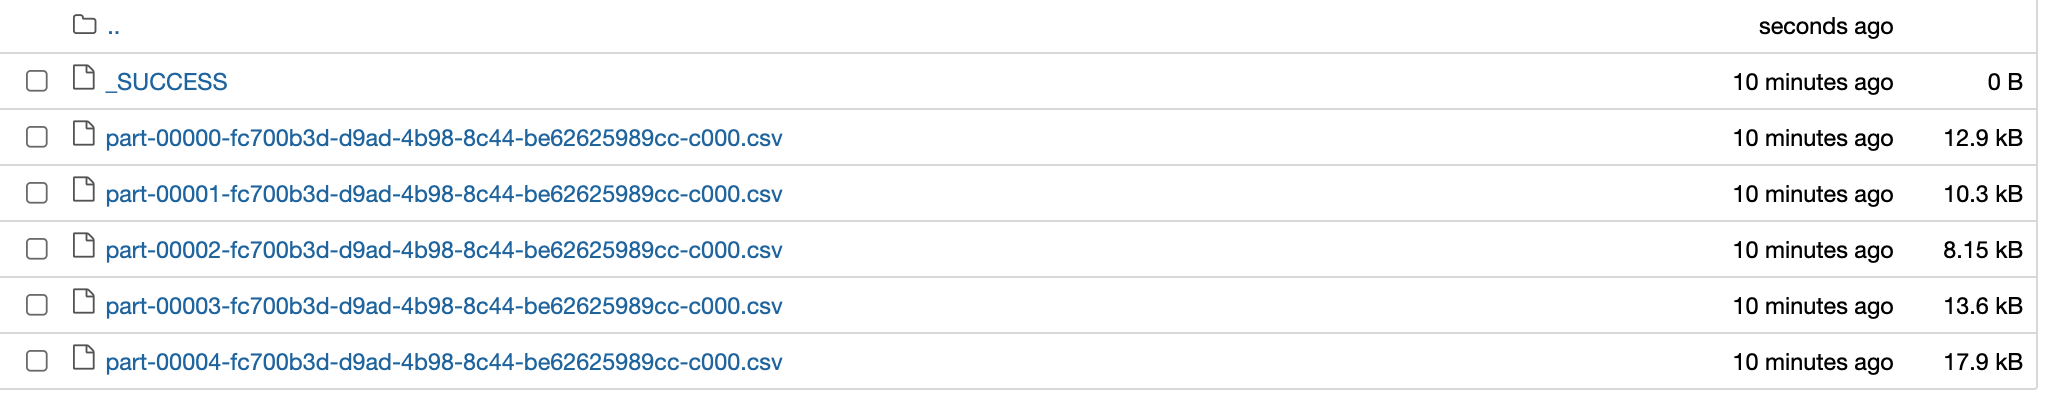

Количество файлов равно числу, которое вы указывали в методе repartition(), а найти папку можно по пути, который указывали в методе save().

На практике таблицы чаще всего партиционируют по дате. Это, во-первых, помогает равномерно распределить данные, а во-вторых, ускорить вычисления с таблицей, ведь при таком партиционирвоании Spark будет обращаться только к тем датам (партициям), по которым происходит фильтрация в запросе.

*Распределённые форматы файлов*

Hadoop-экосистема и Spark в частности умеет работать с привычными форматами файлов, например csv или excel, но хранить большие объёмы данных в таких форматах крайне неэффективно. Именно поэтому в процессе развития Hadoop-экосистемы появились подпроекты, которые реализовывали специальные форматы файлов под распределённые файловые системы.

Самые популярные и часто используемые три формата: avro, orс (optimized row columnar) и parquet.

Форматы можно разбить на два типа: строковые и колоночные.

- Строковые (avro)
Строки разных типов данных хранятся вместе в одном файле. Преимущество строковых форматов заключается в том, что в файл можно быстро добавить или модифицировать строку. Но с другой стороны, при чтении файла придётся прочитать все колонки в память, даже если в запросе их выбирается несколько.
Это приводит к тому, что чтение из файлов такого формата медленное, а запросы на выбор нескольких колонок из множества не оптимальны.
Эти форматы не оптимальны и с точки зрения хранения и компрессии, а для чтения требуется много оперативной памяти. Строковые форматы хорошо подходят для записи потоковых данных и для кейсов, где нужно читать все поля, например, для etl-задач дата-инженеров.
- Колоночные (orc, parquet)
В таком формате колонки хранятся в отдельных файлах, что позволяет оптимизировать хранение и существенно сжать файлы. Преимуществом такого формата является скорость при выполнении аналитических запросов с использованием нескольких столбцов. В этом случае не нужно читать все файлы — достаточно выбрать толко те, где хранятся запрашиваемые колонки. Колоночные форматы хорошо работают в таких базах данных, как Hive и Clickhouse.

В таблице легче сравнить форматы сразу по нескольким характеристикам.

In [ ]:
	                                          Avro	Parquet	ORC
Поддержка в разных версиях Hadoop-проектов	+++	+	++
Компрессия, возможность сжатия данных	+	++	+++
Возможность разбить на части	++	++	+++
Ориентация	Строковый формат	Колоночный формат	Колоночный формат
Операция чтения файла	+++	++	++
Операция записи — добавление или модифицирование файла	+	++	++

*Как подобрать формат?*

У каждого формата есть свои плюсы и минусы, и выбор зависит от кейса применения. Специфика анализа данных и обучения моделей заключается в том, что нужно оперировать таблицами разных типов и иногда внушительных размеров.
Довольно часто на вход модели нужно подавать определённые колонки со сгенерированными признаками. Поэтому, чтобы выбирать колонки быстро, а большие таблицы в распределённой файловой системе хранить оптимальным образом, лучше использовать orc.

*Как дело обстоит на практике?*

В большинстве крупных компаний, пользующихся распределённой системой HDFS и табличной абстракцией Hive, данные хранят преимущественно в orc. Данные в этом формате занимают меньше места, поддерживают партиционирование, а также хорошо совместимы с Hivе.

В компаниях, которые используют облачные решения и только Spark (без Hivе), часто применяют parquet. Этот формат специально разработан для Spark и обеспечивает высокую скорость чтения и записи в рамках этого инструмента.

**Планы запросов и оптимизатор Catalyst**

Ранее вы узнали, что DataFrame и RDD вычисляются «ленивым» образом — процесс начинается только после явного вызова действия, например `collect()`. Трансформации не вызывают вычисления, но при применении методов к DataFrame трансформации записываются в специальный атрибут — план запроса. Этот урок посвящён планам запросов, их видам и оптимизатору Catalyst, который выбирает, какой план будет вычислять Spark.

Рассмотрите пример соединения двух таблиц, чтобы разобраться, какие механизмы оптимизации применяет Spark.

Сперва нужно создать две таблицы с товарами и заказами:


In [ ]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
                    .master("local") \
                    .appName("Learning DataFrames") \
                    .getOrCreate()

# создаём схемы и сами таблицы
items_chema = "id integer, name string, price float"
orders_schema = "id integer, item_id integer, count integer"

items = spark.createDataFrame(
    [[0, "apple", 2.0],
     [1, "cherry", 5.5],
     [2, "pineapple", 7.0]], schema=items_chema,
)

orders = spark.createDataFrame(
    [[100, 0, 1],
     [100, 1, 1],
     [101, 2, 3],
     [102, 2, 8]], schema=orders_schema
)

Теперь надо сделать несколько логических действий, чтобы посмотреть, какие варианты оптимизации предложит Catalyst. Соединим две таблицы, сделаем фильтрацию, сгруппируем по колонкам и посчитаем простую агрегацию.

In [ ]:
from pyspark.sql.functions import sum

aggregate = items.join(orders, items.id == orders.item_id, how="inner") \
                 .where(items.id == 2) \
                 .groupBy("name", "price") \
                 .agg(sum("count").alias("cnt"))

Посмотрим на планы вычислений, которые сгенерировал оптимизатор Catalyst. Для этого вызовем метод `explain()`:

In [ ]:
aggregate.explain(mode="extended")



```
== Parsed Logical Plan ==
'Aggregate ['name, 'price], [unresolvedalias('name, None), unresolvedalias('price, None), sum('count) AS cnt#37]
+- Filter (id#0 = 2)
   +- Join Inner, (id#0 = item_id#7)
      :- LogicalRDD [id#0, name#1, price#2], false
      +- LogicalRDD [id#6, item_id#7, count#8], false

== Analyzed Logical Plan ==
name: string, price: float, cnt: bigint
Aggregate [name#1, price#2], [name#1, price#2, sum(cast(count#8 as bigint)) AS cnt#37L]
+- Filter (id#0 = 2)
   +- Join Inner, (id#0 = item_id#7)
      :- LogicalRDD [id#0, name#1, price#2], false
      +- LogicalRDD [id#6, item_id#7, count#8], false

== Optimized Logical Plan ==
Aggregate [name#1, price#2], [name#1, price#2, sum(cast(count#8 as bigint)) AS cnt#37L]
+- Project [name#1, price#2, count#8]
   +- Join Inner, (id#0 = item_id#7)
      :- Filter (isnotnull(id#0) AND (id#0 = 2))
      :  +- LogicalRDD [id#0, name#1, price#2], false
      +- Project [item_id#7, count#8]
         +- Filter ((item_id#7 = 2) AND isnotnull(item_id#7))
            +- LogicalRDD [id#6, item_id#7, count#8], false

== Physical Plan ==
*(6) HashAggregate(keys=[name#1, price#2], functions=[sum(cast(count#8 as bigint))], output=[name#1, price#2, cnt#37L])
+- Exchange hashpartitioning(name#1, price#2, 200), true, [id=#61]
   +- *(5) HashAggregate(keys=[name#1, knownfloatingpointnormalized(normalizenanandzero(price#2)) AS price#2], functions=[partial_sum(cast(count#8 as bigint))], output=[name#1, price#2, sum#42L])
      +- *(5) Project [name#1, price#2, count#8]
         +- *(5) SortMergeJoin [id#0], [item_id#7], Inner
            :- *(2) Sort [id#0 ASC NULLS FIRST], false, 0
            :  +- Exchange hashpartitioning(id#0, 200), true, [id=#46]
            :     +- *(1) Filter (isnotnull(id#0) AND (id#0 = 2))
            :        +- *(1) Scan ExistingRDD[id#0,name#1,price#2]
            +- *(4) Sort [item_id#7 ASC NULLS FIRST], false, 0
               +- Exchange hashpartitioning(item_id#7, 200), true, [id=#52]
                  +- *(3) Project [item_id#7, count#8]
                     +- *(3) Filter ((item_id#7 = 2) AND isnotnull(item_id#7))
                        +- *(3) Scan ExistingRDD[id#6,item_id#7,count#8]
```



Как результат, метод выводит планы вычислений, о которых будет сказано далее.
Планы запросов можно разделить на две категории: логические и физические.

- Логические планы — это перевод того, что хочет сделать программист или аналитик для Spark.
- Физические планы — это планы сбора и трансформации данных, которые оптимизированы с учётом того, как хранятся данные: на HDFS или другой используемой файловой системе.

Физических планов несколько, и каждый из них имеет свою вычислительную стоимость. Когда процесс оптимизации заканчивается, Spark выбирает оптимальный физический план с наименьшей вычислительной стоимостью.


💡 До версии 3.0 в Spark был немного другой синтаксис метода:
- explain(extended=False) показывает только финальный физический план, по которому будет действовать Spark для вычисления результата.
- explain(extended=True) показывает все планы — логические и физические.

Теперь посмотрите, как строятся и в чём разница между планами запросов. Каждый раз, когда выполняется команда действия (например, `collect()` или `toPandas()`), Catalyst выполняет процесс оптимизации, который можно представить следующим образом:

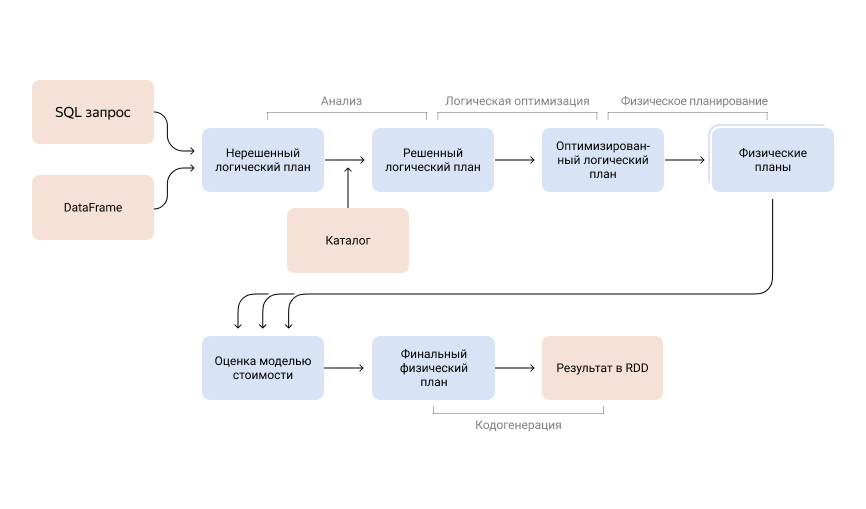

Процесс оптимизации плана запроса с помощью Catalyst

Эту цепочку действий можно разделить на пять этапов:

1. Анализ (англ. analysis) — на этом этапе оптимизатор проверяет синтаксис SQL-запроса и источника данных, соответствие названий полей и таблиц. Если нет опечаток и несоответствий в плане семантики, то генерируется нерешённый логический план (англ. Unresolved logical plan).

  Этот план — пока только черновик. На этой стадии ещё не просчитаны различные варианты и не выбран оптимальный план вычислений для Spark..



```
== Parsed Logical Plan ==
'Aggregate ['name, 'price], [unresolvedalias('name, None), unresolvedalias('price, None), sum('count) AS cnt#37]
+- Filter (id#0 = 2)
   +- Join Inner, (id#0 = item_id#7)
      :- LogicalRDD [id#0, name#1, price#2], false
          +- LogicalRDD [id#6, item_id#7, count#8], false
```

Если в коде есть синтаксические ошибки — например, несоответствие названий колонок, по которым соединяются таблицы, или неправильное название выбираемой колонки — то уже на этом этапе вы получите ошибку. И составление планов дальше не продвинется.



```
from pyspark.sql.functions import sum

aggregate = items.join(orders, items.id == orders.item_id, how="inner") \
                 .where(items.ids == 2) \
                 .groupBy("name", "price") \
                 .agg(sum("count").alias("cnt"))
```



```
---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-16-48dbacbc7a5b> in <module>
      2
      3 aggregate = items.join(orders, items.id == orders.item_id, how="inner") \
----> 4                  .where(items.ids == 2) \
      5                  .groupBy("name", "price") \
      6                  .agg(sum("count").alias("cnt"))

~/miniconda3/lib/python3.8/site-packages/pyspark/sql/dataframe.py in __getattr__(self, name)
   1398         """
   1399         if name not in self.columns:
-> 1400             raise AttributeError(
   1401                 "'%s' object has no attribute '%s'" % (self.__class__.__name__, name))
   1402         jc = self._jdf.apply(name)

AttributeError: 'DataFrame' object has no attribute 'ids'
```



2. Логическая оптимизация (англ. Logical Optimization) — на этом этапе оптимизатор просчитывает, как должна выглядеть финальная таблица — названия колонок и типы данных. Оптимизатор может использовать специальную структуру Spark под названием Catalog, которая хранит в себе метаданные об объектах в операционной памяти вашего Spark-приложения и общедоступную информацию о структурах и типах данных.

 Если всё правильно, оптимизатор сгенерирует решённый логический план (англ. Resolved logical plan), который выглядит так:



```
== Analyzed Logical Plan ==
name: string, price: float, cnt: bigint
Aggregate [name#1, price#2], [name#1, price#2, sum(cast(count#8 as bigint)) AS cnt#37L]
+- Filter (id#0 = 2)
   +- Join Inner, (id#0 = item_id#7)
      :- LogicalRDD [id#0, name#1, price#2], false
      +- LogicalRDD [id#6, item_id#7, count#8], false
```
 На этом плане видно, что оптимизатор просчитал, как должна выглядеть финальная таблица, назвал колонки и подобрал соответствующие для них типы данных.

 💡 Решённый логический план отвечает на вопрос: «Что нужно сделать?»


3. Физическое планирование (англ. Physical Planning) — на этом этапе решённый логический план оптимизируется исходя из логических операций, которые вы применяли к таблицам: фильтрация, группировка по колонкам и агрегация. В итоге оптимизаций рождается оптимизированный логический план (англ. Optimized logical plan).

Сравните наш код с оптимизированным планом, чтобы понять, что именно Spark оптимизировал.

Наш код:



```
from pyspark.sql.functions import sum

aggregate = items.join(orders, items.id == orders.item_id, how="inner") \
                 .where(items.id == 2) \
                 .groupBy("name", "price") \
                 .agg(sum("count").alias("cnt"))
```

 Оптимизированный логический план:



```
== Optimized Logical Plan ==
Aggregate [name#1, price#2], [name#1, price#2, sum(cast(count#8 as bigint)) AS cnt#37L]
+- Project [name#1, price#2, count#8]
   +- Join Inner, (id#0 = item_id#7)
      :- Filter (isnotnull(id#0) AND (id#0 = 2))
      :  +- LogicalRDD [id#0, name#1, price#2], false
      +- Project [item_id#7, count#8]
         +- Filter ((item_id#7 = 2) AND isnotnull(item_id#7))
            +- LogicalRDD [id#6, item_id#7, count#8], false
```

 В коде последовательность следующая: соединение таблиц → фильтрация по полю → группировка по двум полям → подсчёт агрегации.

А в оптимизированном плане можно заметить, что Catalyst передвинул фильтры в начало до джойна, чтобы соединять таблицы меньшего размера.

💡 Оптимизированный логический план отвечает на вопрос: «Можно ли что-то улучшить в запросе программиста?»

4. Генерация множества физических планов (англ. Physical plans) и оценка их вычислительной стоимости — этот этап можно назвать оценкой моделью стоимости (англ. Cost Model Analysis).

💡 Физические планы — это ответы на вопрос: «Какими путями можно посчитать то, что хочет программист?»

Каждый физический план имеет некоторую вычислительную стоимость, измеряемую во времени выполнения и в потребляемых ресурсах. В конце всего процесса оптимизации Spark выбирает наиболее оптимальный физический план с наименьшей вычислительной стоимостью. В конце этого этапа Spark получает финальный физический план, который содержит детальную информацию об оптимальном вычислении финальной таблицы.

💡 Финальный физический план (англ. Selected physical plan) отвечает на вопрос: «Как наиболее оптимально сделать то, что хочет программист, учитывая локации данных в файловой системе?»

Это финальная точка перед началом вычислений — и выглядит она так:



```
== Physical Plan ==
*(6) HashAggregate(keys=[name#1, price#2], functions=[sum(cast(count#8 as bigint))], output=[name#1, price#2, cnt#37L])
+- Exchange hashpartitioning(name#1, price#2, 200), true, [id=#61]
   +- *(5) HashAggregate(keys=[name#1, knownfloatingpointnormalized(normalizenanandzero(price#2)) AS price#2], functions=[partial_sum(cast(count#8 as bigint))], output=[name#1, price#2, sum#42L])
      +- *(5) Project [name#1, price#2, count#8]
         +- *(5) SortMergeJoin [id#0], [item_id#7], Inner
            :- *(2) Sort [id#0 ASC NULLS FIRST], false, 0
            :  +- Exchange hashpartitioning(id#0, 200), true, [id=#46]
            :     +- *(1) Filter (isnotnull(id#0) AND (id#0 = 2))
            :        +- *(1) Scan ExistingRDD[id#0,name#1,price#2]
            +- *(4) Sort [item_id#7 ASC NULLS FIRST], false, 0
               +- Exchange hashpartitioning(item_id#7, 200), true, [id=#52]
                  +- *(3) Project [item_id#7, count#8]
                     +- *(3) Filter ((item_id#7 = 2) AND isnotnull(item_id#7))
                        +- *(3) Scan ExistingRDD[id#6,item_id#7,count#8]
```



5. Кодогенерация (англ. Code Generation) — последний этап, на котором Spark сам генерирует нужные MapReduce-задачи на Scala, вычисляя финальный результат.

 В нашем примере получается простая таблица с ценой и количеством купленных ананасов.


```
aggregate.toPandas()
```



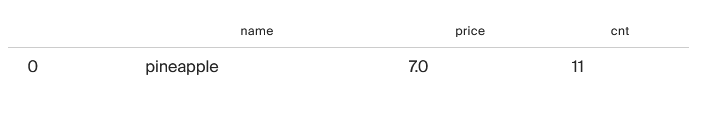

Как видно, процесс оптимизации вычисления DataFrame в Spark — это многоэтапный и весьма непростой процесс.

Оптимизатор Catalyst помогает программистам писать код под бизнес-задачу так, чтобы код был понятен другим людям. И в то же время Catalyst упрощает работу вычислительному ядру Spark: оптимизирует запрос программиста для более быстрого выполнения при меньших ресурсах.

Выберите все планы, которые генерирует Catalyst в процессе оптимизации вычислений.

Нерешённый логический план.
Да. Нерешённый логический план — это алгоритм трансформаций, которые программист хочет сделать с данными.

Оптимизированный логический план.
Точно. Оптимизированный логический план — это улучшенный запрос программиста.

Решённый логический план.
Верно. RDD — это тип хранения данных, который представляет собой набор элементов, разделённых по узлам кластера, с которыми можно работать параллельно.

Финальный физический план.
Верно. Финальный физический план — это наиболее оптимизированный вариант вычислений для Spark, который вернёт то, что хочет посчитать программист.

Физические планы.
Физические планы — это разные по оптимальности варианты того, как программисту посчитать нужный результат.

В каком плане запроса Catalyst оптимизирует фильтрации, агрегации и соединение таблиц?

В оптимизированном логическом плане.
Подсказка была даже в самом вопросе — это слово «оптимизирует».

По какому принципу подбирается финальный физический план?

Выбирается самый оптимальный по времени выполнения и количеству затрачиваемых ресурсов.

На каком плане запроса Catalyst остановится, если в коде есть синтаксическая ошибка? Например, название колонки написано неправильно.

На нерешённом логическом плане.

(см картинку выше)

В каком плане запросов Catalyst понимает, как будет выглядеть финальная таблица: названия колонок и типы данных?

В решённом логическом плане.

# **DataFrame API. Практика**

Вы прошли тему, посвящённую DataFrame API. Теперь попрактикуйтесь в Spark и проанализируйте уже знакомые данные о жилье в Калифорнии (https://www.kaggle.com/bhavinmoriya/introduction-to-pyspark/data).

Данные, которые вы будете анализировать, были собраны в рамках переписи населения в США. Каждая строка содержит агрегированную статистику о жилом массиве. Жилой массив — минимальная географическая единица с населением от 600 до 3000 человек в зависимости от штата. Одна строка в данных содержит статистику в среднем о 1425.5 обитателях жилого массива.
В колонках датасета содержатся следующие данные:

    longitude — широта;
    latitude — долгота;
    housing_median_age — медианный возраст жителей жилого массива;
    total_rooms — общее количество комнат в домах жилого массива;
    total_bedrooms — общее количество спален в домах жилого массива;
    population — количество человек, которые проживают в жилом массиве;
    households — количество домовладений в жилом массиве;
    median_income — медианный доход жителей жилого массива;
    median_house_value — медианная стоимость дома в жилом массиве;
    ocean_proximity — близость к океану.

В большинстве колонок хранятся количественные данные, кроме одной — `ocean_proximity`. Она хранит категориальные значения.

Решение в файле практика, который лежит в папке.

**Заключение**

В этом модуле вы познакомились с новой абстракцией — DataFrame, которая помогает работать со структурированными данными и автоматически оптимизировать запросы, не вовлекая программиста.

Вы изучили базовые методы DataFrame API, которые во многом соответствуют методам и функциям библиотеки pandas. Также вы познакомились с оконными функциями, которые пригодятся в аналитике и Data Science и помогут генерировать более сложные признаки для моделей машинного обучения.

Ещё вы узнали о работе Spark «под капотом», например, о том, как Catalyst создаёт планы запросов и выполняет процесс оптимизации.

Это был заключительный модуль курса, и мы надеемся, что он помог пополнить и упорядочить ваши знания в области распределённых данных.